In [1]:
import pandas as pd  # data manipulation (matplolib for vis + numpy for math operations)
import re # working with regular expressions in python (string matching and manipulation)
import math # math functions

In [2]:
# creates a list of strings named orig_chapter_names, where each string contains
# two names for a chapter: one in Spanish and one in English. The two names are separated by a slash ("/").
orig_chapter_names = ["El Cazo/The Pot", # first is prologue
 "La Calavera/The Skull",
 "El Pájaro/The Bird",
 "La Estrella/The Star",
 "El Venado/The Deer",
 "El Mundo/The World",
 "La Mano/The Hand",
 "El Árbol/The Tree",
 "La Sirena/The Mermaid",
 "La Araña/The Spider",
 "La Garza/The Heron",
 "El Alacrán/The Scorpion",
 "La Muerte/The Death",
 "Las Jaras/The Arrows",
 "El Diablito/The Little Devil",
 "La Dama/The Lady",
 "El Nopal/The Cactus",
 "La Chalupa/The Canoe",
 "El Corazón/The Heart",
 "El Músico/The Musician",
 "La Rosa/The Rose",
 "La Corona/The Crown",
 "La Luna/The Moon",] 


# creates a new list called chapter_names by iterating over each string in orig_chapter_names.
# For each string, splits it into two parts at the slash ("/") using the split() function.
# Then takes the first part (the Spanish name before the "/") and transform it to uppercase using the upper() method.
# The result is a new list of strings, where each string is the uppercase Spanish name of a chapter.
chapter_names = [chap.split("/")[0].upper() for chap in orig_chapter_names]

# Prints out chapter_names to verify the result.
chapter_names  

['EL CAZO',
 'LA CALAVERA',
 'EL PÁJARO',
 'LA ESTRELLA',
 'EL VENADO',
 'EL MUNDO',
 'LA MANO',
 'EL ÁRBOL',
 'LA SIRENA',
 'LA ARAÑA',
 'LA GARZA',
 'EL ALACRÁN',
 'LA MUERTE',
 'LAS JARAS',
 'EL DIABLITO',
 'LA DAMA',
 'EL NOPAL',
 'LA CHALUPA',
 'EL CORAZÓN',
 'EL MÚSICO',
 'LA ROSA',
 'LA CORONA',
 'LA LUNA']

In [3]:
# calculates and prints the number of items in the chapter_names list, 
# which gives us the total number of chapters in the book.
len(chapter_names)

23

In [4]:
# opens the text file "mccall-summer_of_the_mariposas.txt" in read mode ('r') 
# with UTF-8 encoding. It then reads the entire file with the read() method, which returns 
# the text of the file as a single string. The splitlines() function splits this 
# string into a list of lines. The result is stored in the variable 'lines'.
lines = open("data/mccall-summer_of_the_mariposas.txt", 'r', encoding="utf-8").read().splitlines()

In [5]:
# This Python script is designed to parse a text document (such as a novel) into individual chapters.
num_chaps = len(chapter_names)  # Calculates the total number of chapters using the length of the list 'chapter_names'

chapters = {} # Initializes an empty dictionary. This will be used to store each chapter's text with the chapter number as the key
curr_chap = 0 # Initializes a variable 'curr_chap' to 0. This will be used to keep track of the current chapter number while parsing the text
curr_text = "" # Initializes a variable 'curr_text' as an empty string. This will be used to accumulate the text of the current chapter
in_chapter = False # Initializes a boolean flag to indicate whether the loop is currently within a chapter

for line in lines:  # Iterates over the lines in the text document
    trimmed = line.strip() # Removes leading and trailing whitespace from the current line
    
    if trimmed == "":
        continue  # If the trimmed line is empty, it skips the rest of this loop iteration and proceeds to the next line
    
    if trimmed.startswith(chapter_names[curr_chap]): # Checks if the current line matches the start of a chapter
        in_chapter = True  # If it does, the 'in_chapter' flag is set to True and it starts accumulating text for that chapter
        curr_text += trimmed + "\n"  # The current line is added to the current chapter's text
    
    elif trimmed == "THE END":  # If the current line is "THE END", it ends the current chapter
        print('---------')
        print(chapter_names[curr_chap])  # Prints the current chapter's name to the console
        print('---------')
        chapters[curr_chap] = curr_text  # Stores the current chapter's text in the 'chapters' dictionary
        break  # Ends the loop

    elif trimmed in ["PART I", "PART II", "PART III"]:  # Checks if the line is a part header
        in_chapter = False  # If it is, sets the 'in_chapter' flag to False
        print(trimmed)  # Prints the part header to the console

    elif (curr_chap < num_chaps-1) and trimmed.startswith(chapter_names[curr_chap+1]):  # Checks if the line is the start of the next chapter
        in_chapter = True  # If it is, sets the 'in_chapter' flag to True
        print('---------')  # Prints a separator to the console
        print(chapter_names[curr_chap+1])  # Prints the name of the next chapter to the console
        print('---------')
        chapters[curr_chap] = curr_text  # Stores the current chapter's text in the 'chapters' dictionary
        curr_text = trimmed + '\n'  # Starts accumulating text for the next chapter
        curr_chap +=1  # Increments the current chapter number

    elif in_chapter:  
        curr_text += trimmed + "\n"  # If 'in_chapter' flag is True and none of the other conditions have been met, the line is added to the current chapter's text



PART I
---------
LA CALAVERA
---------
---------
EL PÁJARO
---------
---------
LA ESTRELLA
---------
---------
EL VENADO
---------
---------
EL MUNDO
---------
---------
LA MANO
---------
PART II
---------
EL ÁRBOL
---------
---------
LA SIRENA
---------
---------
LA ARAÑA
---------
---------
LA GARZA
---------
---------
EL ALACRÁN
---------
---------
LA MUERTE
---------
---------
LAS JARAS
---------
---------
EL DIABLITO
---------
---------
LA DAMA
---------
PART III
---------
EL NOPAL
---------
---------
LA CHALUPA
---------
---------
EL CORAZÓN
---------
---------
EL MÚSICO
---------
---------
LA ROSA
---------
---------
LA CORONA
---------
---------
LA LUNA
---------
---------
LA LUNA
---------


In [6]:
len(chapters)

23

In [7]:
chapters[1]

'LA CALAVERA: “La calavera del muerto\nestá en su huerto.”\nTHE SKULL: “The skull of the dead man\nis in his grove.”\nJuanita reacted first. Being fourteen and only second oldest, she didn’t usually take charge. But when she felt the corpse floating beside her, she started pulling Pita out of the water as if she were a sopping Raggedy Ann doll.\n“Holy shiitake mushrooms!” the twins, Velia and Delia, shouted in unison, frozen in place by the sight of the body bobbing up and down and side to side only a few feet away from us.\nI shrieked the way Mamá would have if she’d been there with us. “Get out! Get out! Get out!” Grasping only the sleeve of Velia’s shirt, I yanked her toward me with all my might.\n“Odilia!” she complained. “Let go of me!”\n“Get out of the water! Now!”\n“Okay! Fine. But I thought you were yelling at him,” she defended herself.\nI pushed her and Delia ahead of me. “Why would I be yelling at him? He’s dead!” We stood, all five of us, drenched with fear on the bank of t

In [8]:
from collections import Counter, defaultdict 
import operator

In [9]:
import string
# Creates a list of punctuation characters. It takes all standard punctuation characters, adds some more,
# and removes the hash (#) symbol.
punct_chars = list((set(string.punctuation) | {'’', '‘', '–', '—', '~', '|', '“', '”', '…', "'", "`", '_'}) - set(['#']))
punct_chars.sort() # Sorts the list of punctuation characters
punctuation = ''.join(punct_chars) # Joins the sorted list into a single string

# Compiles a regular expression pattern that matches any of the characters in the 'punctuation' string.
replace = re.compile('[%s]' % re.escape(punctuation)) 

# Defines a function 'clean_text' that cleans a given text by removing punctuation, 
# replacing all whitespace with a single space, and optionally stemming words and filtering out non-vocabulary words.
def clean_text(text, stem=False, split=False, keep_vocab=None):
    text = text.lower()  # Converts the text to lowercase
    text = replace.sub(' ', text)   # Replaces all punctuation with a space
    text = re.sub(r'\s+', ' ', text)     # Replaces all sequences of whitespace characters with a single space
    text = text.strip()     # Removes spaces at the beginning and end of the text
    words = text.split()    # Splits the text into a list of words
    if stem:  # If 'stem' is True, stems each word in the list
        words = [sno.stem(w) for w in words]
    if keep_vocab:  # If 'keep_vocab' is provided, filters out any words not in 'keep_vocab'
        words = [w for w in words if w in keep_vocab]
    if split:  # If 'split' is True, returns the list of words
        return words     # If 'split' is False, joins the list of words back into a single string and returns it


    return " ".join(words)


In [10]:
word_df = []  # Initializes an empty list to store word-count-chapter dictionaries

# Iterates over the chapter number (i) and text (chap_text) in the 'chapters' dictionary
for i, chap_text in chapters.items(): 
    # Cleans the chapter text and splits it into words, counts the occurrences of each word using Counter,
    # and iterates over the word (word) and count (count) in the resulting dictionary
    for word, count in Counter(clean_text(chap_text, split=True)).items():
        # Appends a dictionary with the word, count, and chapter number to the 'word_df' list
        word_df.append({"word": word,
                       "count": count, 
                       "chapter": i})

# Converts the 'word_df' list of dictionaries into a pandas DataFrame
word_df = pd.DataFrame(word_df)

# Prints the DataFrame
word_df


# this code takes the chapters dictionary (where keys are chapter numbers and values are the corresponding 
# chapter text), cleans each chapter's text, splits it into words, counts the occurrences of each word, 
# and stores the results in a pandas DataFrame. Each row of the DataFrame corresponds to a word and contains 
# the word itself (word), the number of times it occurs in the chapter (count), and the number of the chapter
# it comes from (chapter). The final line of the code prints this DataFrame.

word  count  chapter
0                el      4        0
1              cazo      1        0
2             hazme      1        0
3              caso      4        0
4                 o      1        0
...             ...    ...      ...
23202    protecting      1       22
23203       braving      1       22
23204          wind      1       22
23205  illuminating      1       22
23206           sky      1       22

[23207 rows x 3 columns]

In [11]:
def log_odds(counts1, counts2, prior, zscore = True):
    # This function calculates the log odds ratio for two sets of word counts, potentially standardizing the result
    # to a z-score. It uses a prior count to handle words that do not appear in the count dictionaries.

    # Initialize defaultdicts to hold the variance, standard deviation, and log odds ratio for each word
    sigmasquared = defaultdict(float)
    sigma = defaultdict(float)
    delta = defaultdict(float)

    # Compute the total count of words in each set of counts
    n1 = sum(counts1.values())
    n2 = sum(counts2.values())

    # Compute the total count in the prior
    nprior = sum(prior.values())
# Create a dictionary with the total count of each word across all chapters
prior_counts = word_df.groupby("word")['count'].sum().to_dict()

# Iterate over the chapter numbers in 'chapters'
for i in chapters:
    # Get a dictionary of the word counts for the current chapter
    chap_counts = word_df[word_df['chapter'] == i].set_index('word')['count'].to_dict()
    # Get a dictionary of the word counts for all other chapters
    other_counts = word_df[word_df['chapter'] != i].groupby("word")['count'].sum().to_dict()
    # Calculate the log odds ratio of the word counts in the current chapter to the counts in all other chapters
    delta = log_odds(chap_counts, other_counts, prior_counts, True)
    # Sort the words by their log odds ratio
    delta_sorted = sorted(delta.items(), key=operator.itemgetter(1))
    chap_words = []
    # Create a list of words with a log odds ratio greater than or equal to 1.5, along with their log odds ratio
    for k, v in reversed(delta_sorted):
        if v >= 1.5:
            chap_words.append("%s (%.3f)" % (k, v))
    # Create a dictionary of words with a positive log odds ratio, to plot in the word cloud
    to_plot = {k: v for k, v in reversed(delta_sorted) if v > 0}
    # Generate a word cloud from the 'to_plot' dictionary
    wordcloud = WordCloud(width=500, height=500, background_color='white',
                         max_words=100).generate_from_frequencies(to_plot)
    # Set up the plot
    plt.figure(figsize=(5, 5), dpi=400, facecolor=None)
    plt.title("CHAPTER %d: %s" % (i, orig_chapter_names[i]), size=30)
    # Display the word cloud
    plt.imshow(wordcloud)
    # Remove the axis
    plt.axis("off")
    # Remove padding and margin
    plt.tight_layout(pad=0)
    # Show the plot
    plt.show()

    # Iterate over the words in the prior
    for word in prior.keys():
        # If the prior count for a word is 0, its log odds ratio is also 0
        if prior[word] == 0:
            delta[word] = 0
            continue
        # If a word does not appear in a count dictionary, its count is considered to be 0
        if word not in counts1:
            counts1[word] = 0
        if word not in counts2:
            counts2[word] = 0
        # Compute the log odds ratio for the word, adjusting the counts with the prior
        l1 = float(counts1[word] + prior[word]) / (( n1 + nprior ) - (counts1[word] + prior[word]))
        l2 = float(counts2[word] + prior[word]) / (( n2 + nprior ) - (counts2[word] + prior[word]))
        # Compute the variance of the log odds ratio
        sigmasquared[word] = 1/(float(counts1[word]) + float(prior[word])) + 1/(float(counts2[word]) + float(prior[word]))
        # Compute the standard deviation of the log odds ratio
        sigma[word] = math.sqrt(sigmasquared[word])
        # Compute the difference of the log odds (log of l1 - log of l2)
        delta[word] = (math.log(l1) - math.log(l2))
        # If requested, standardize the log odds ratio to a z-score by dividing by the standard deviation
        if zscore:
            delta[word] /= sigma[word]
    # Return the dictionary of log odds ratios (or z-scores)
    return delta


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

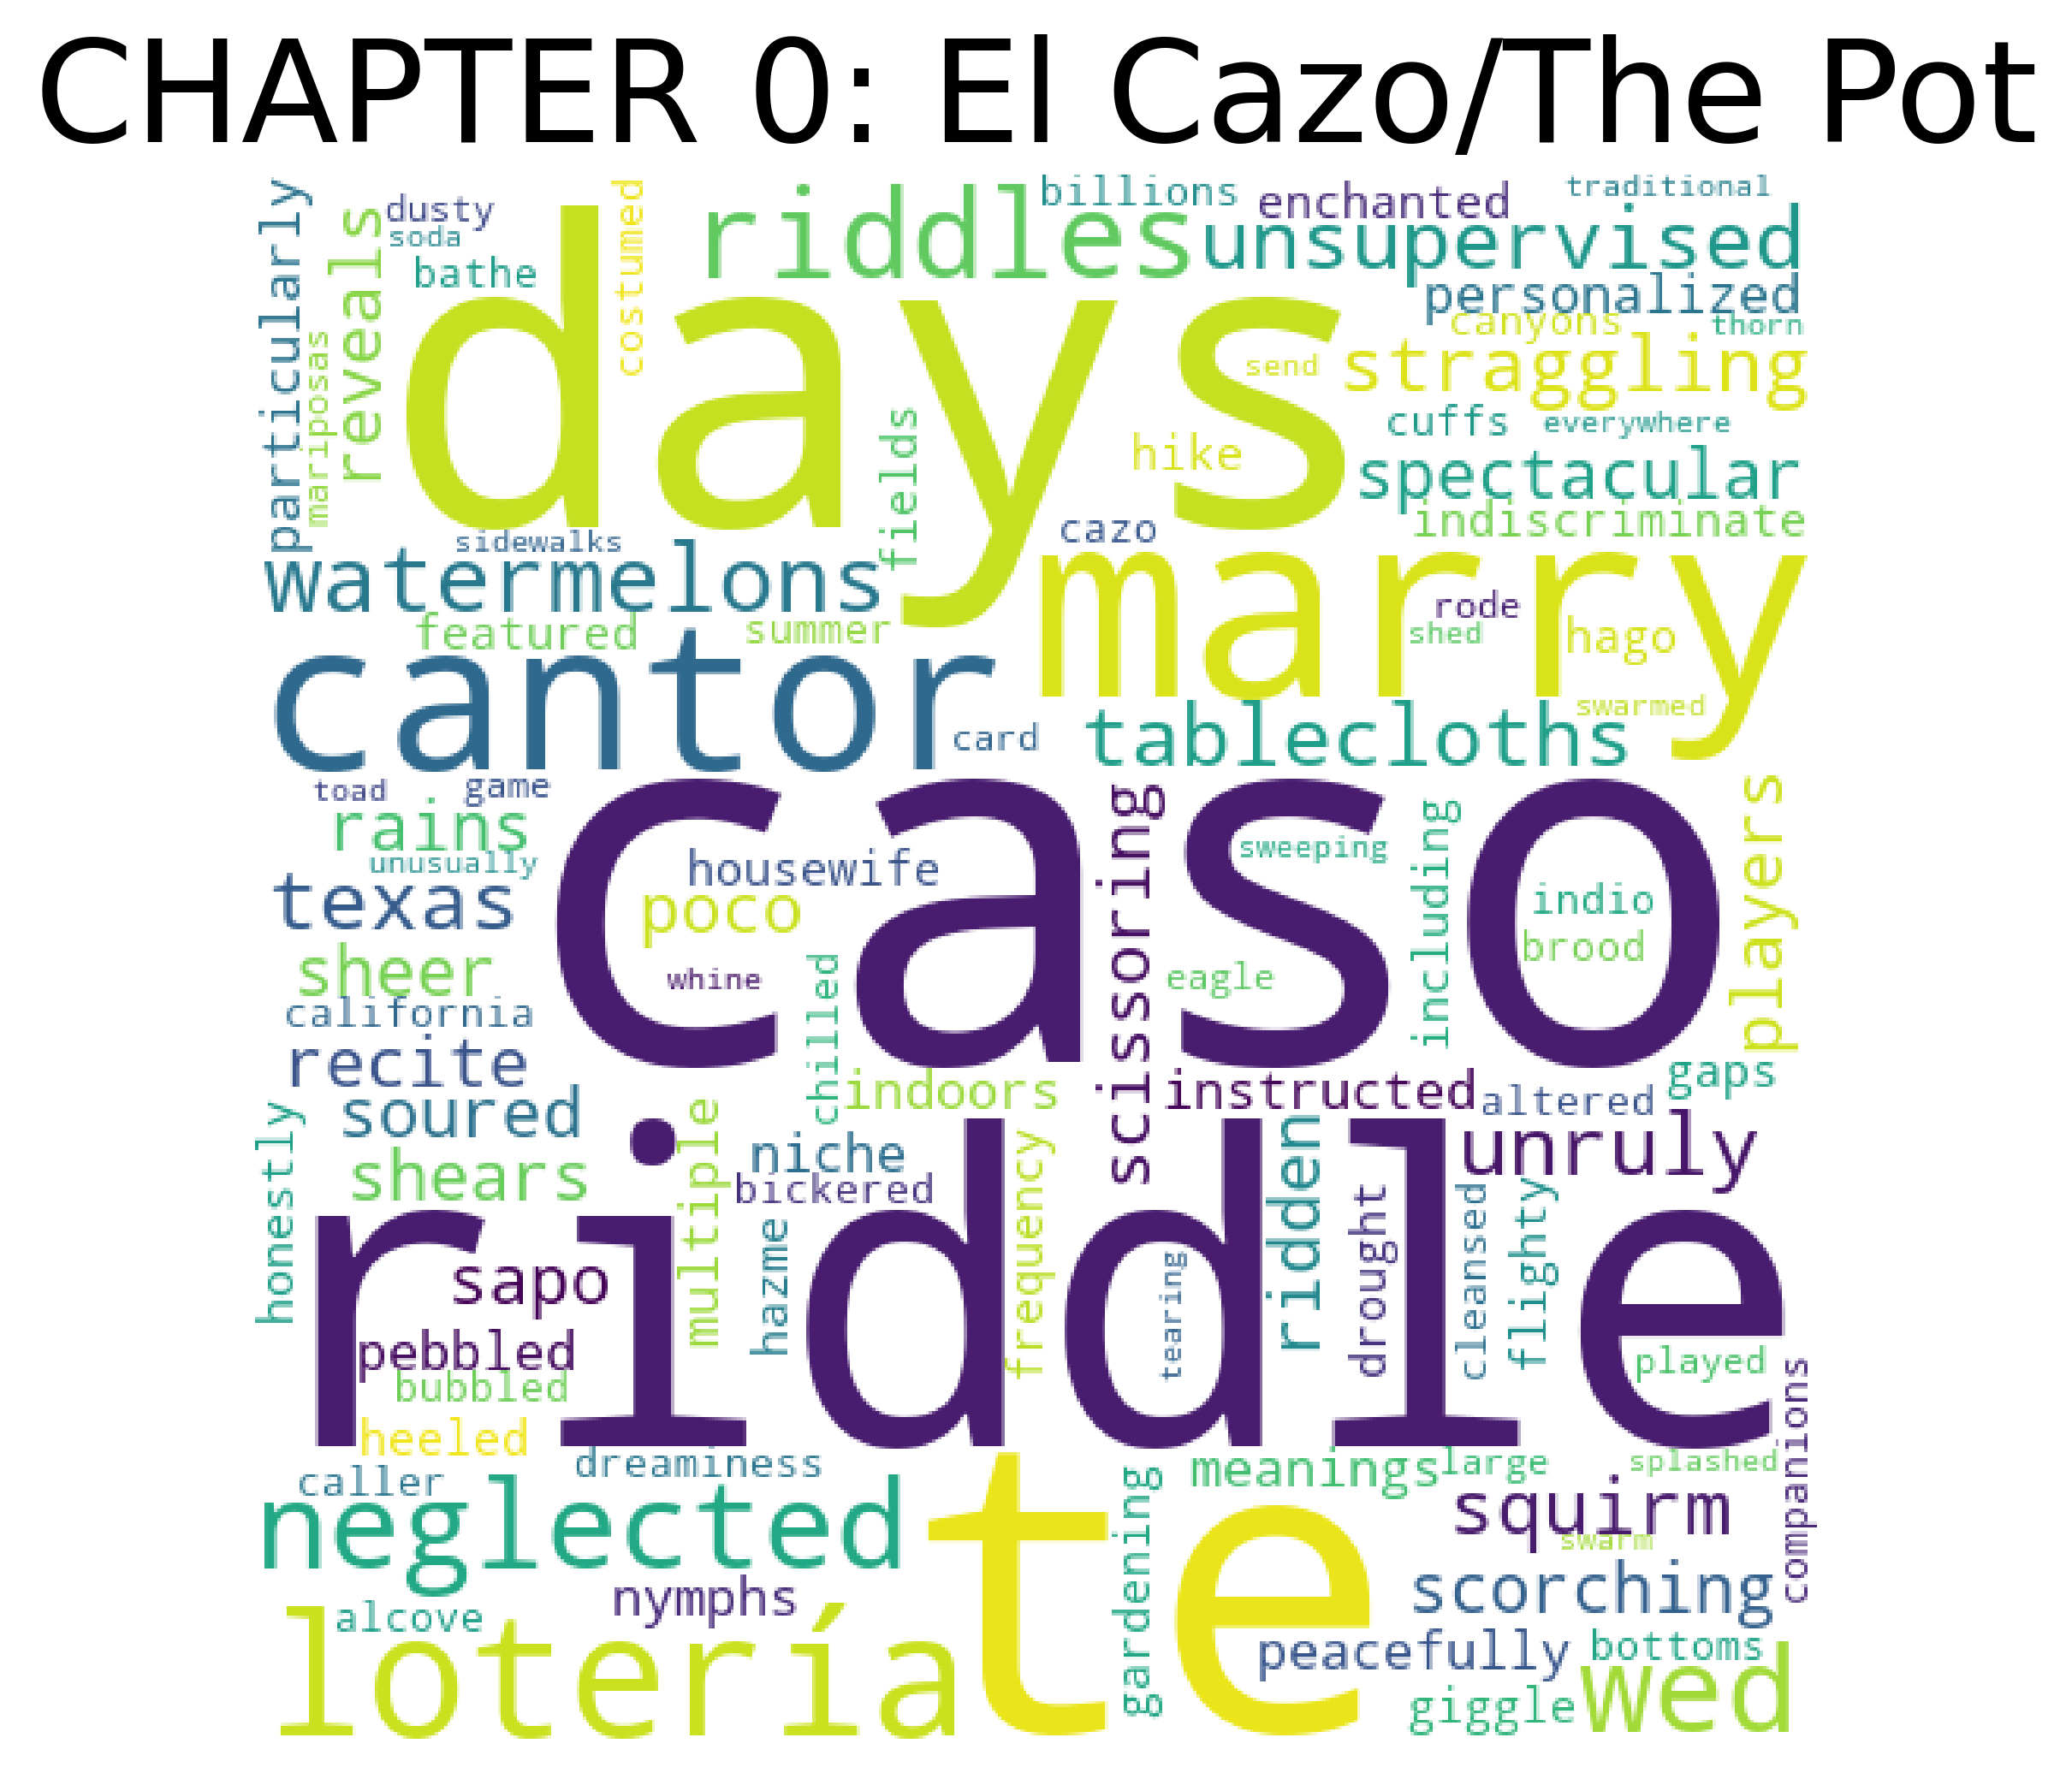

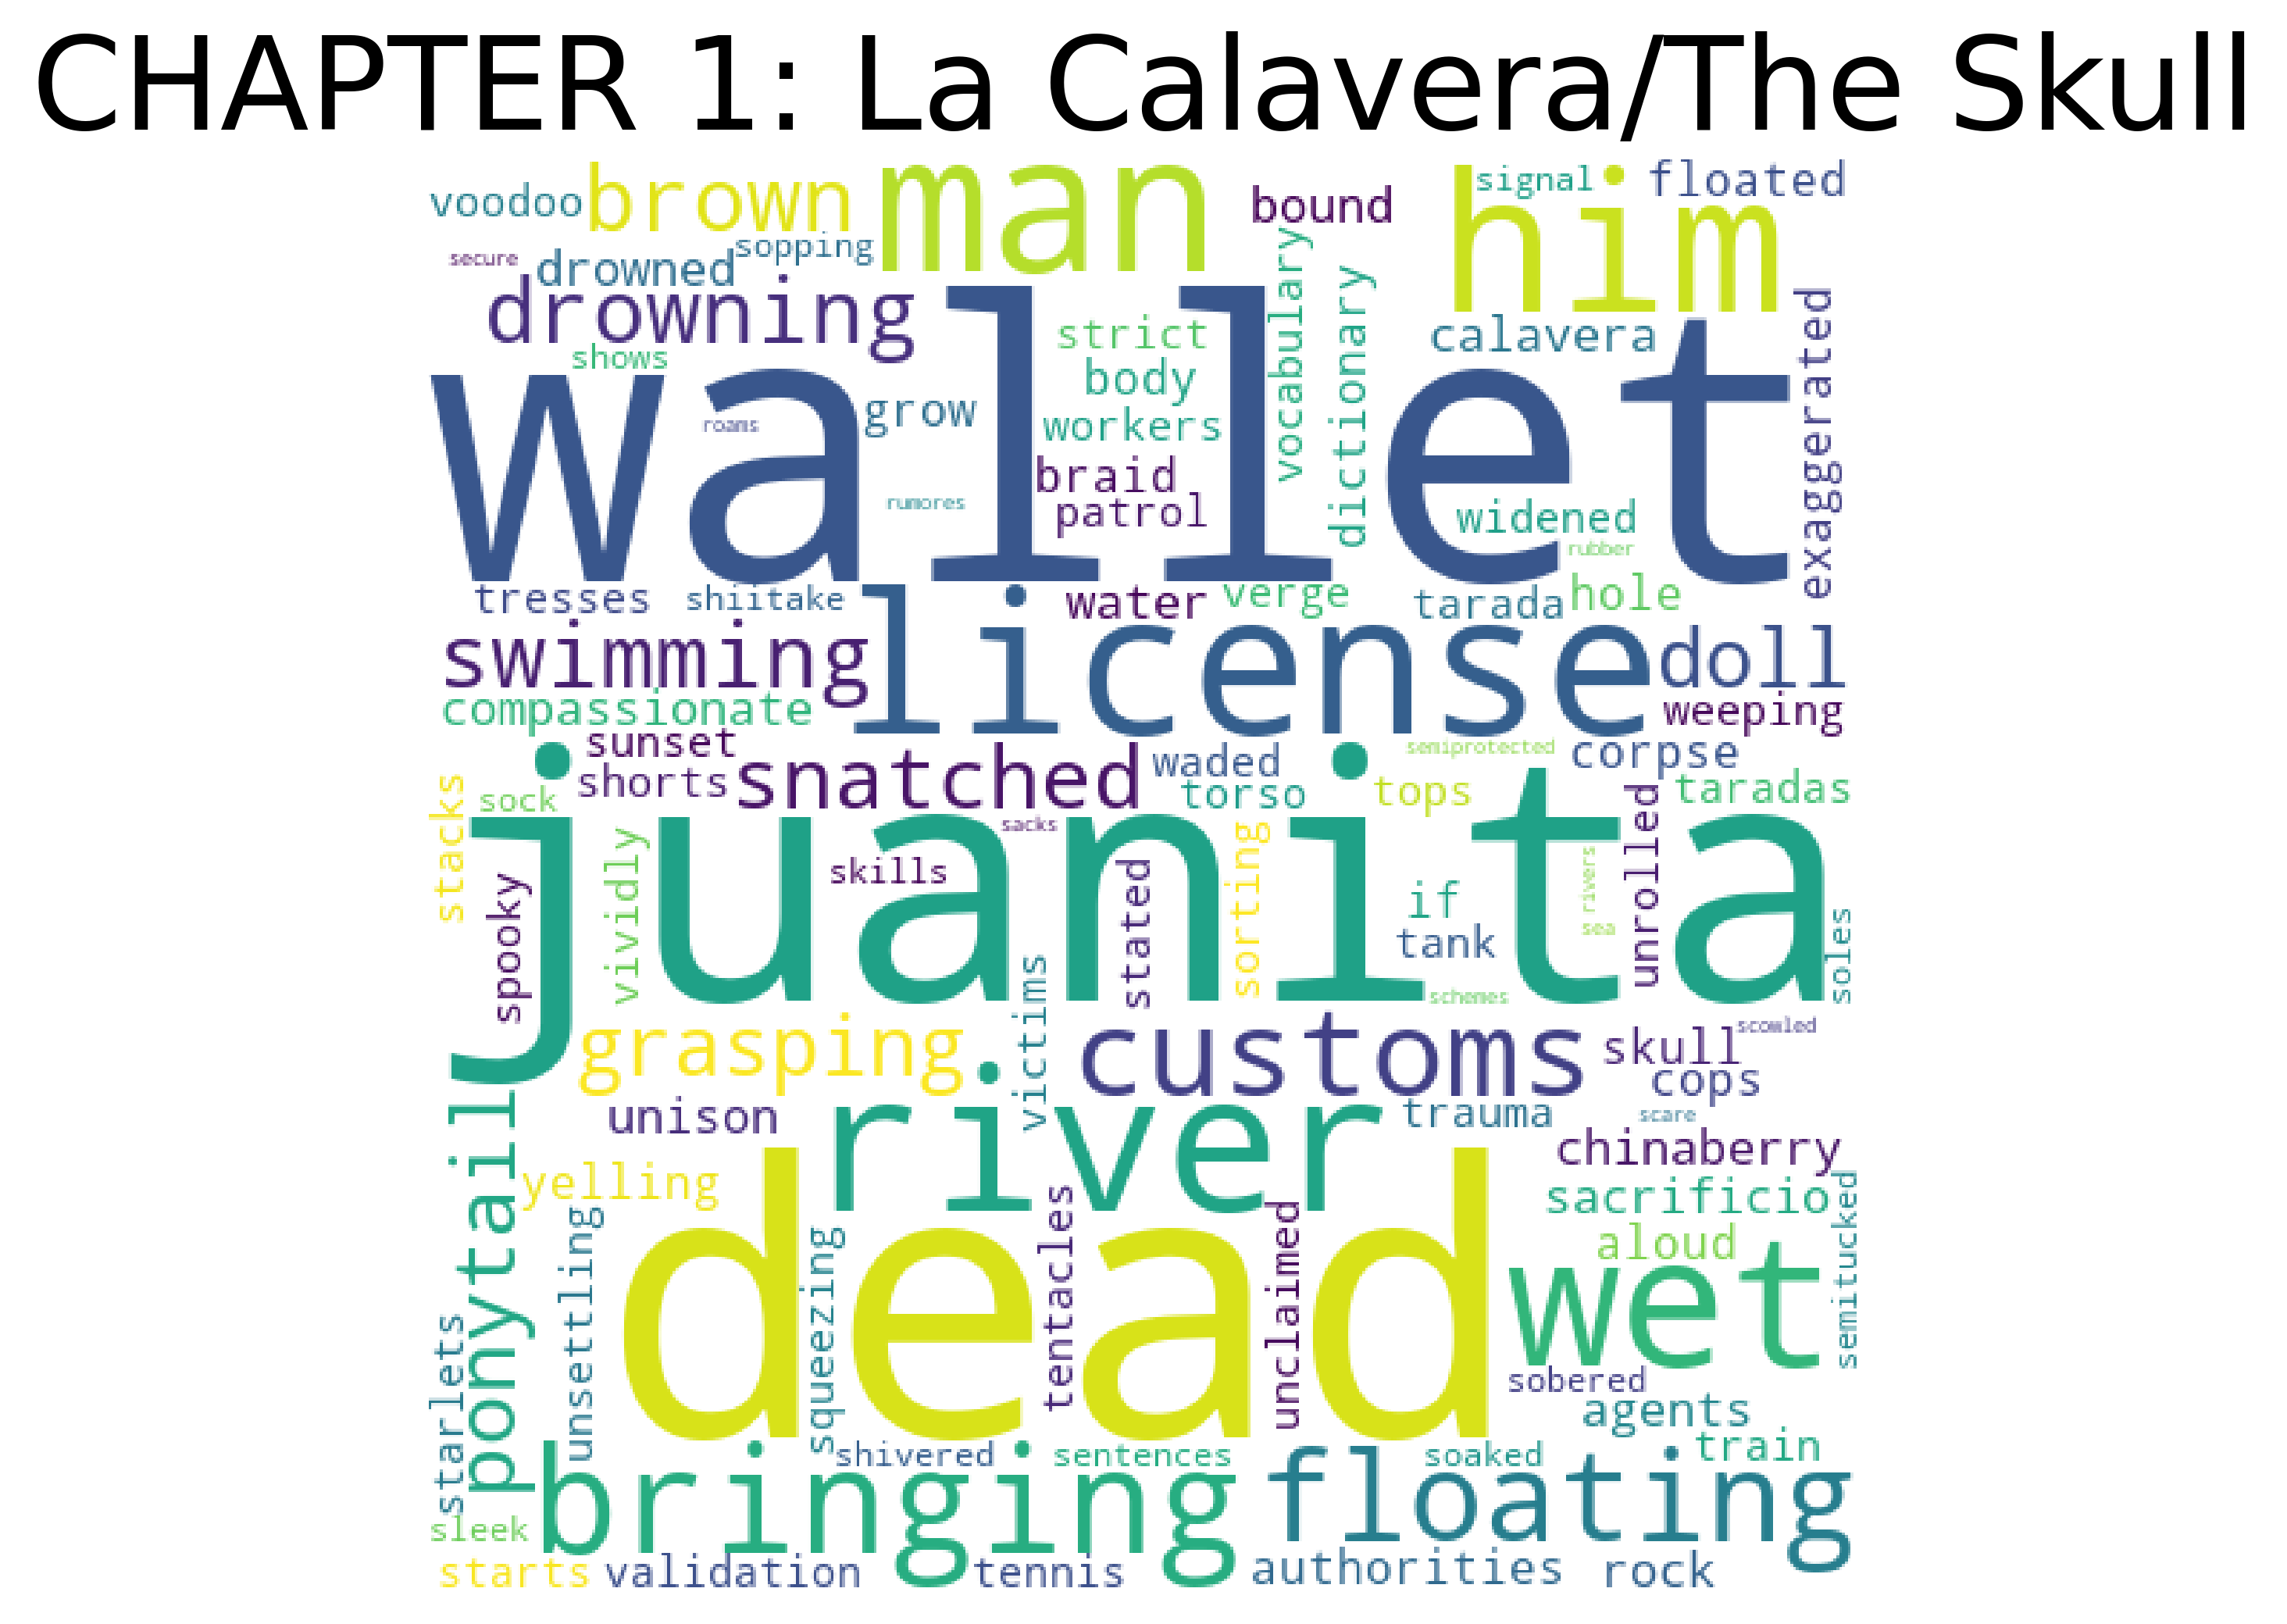

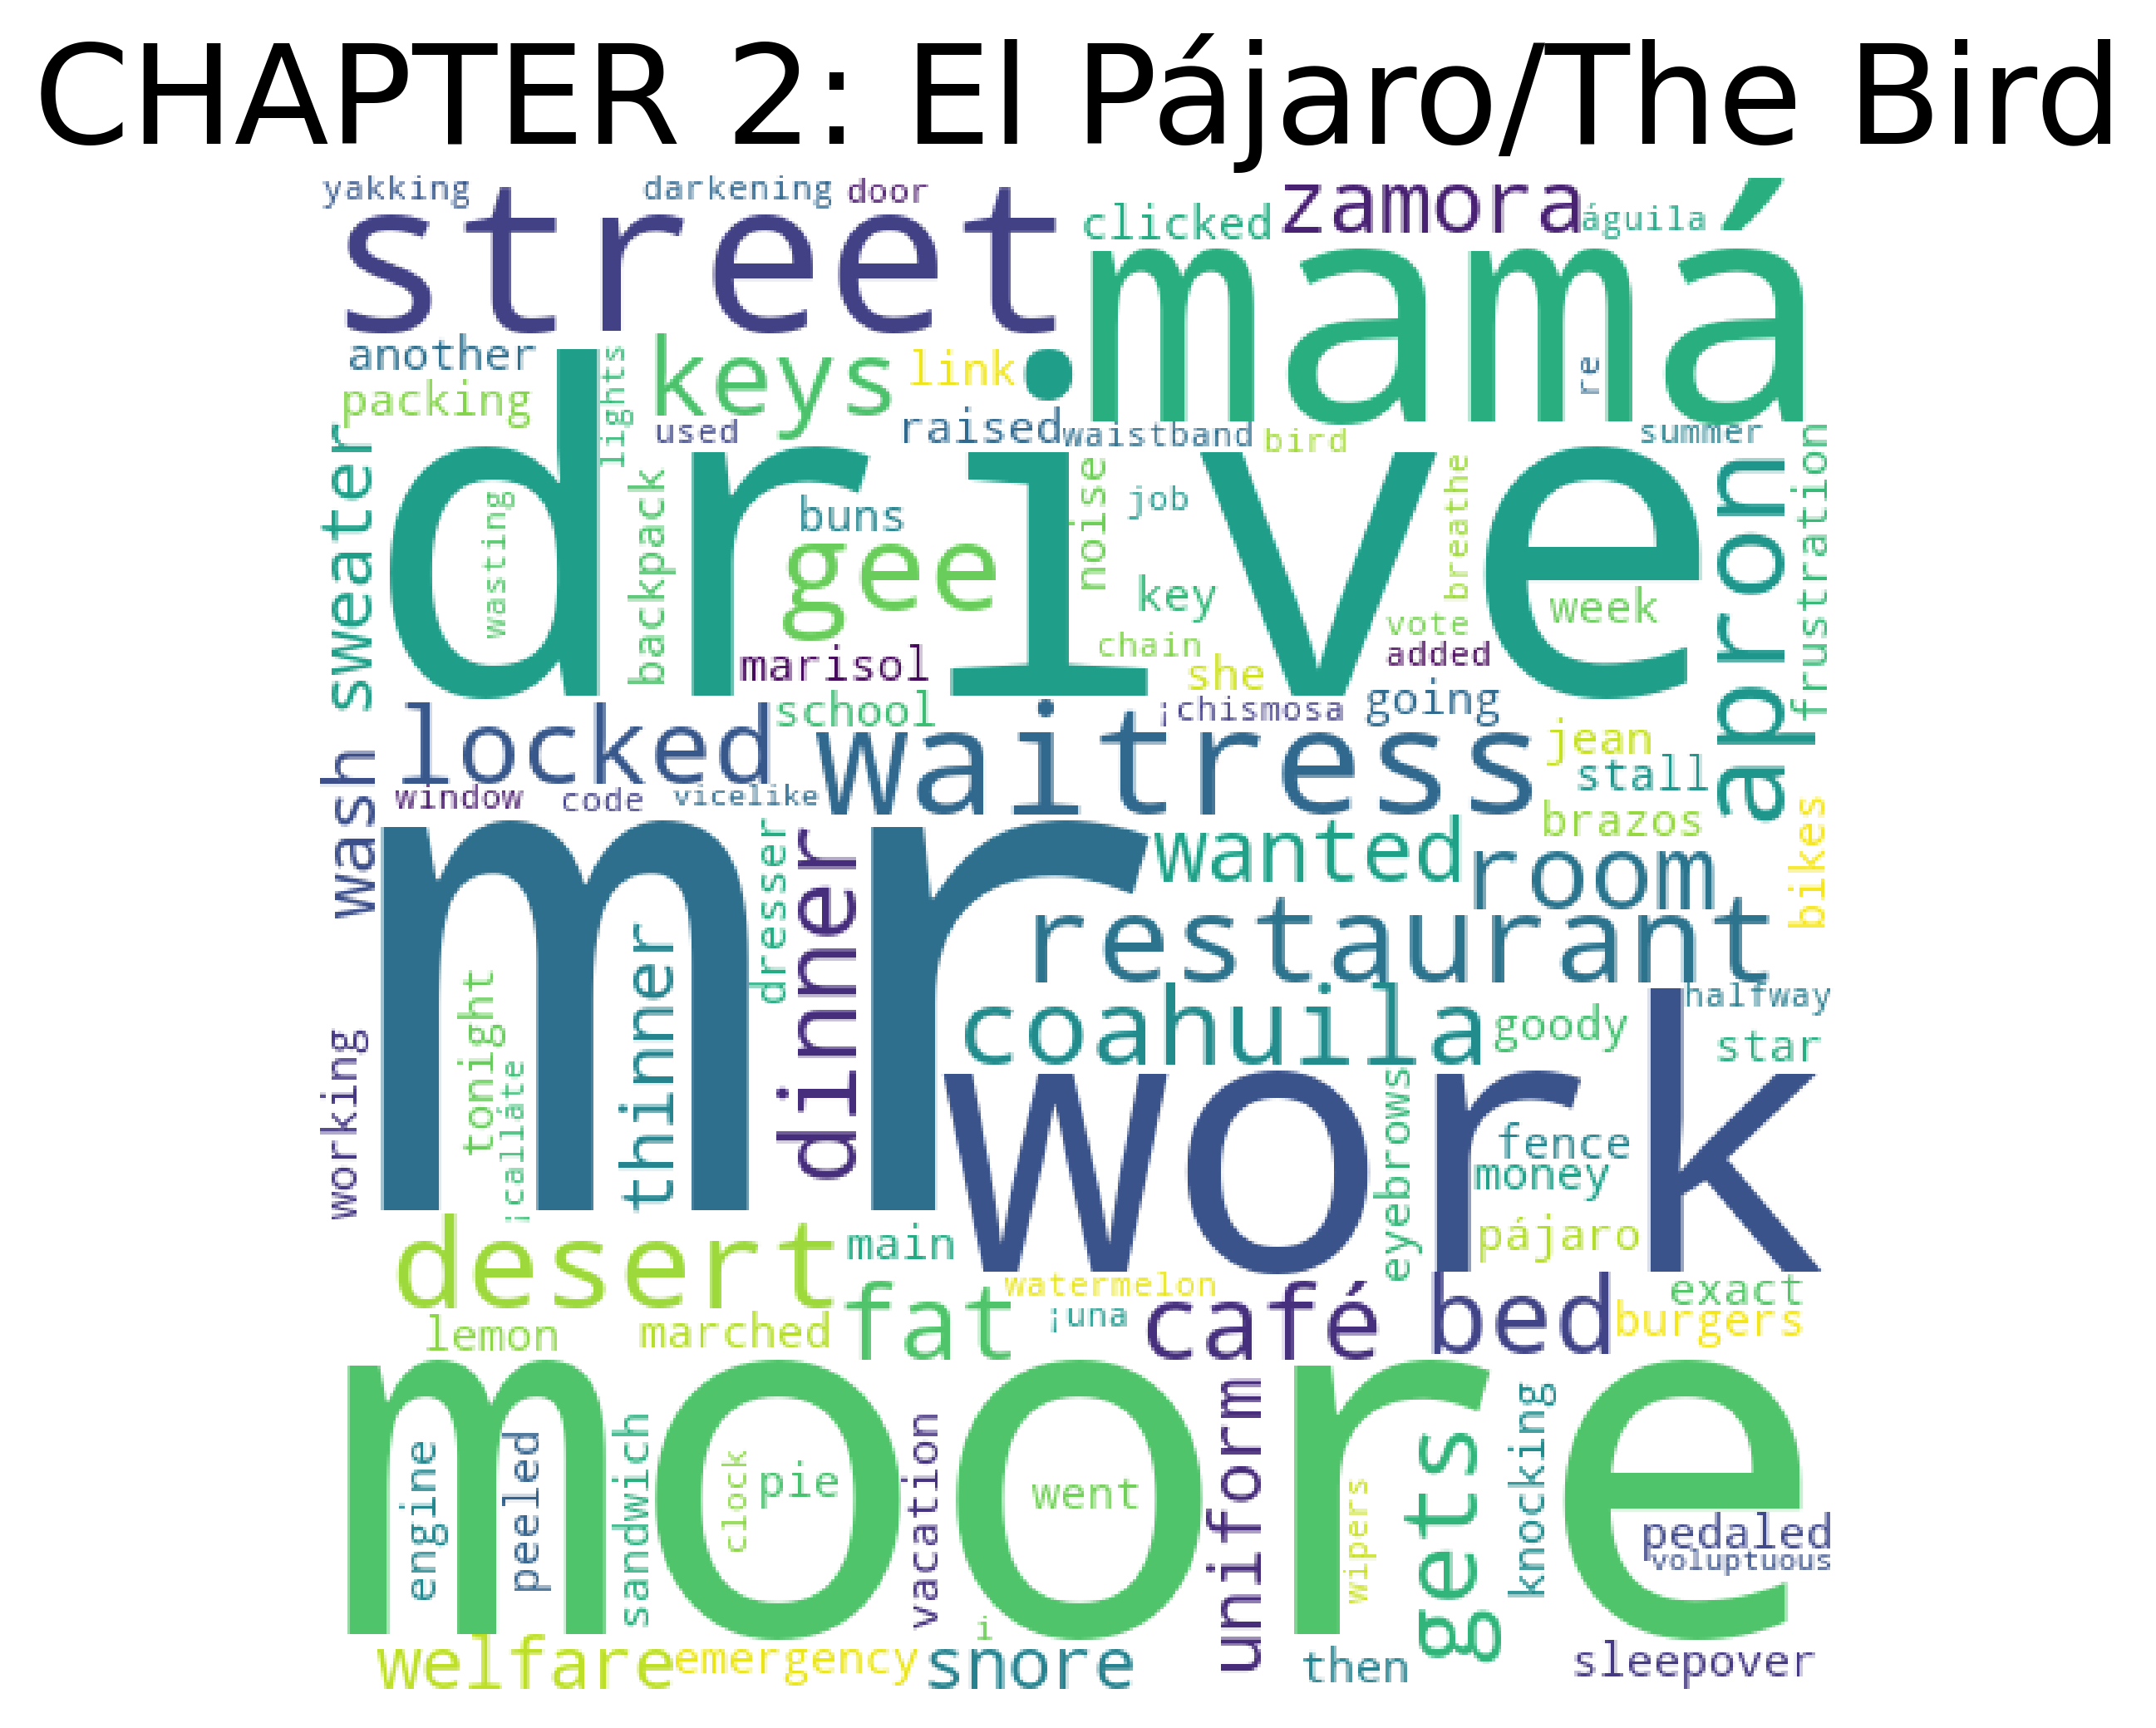

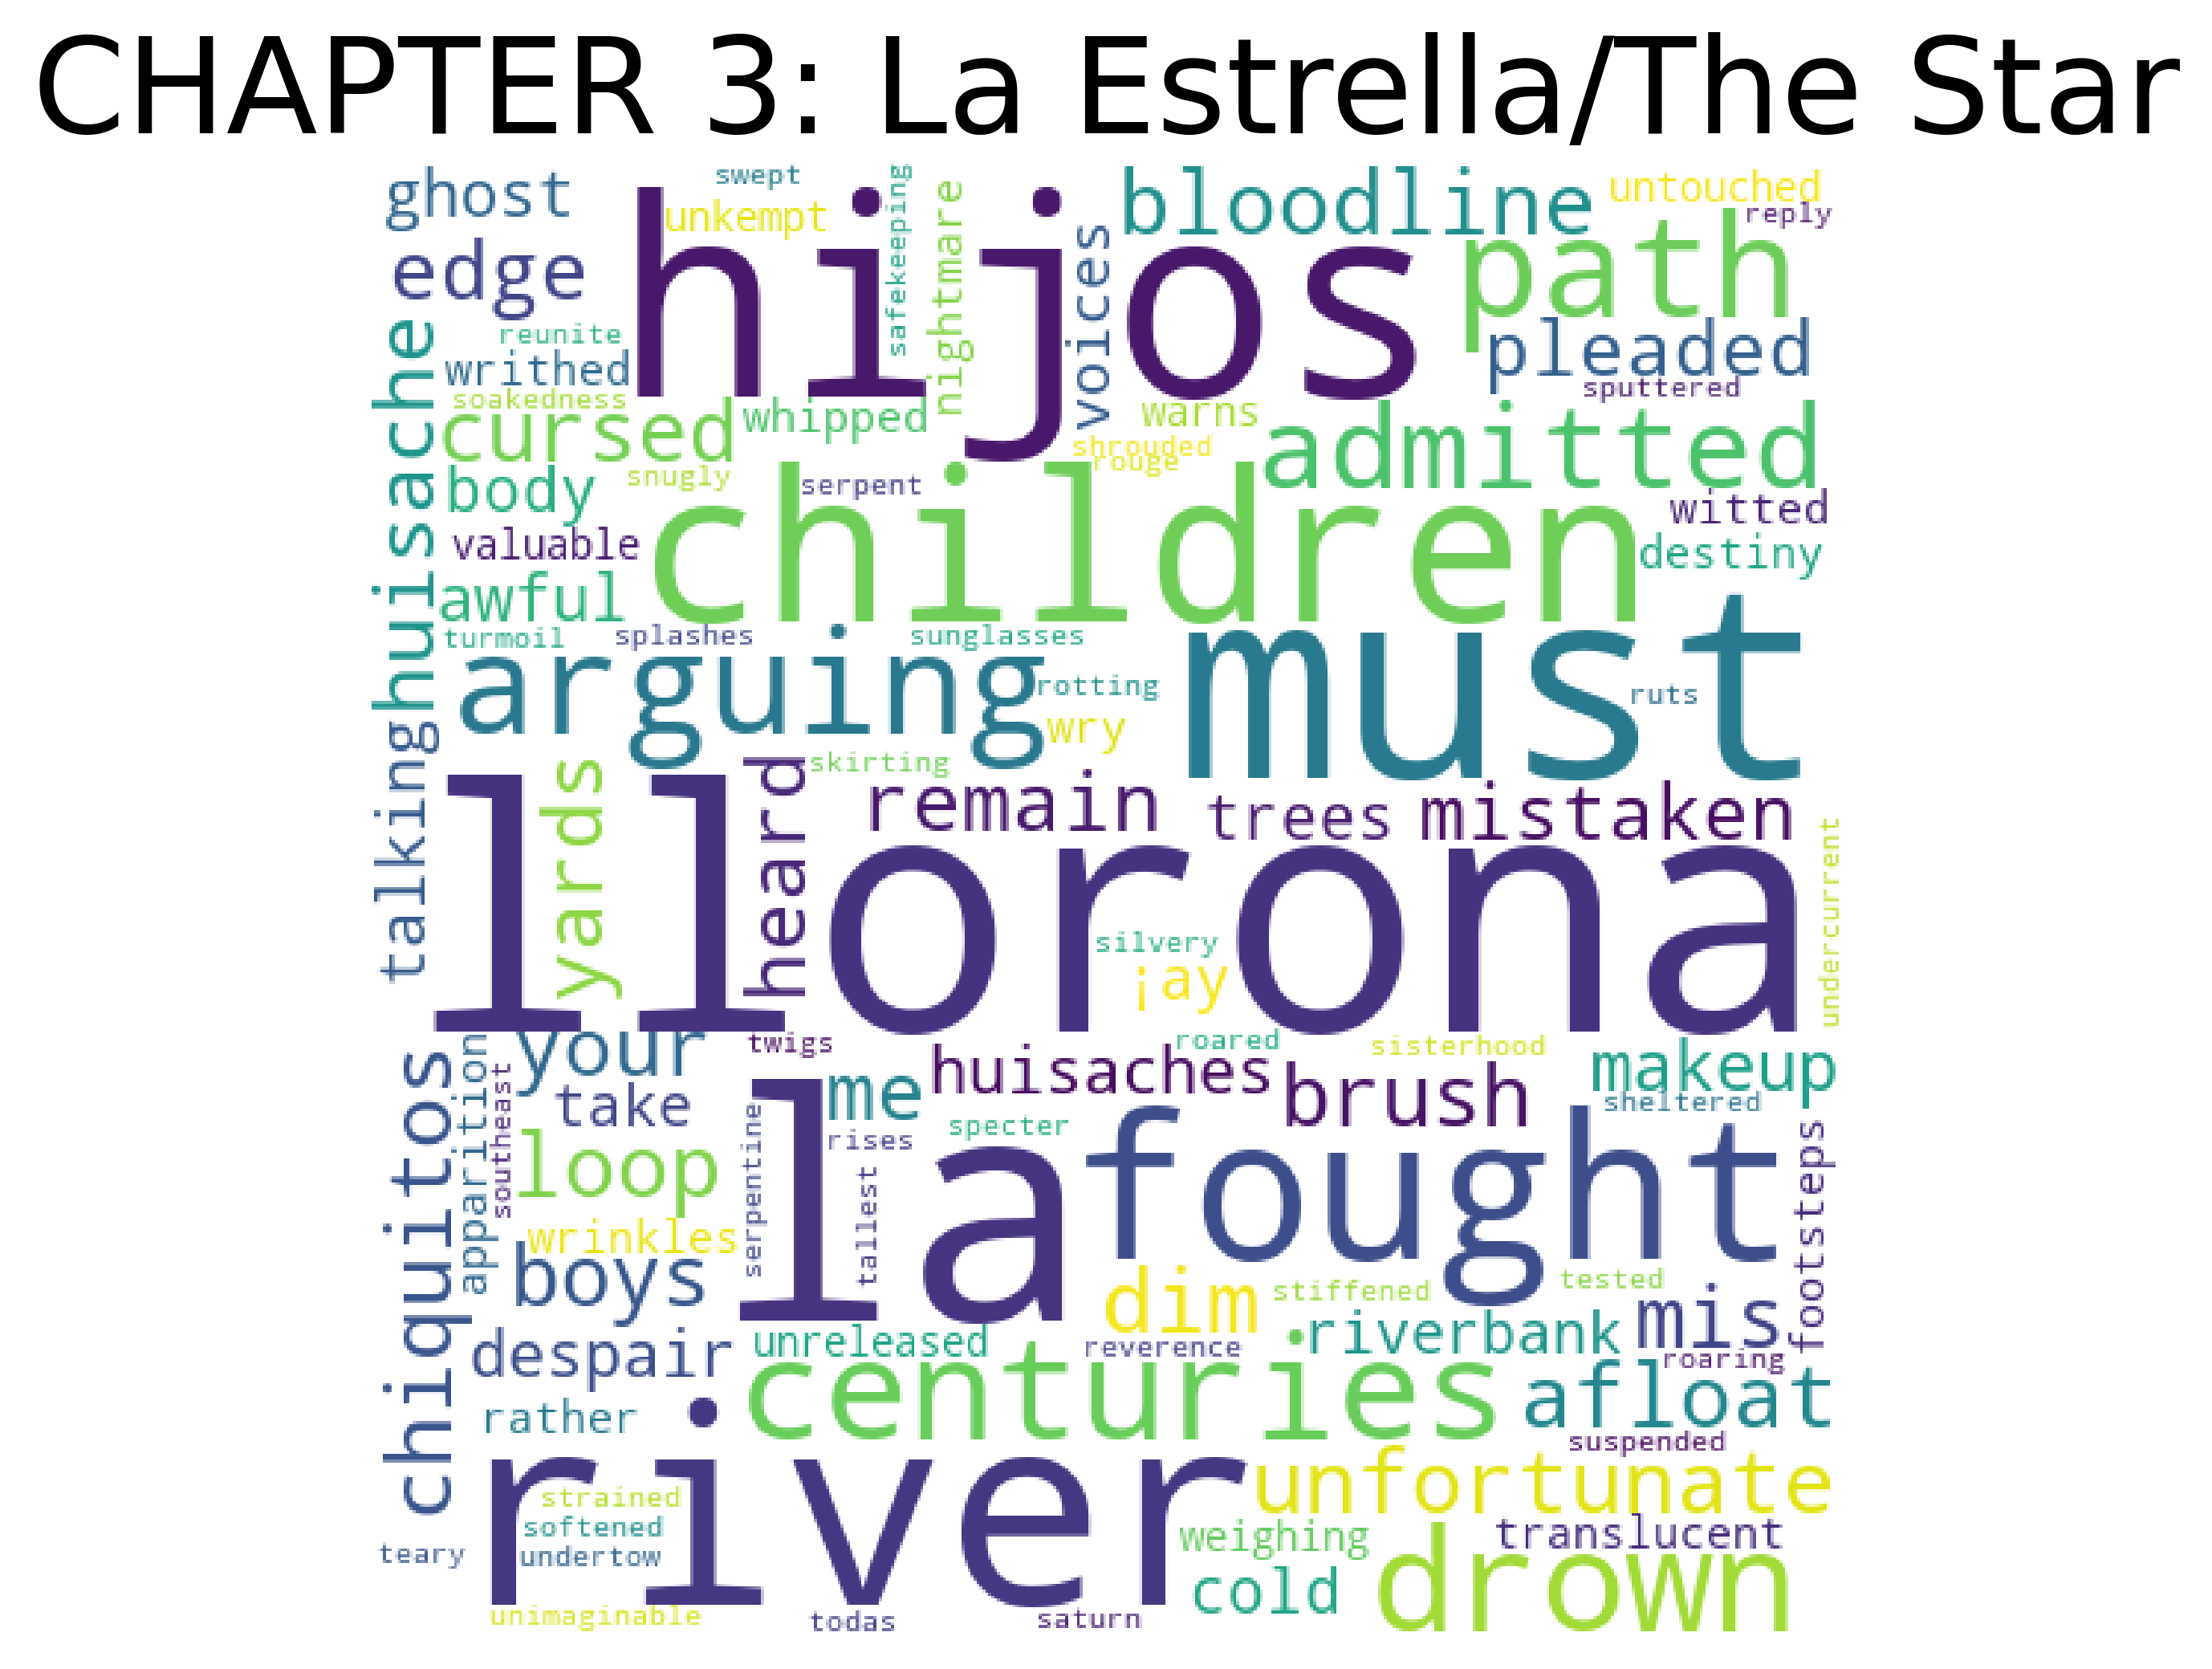

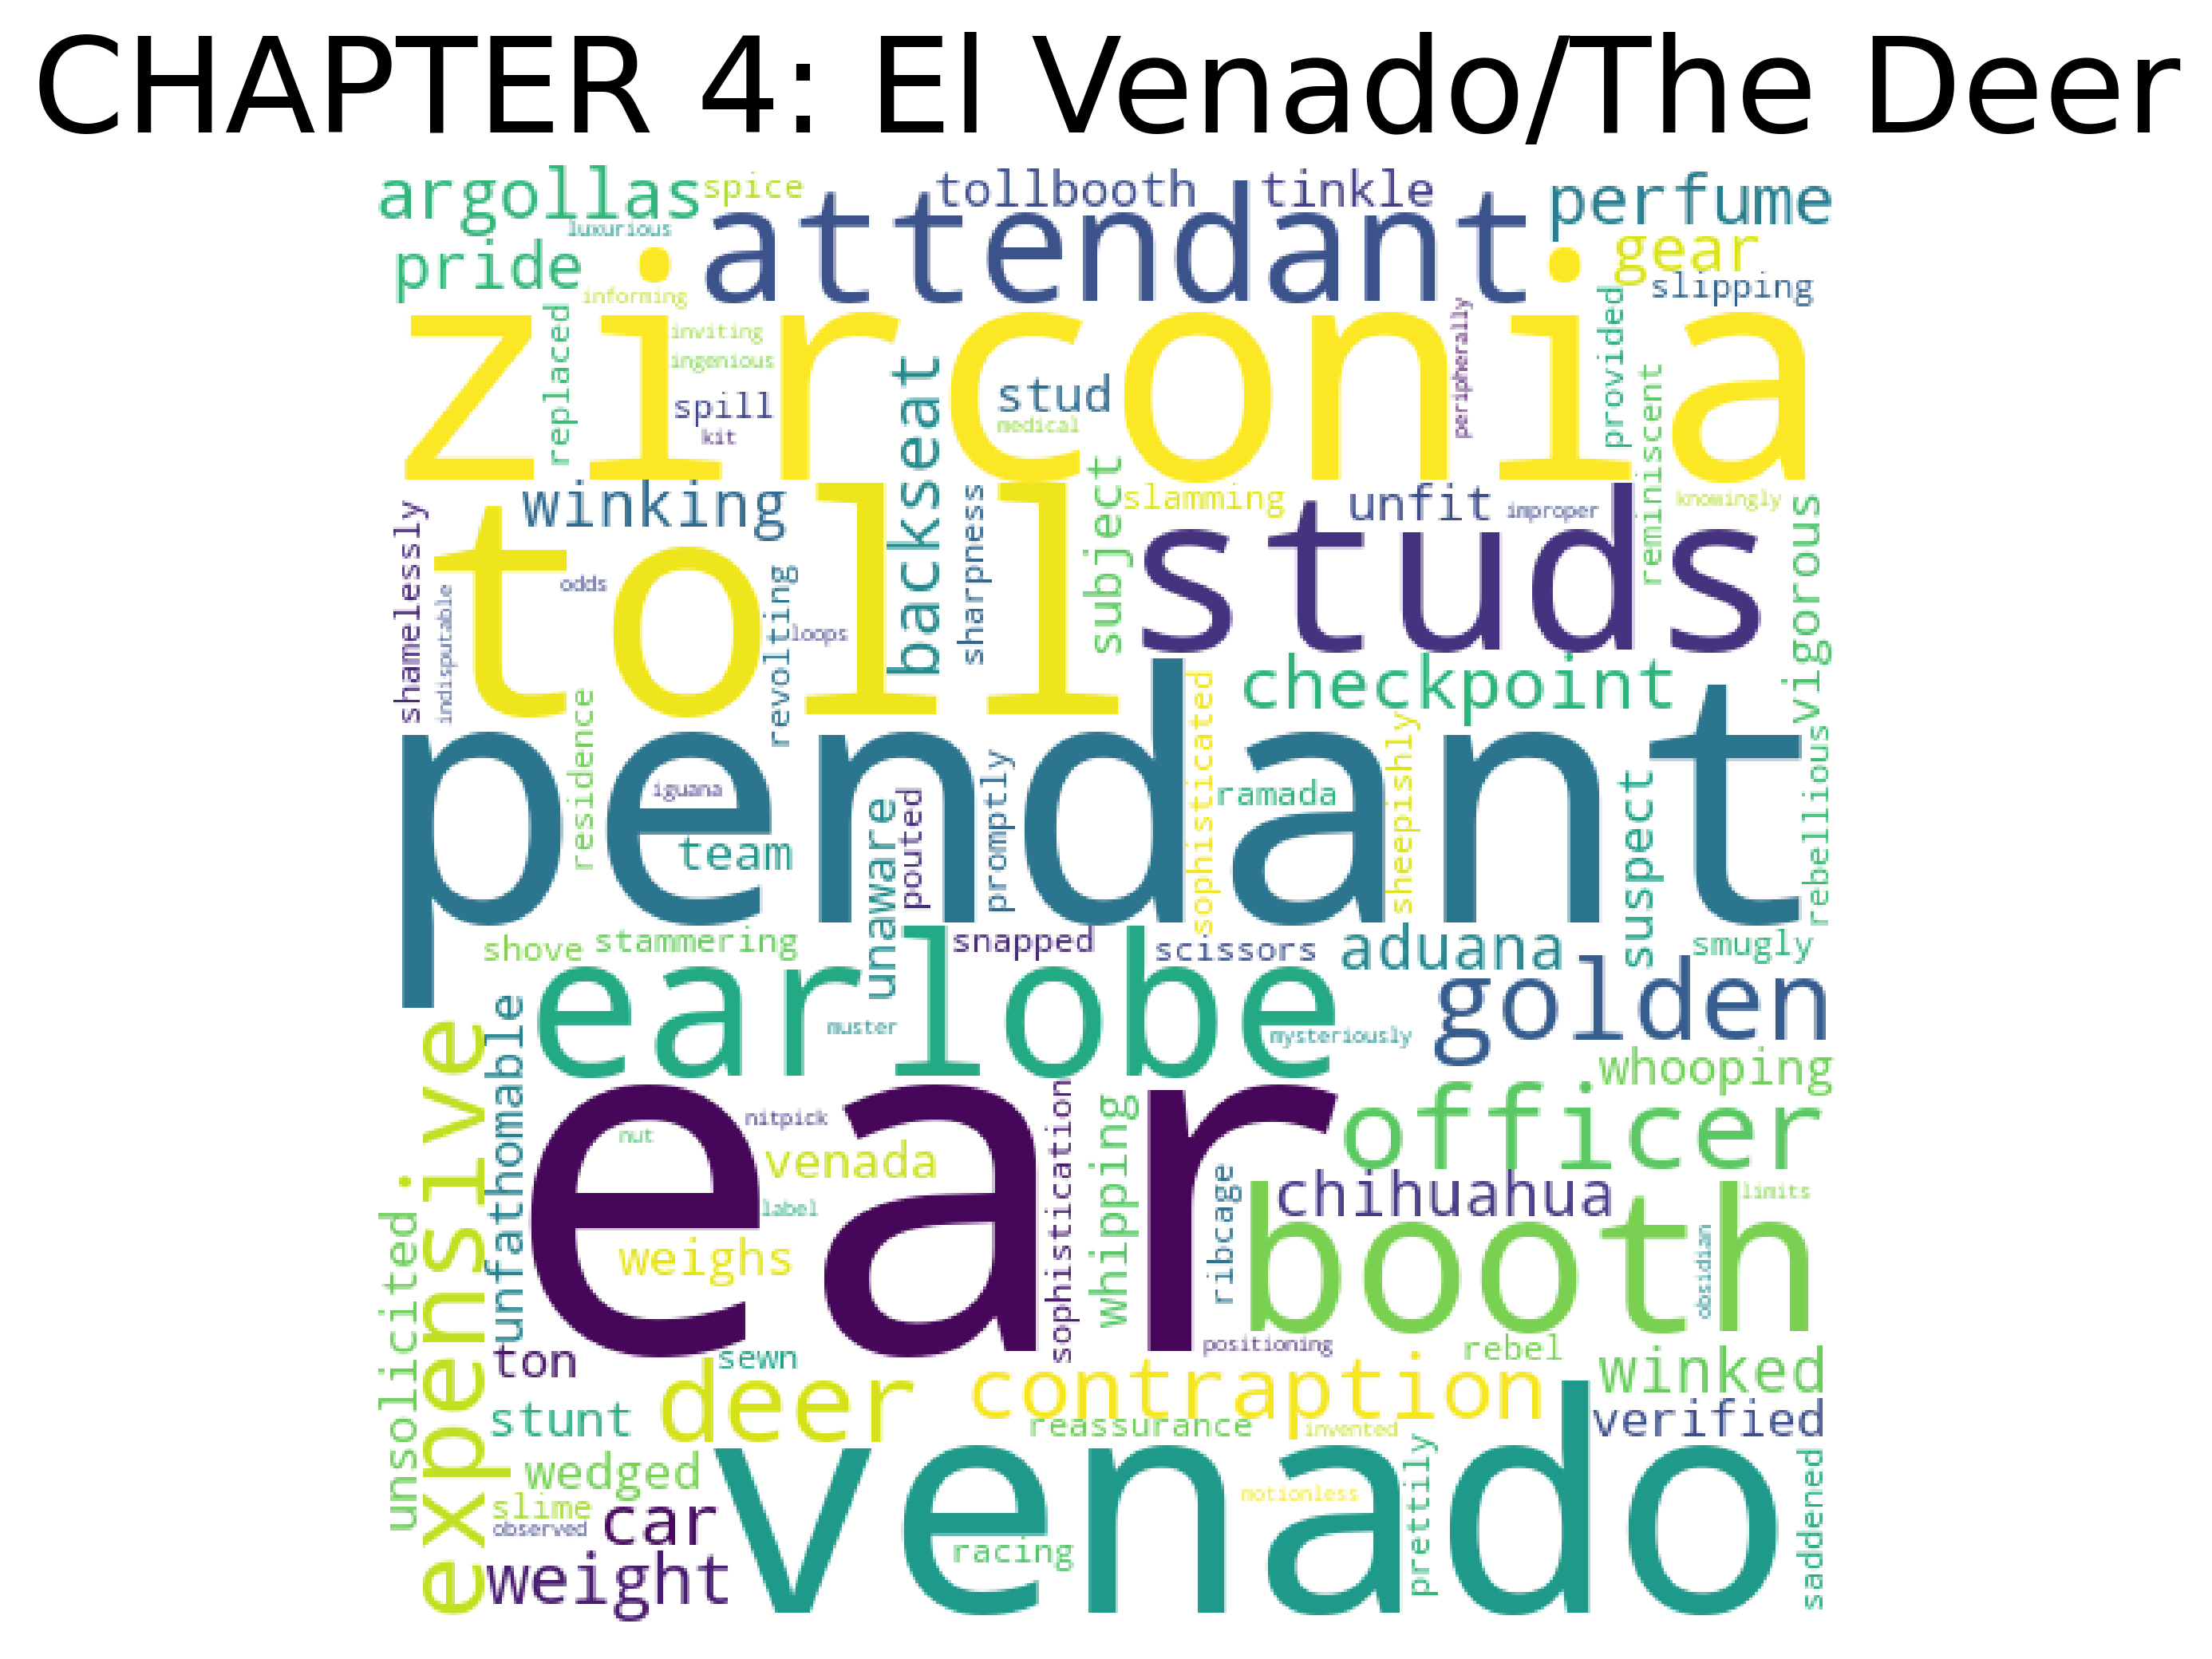

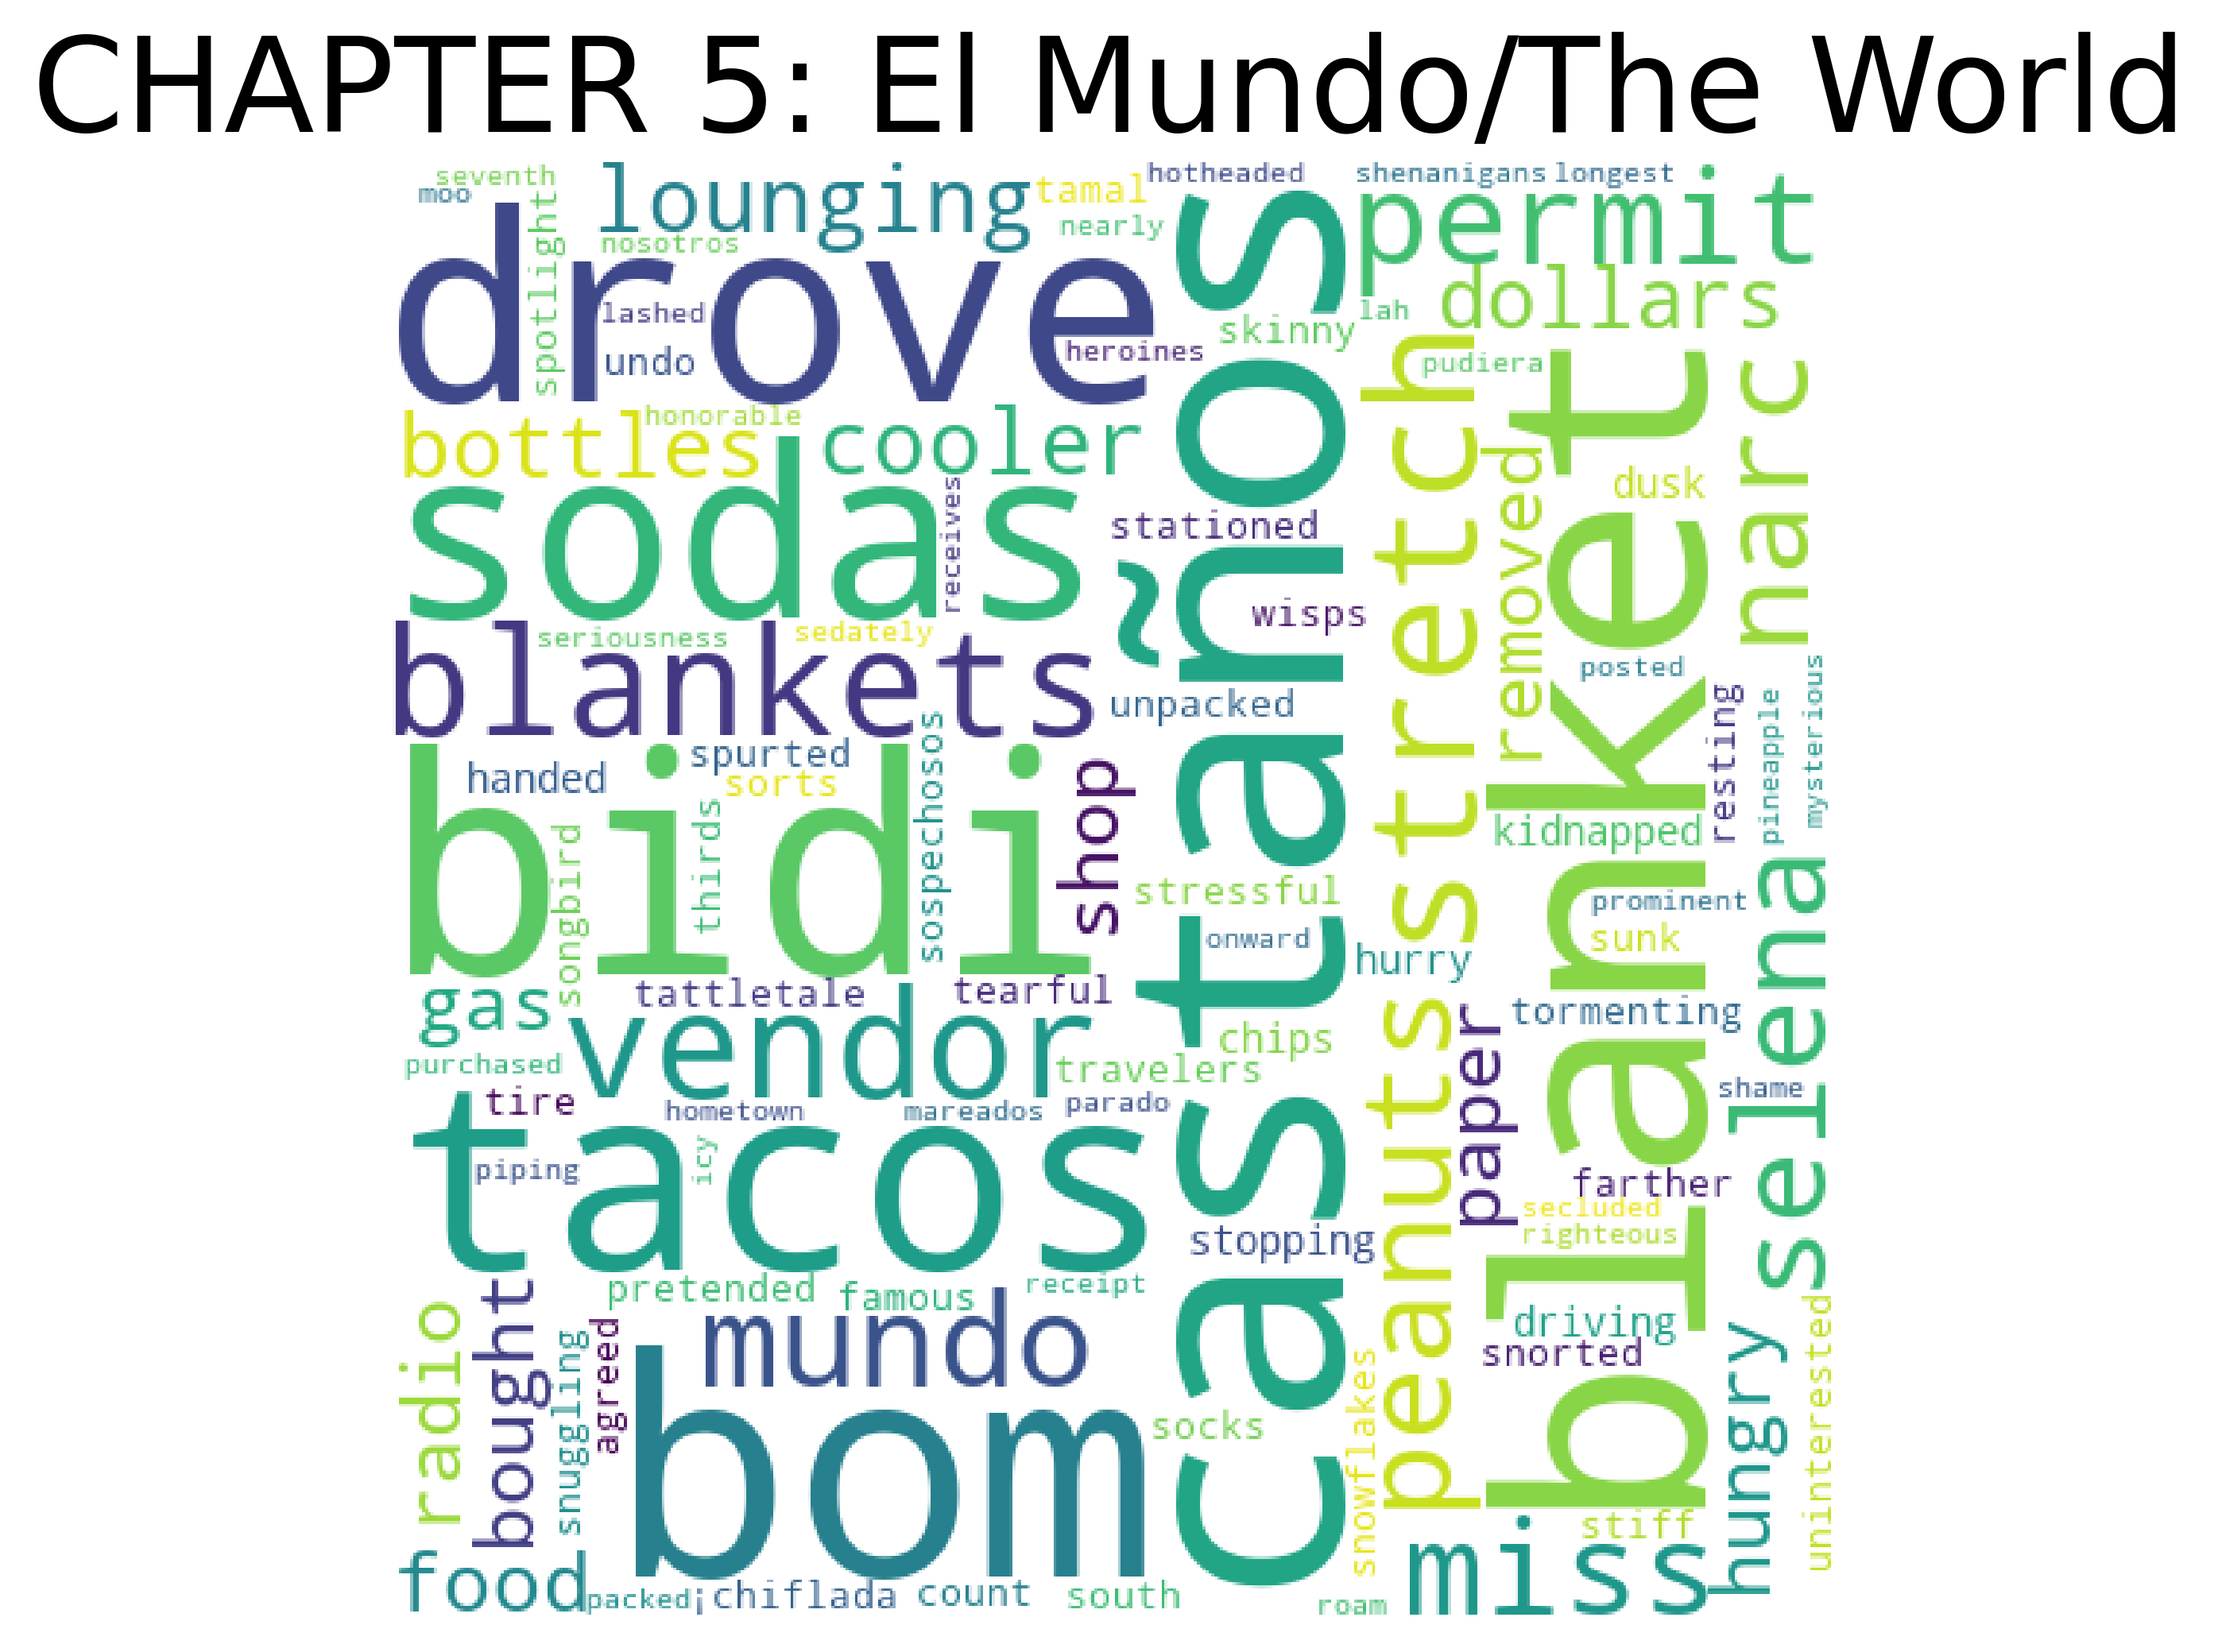

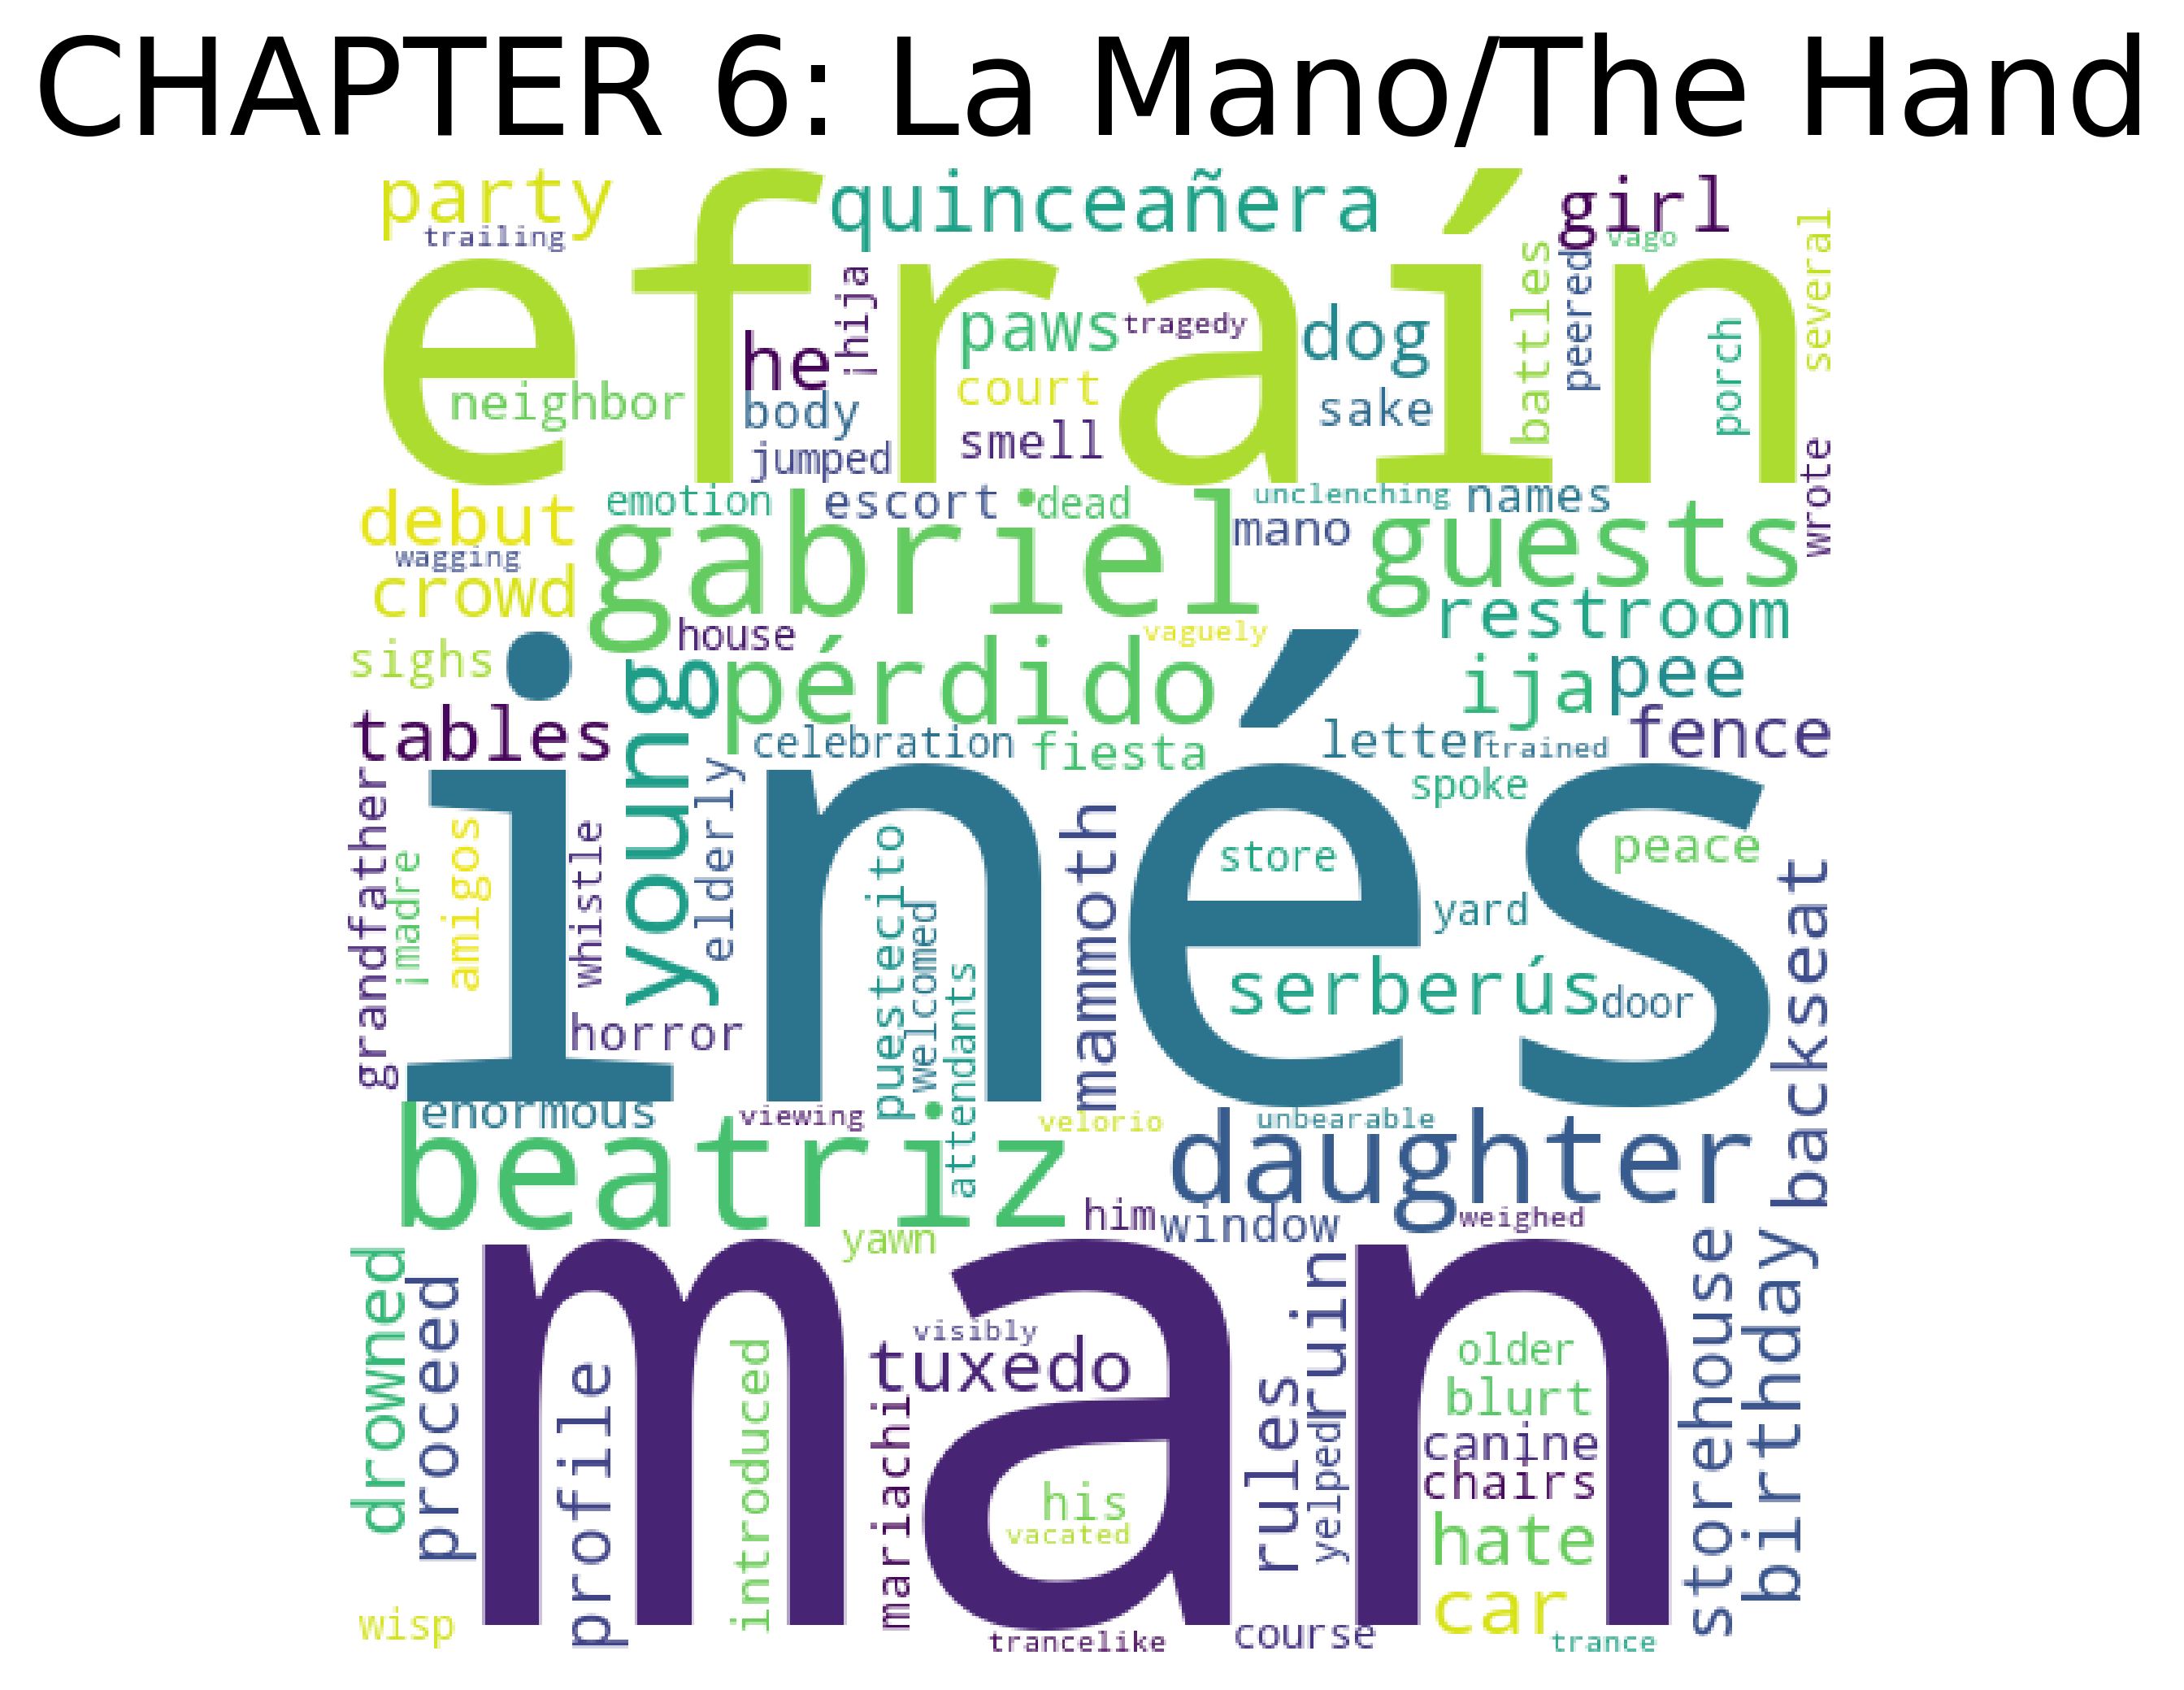

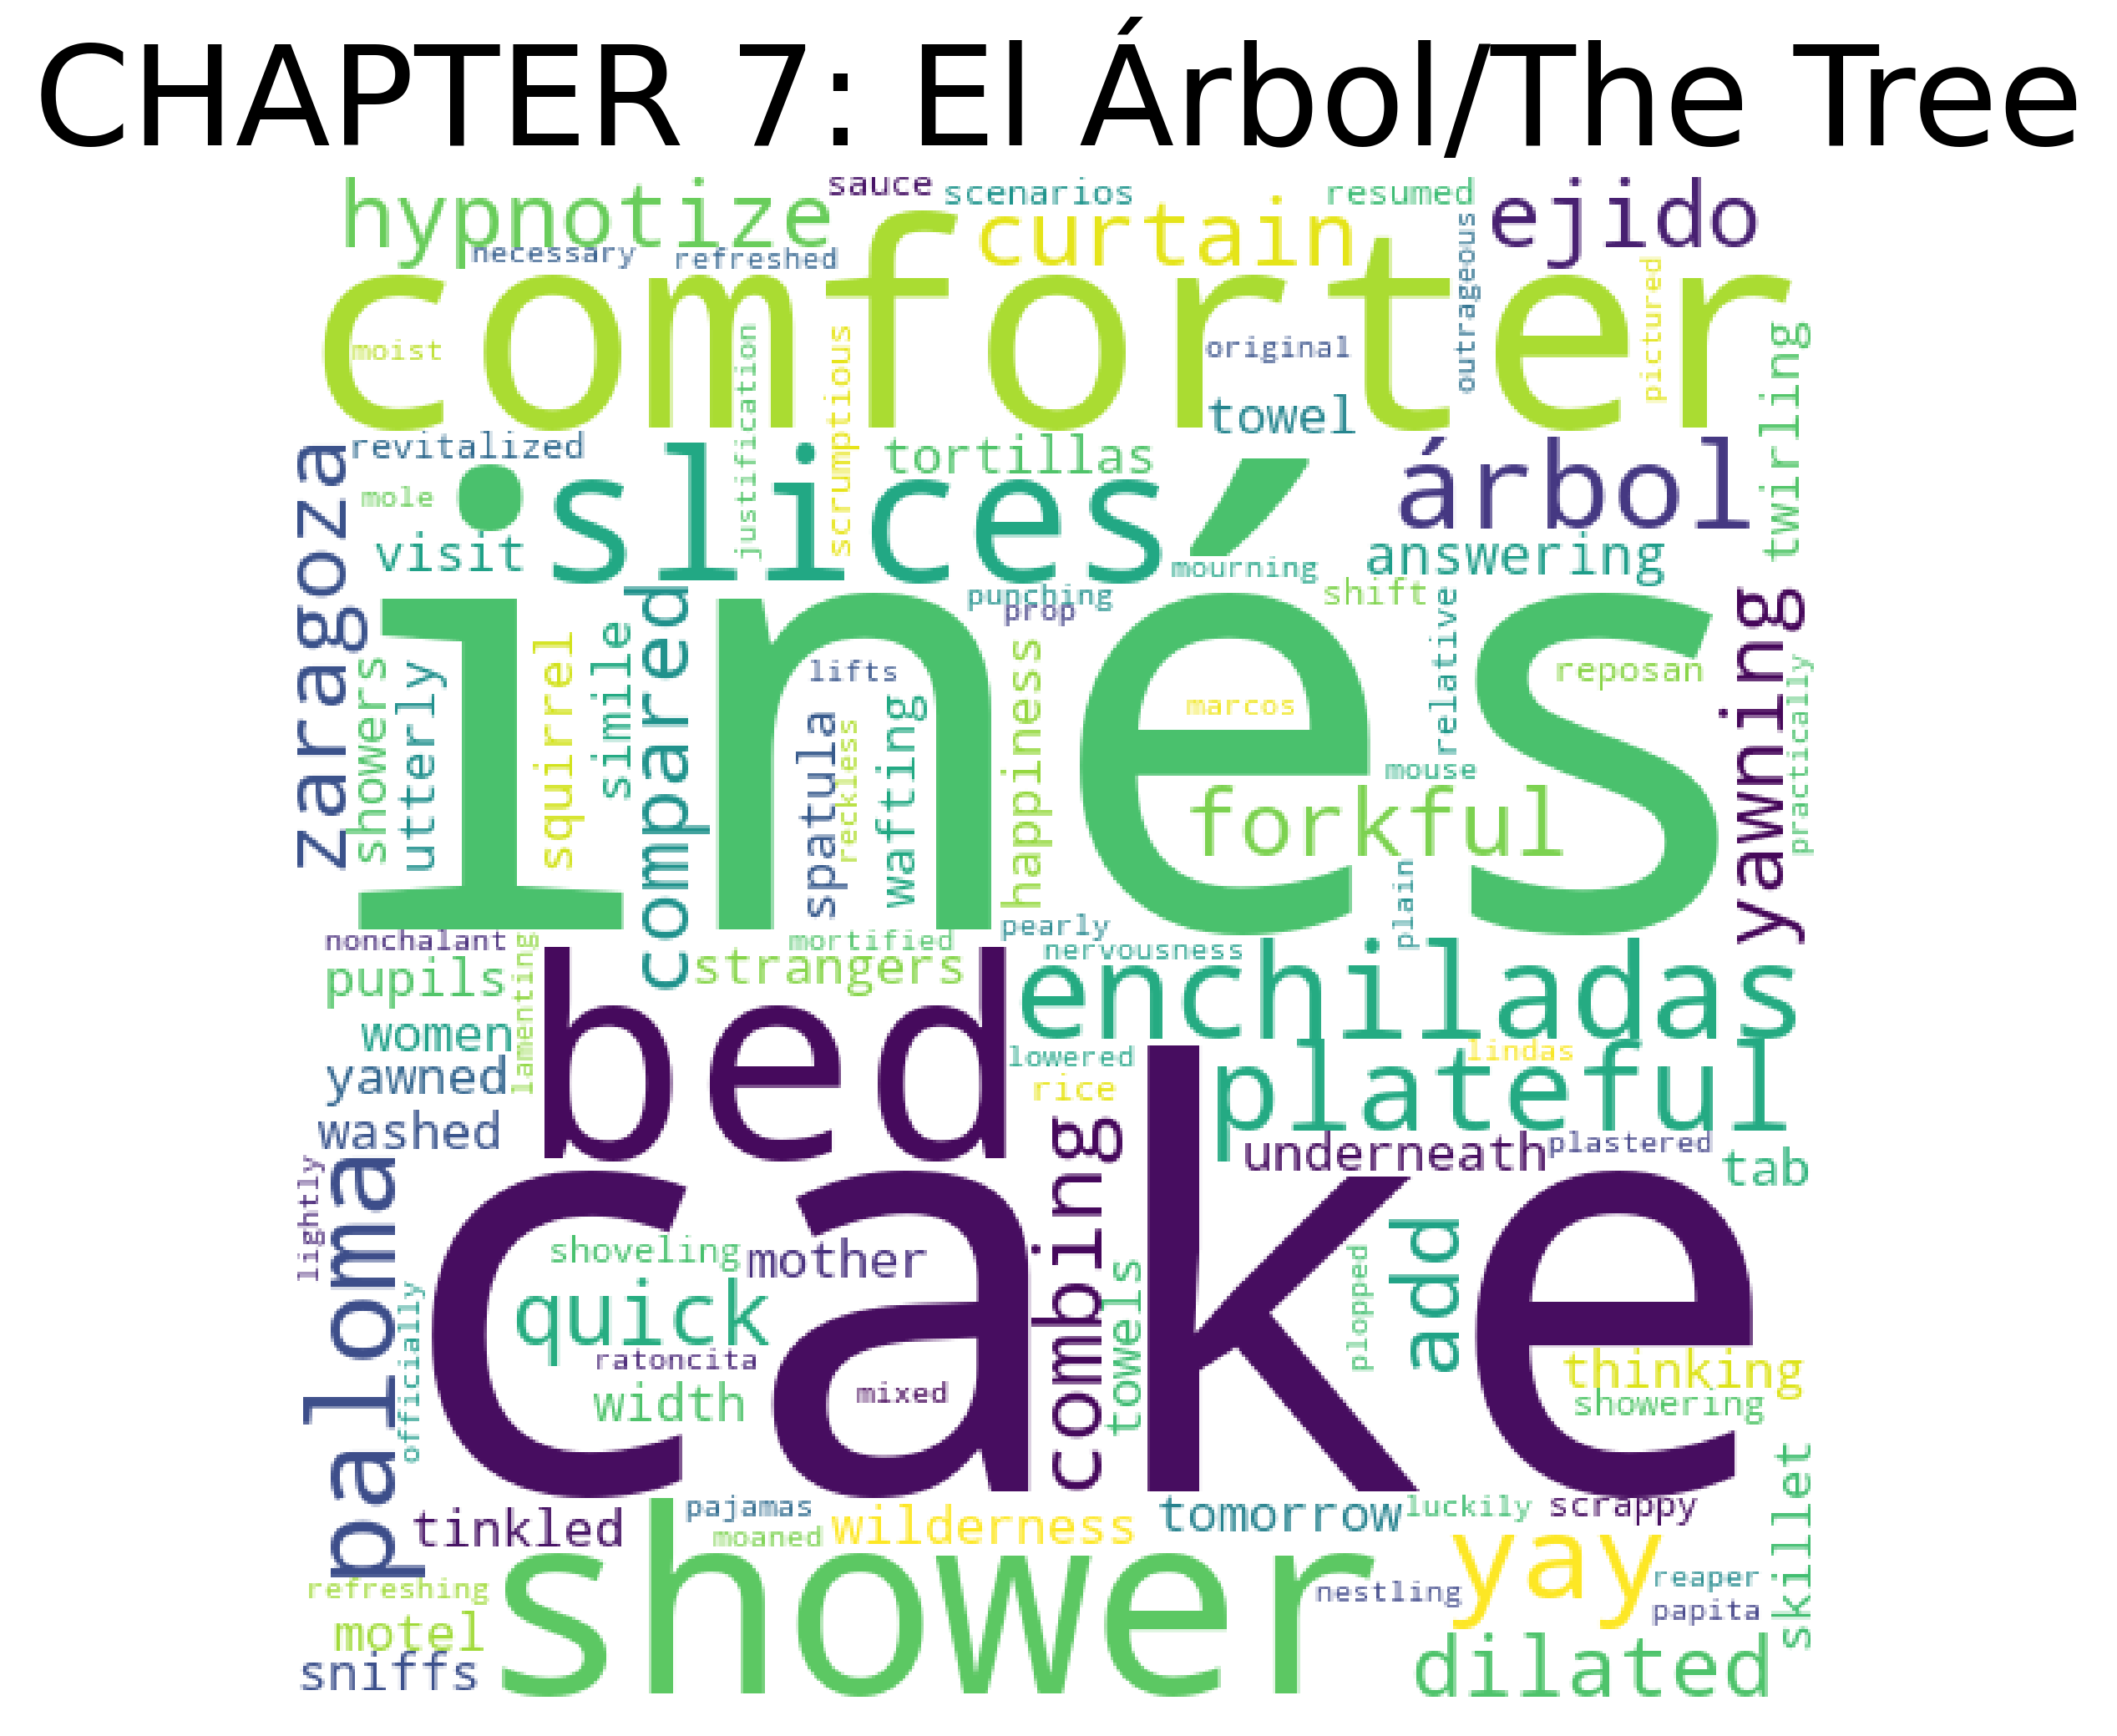

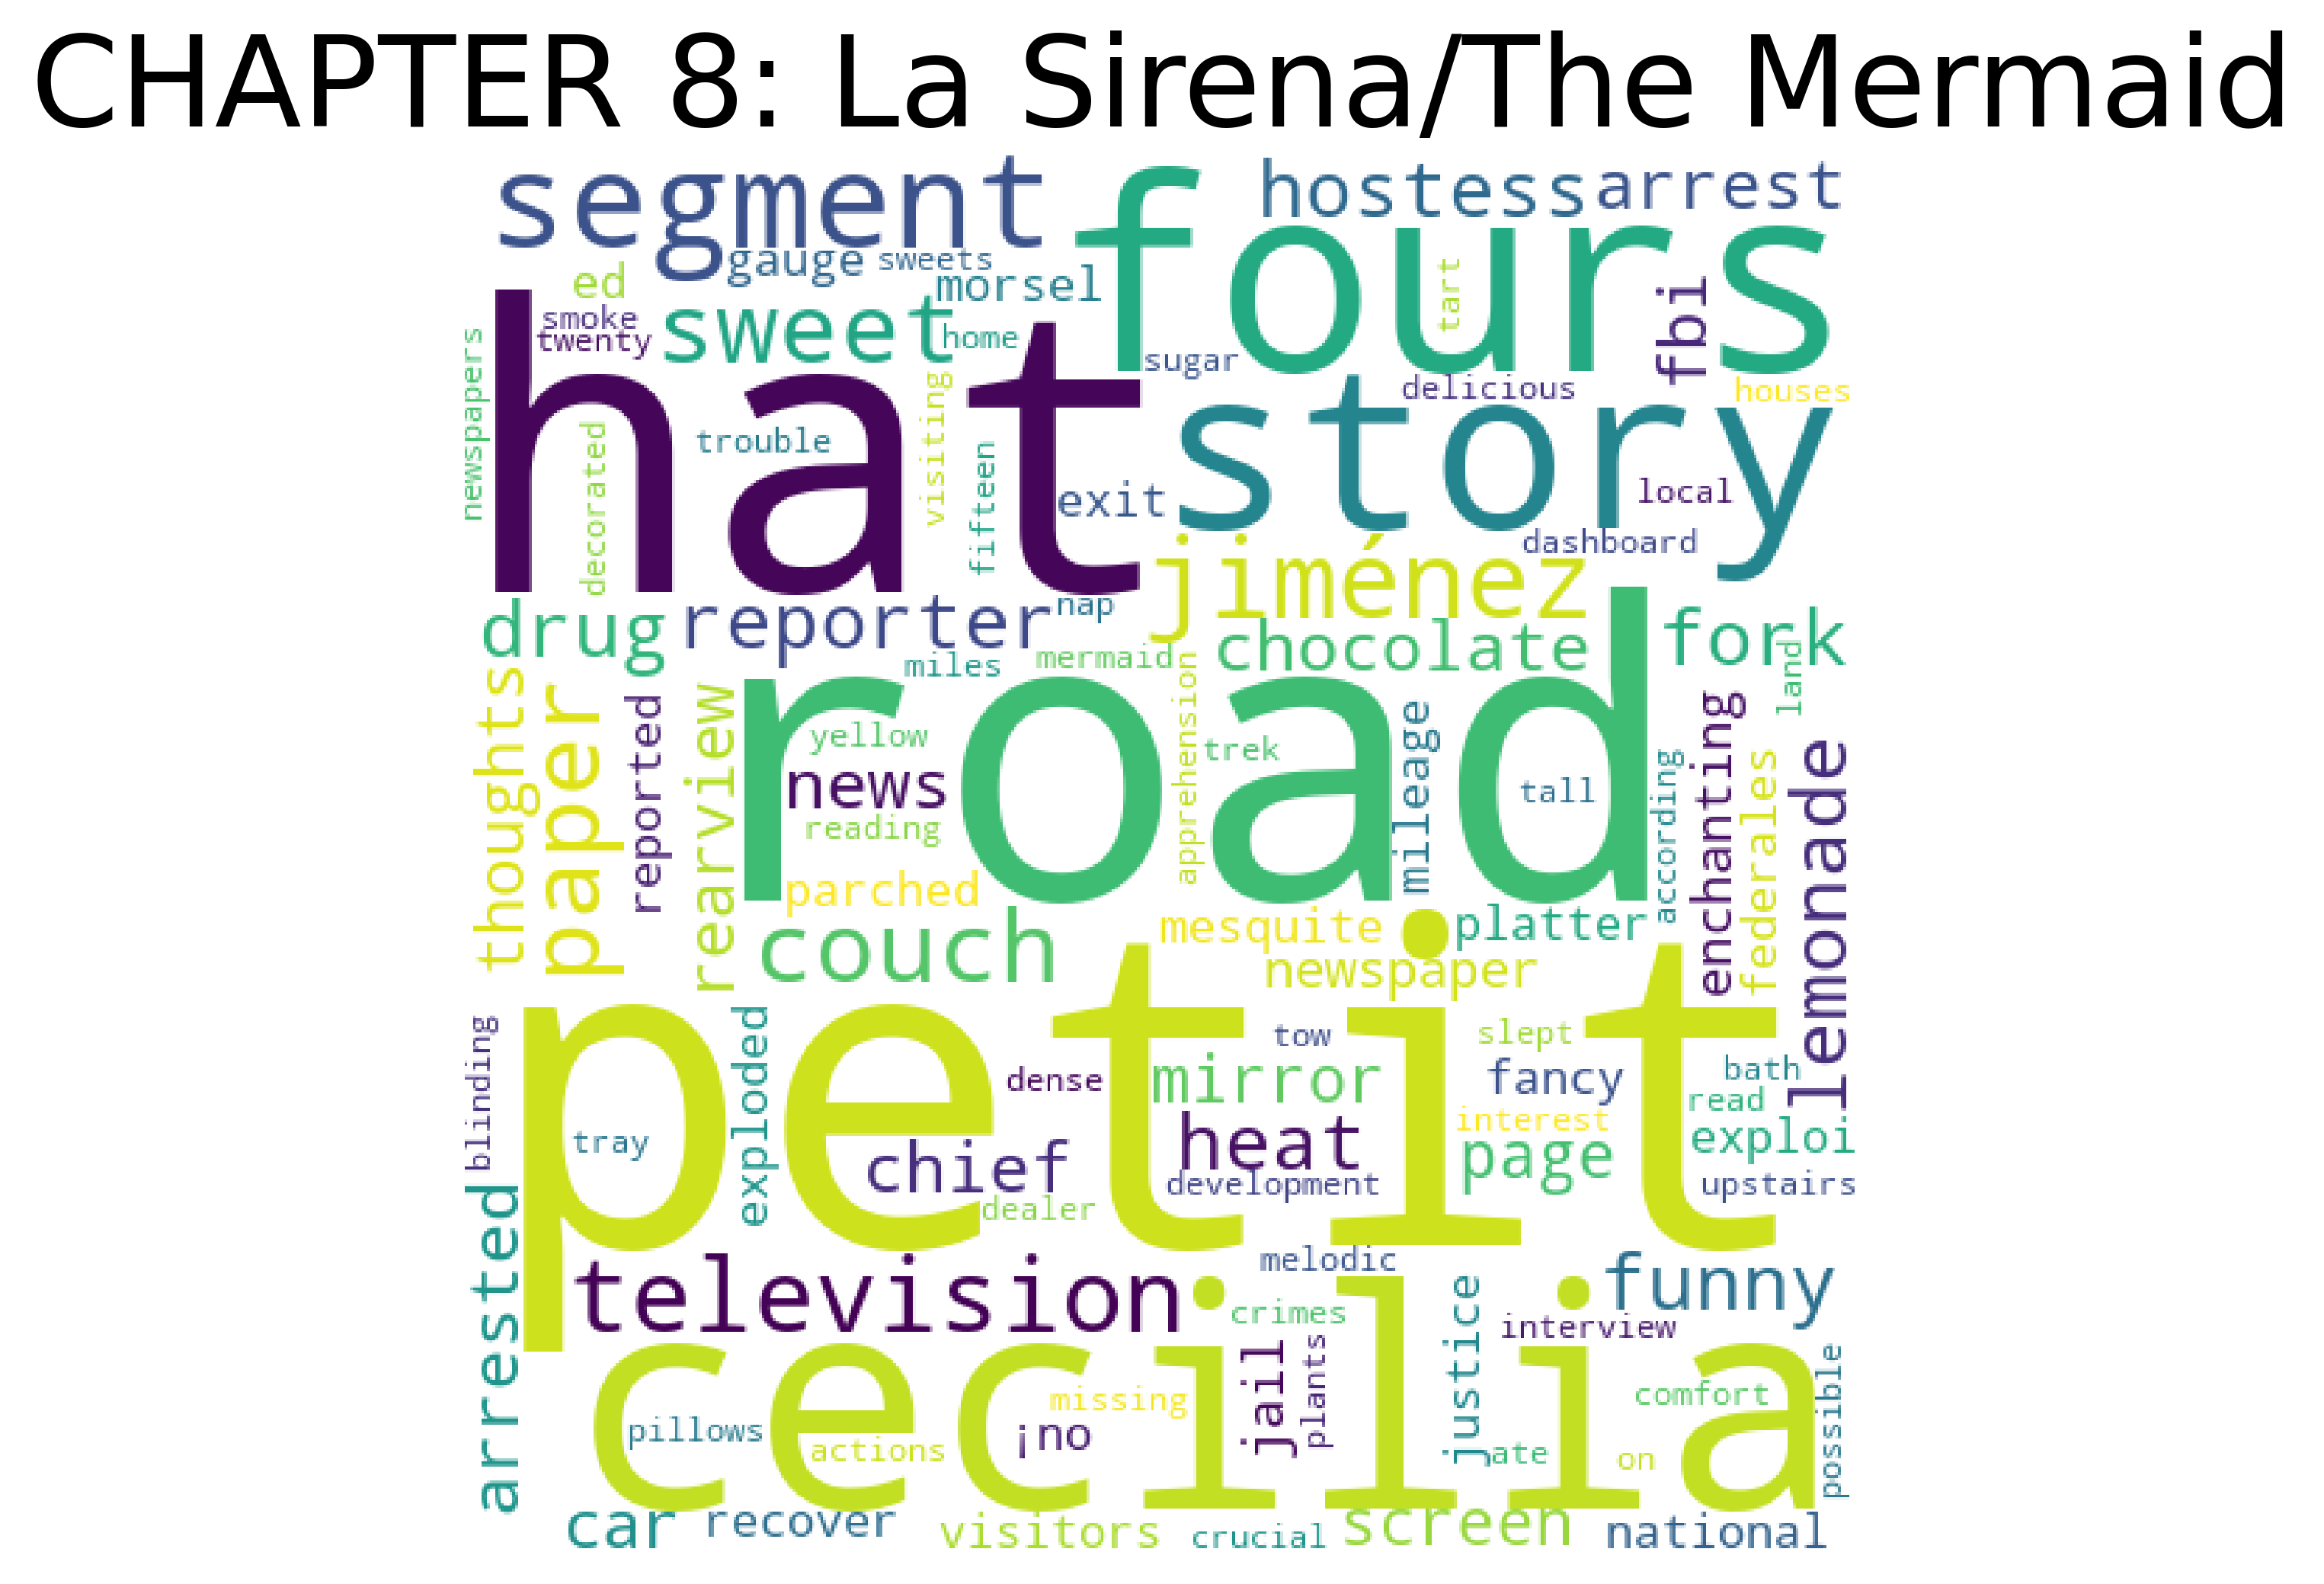

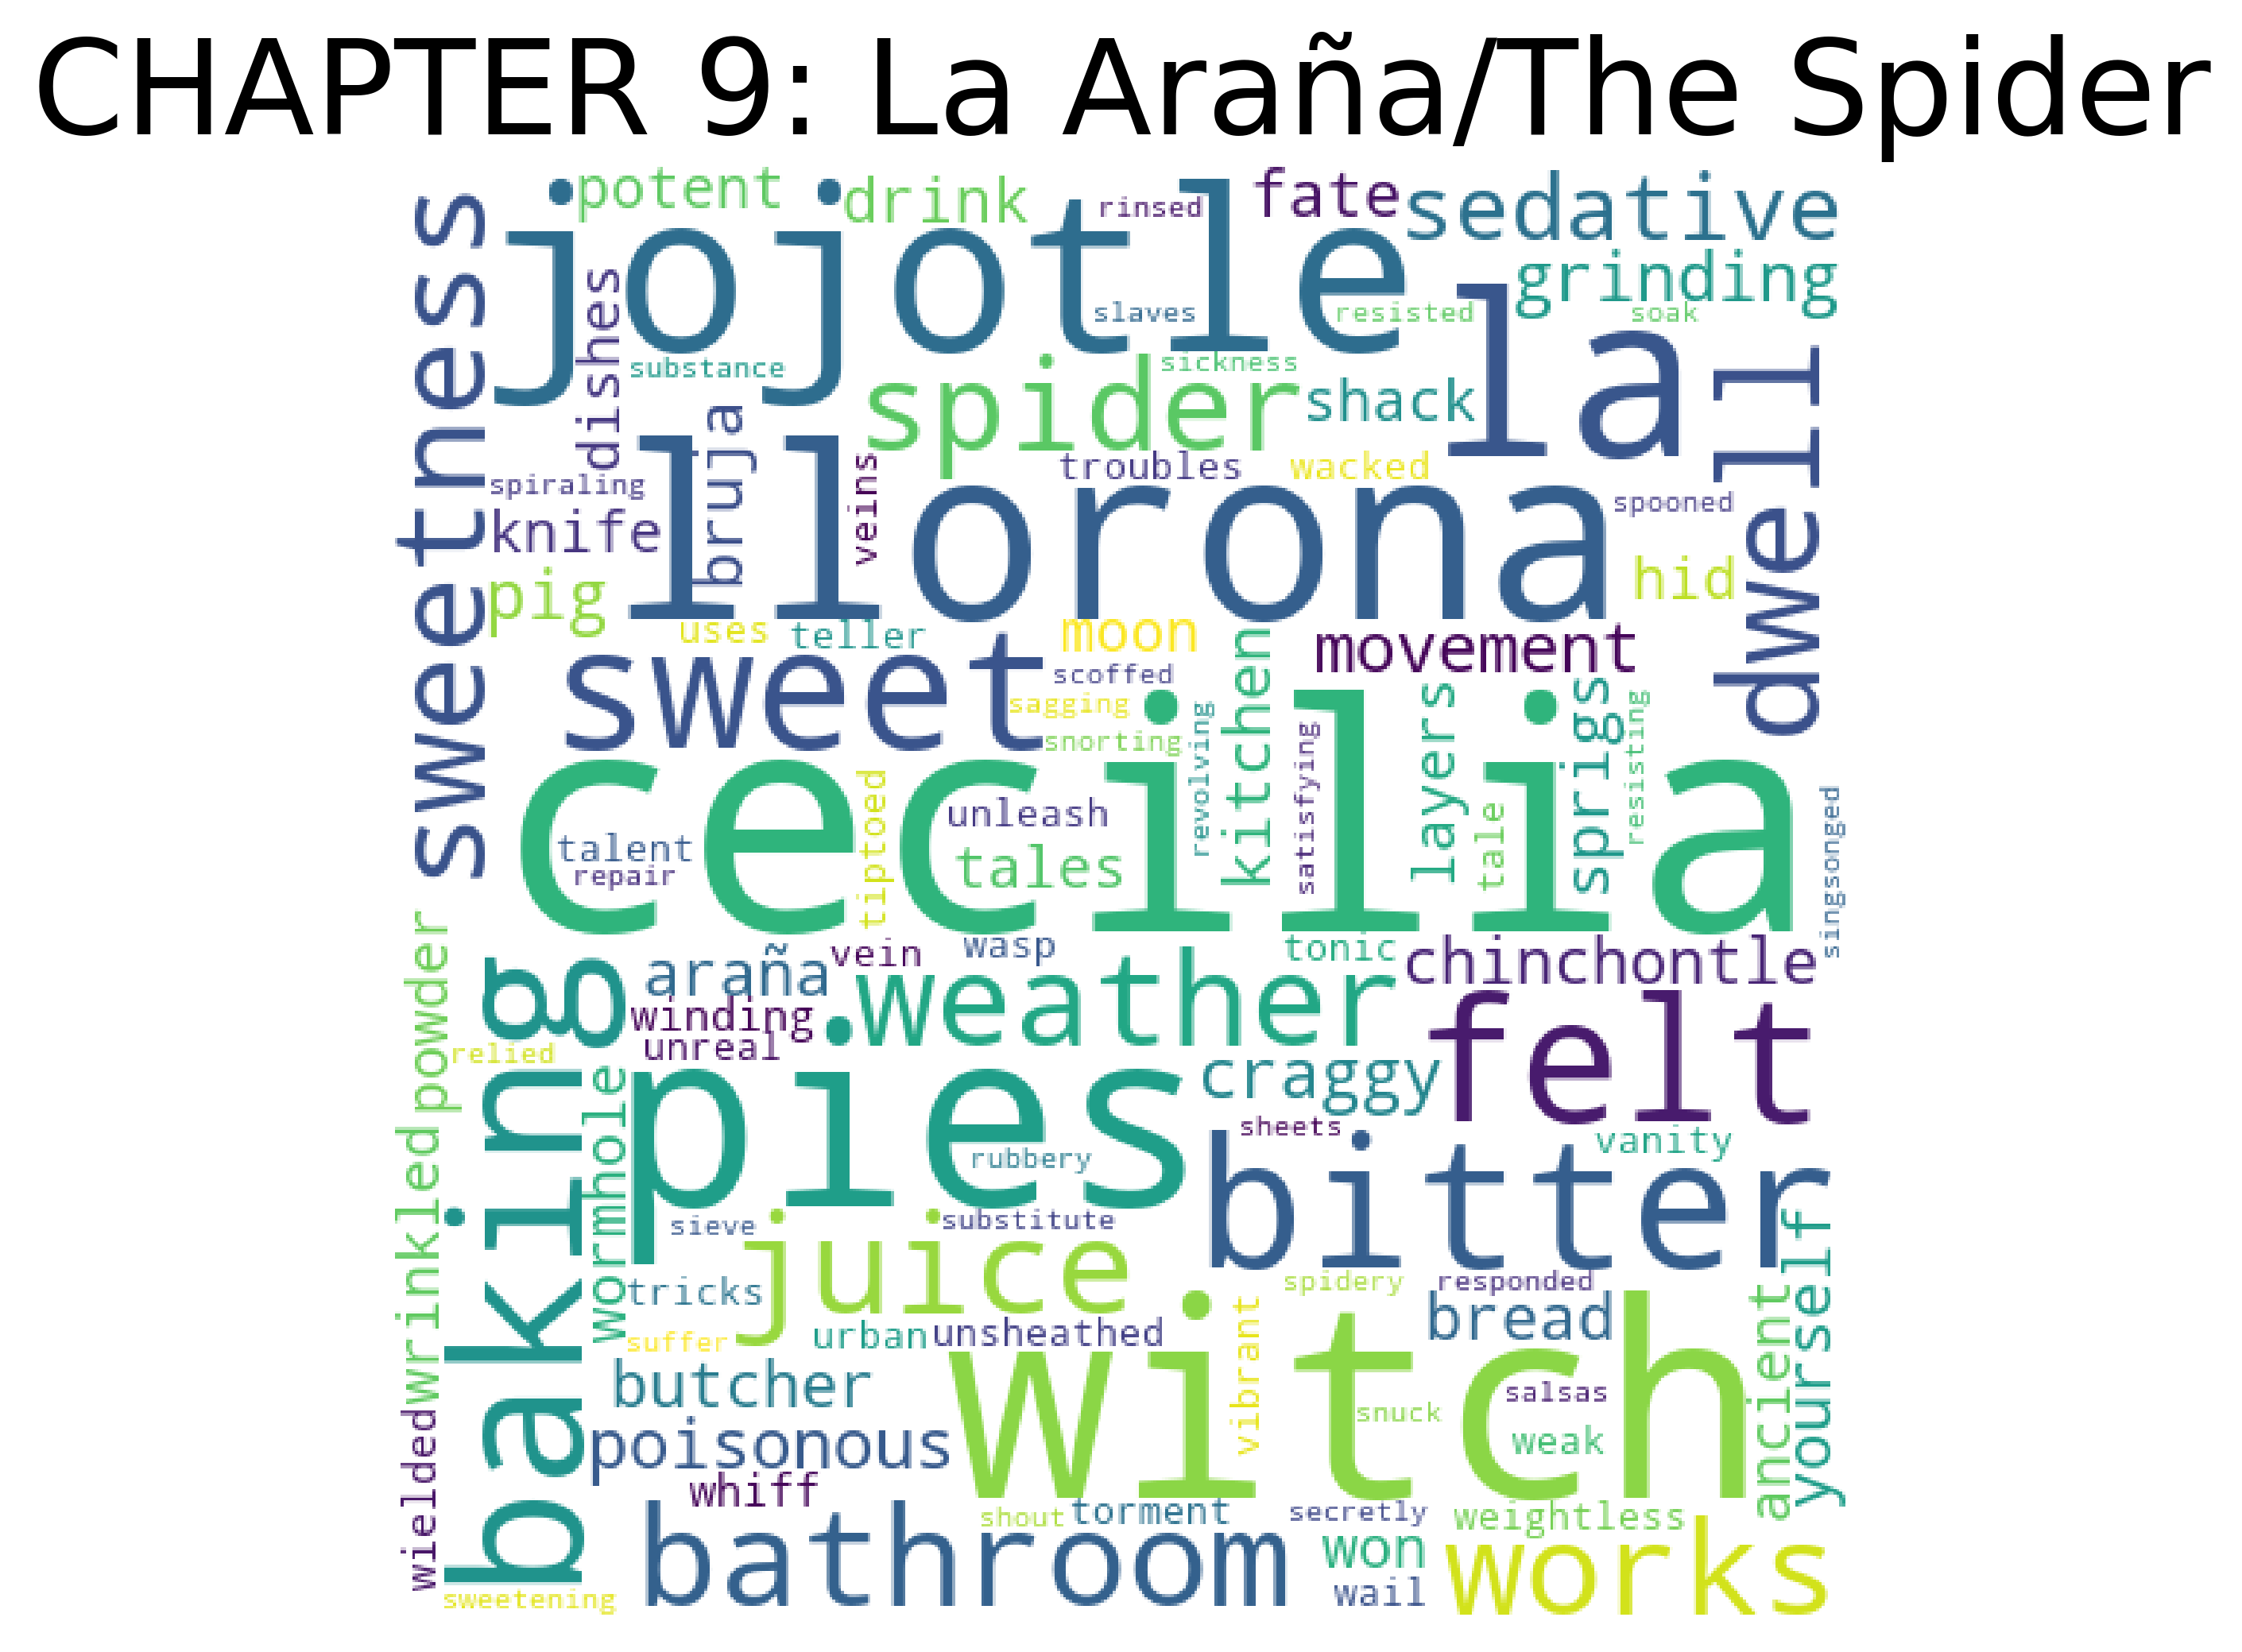

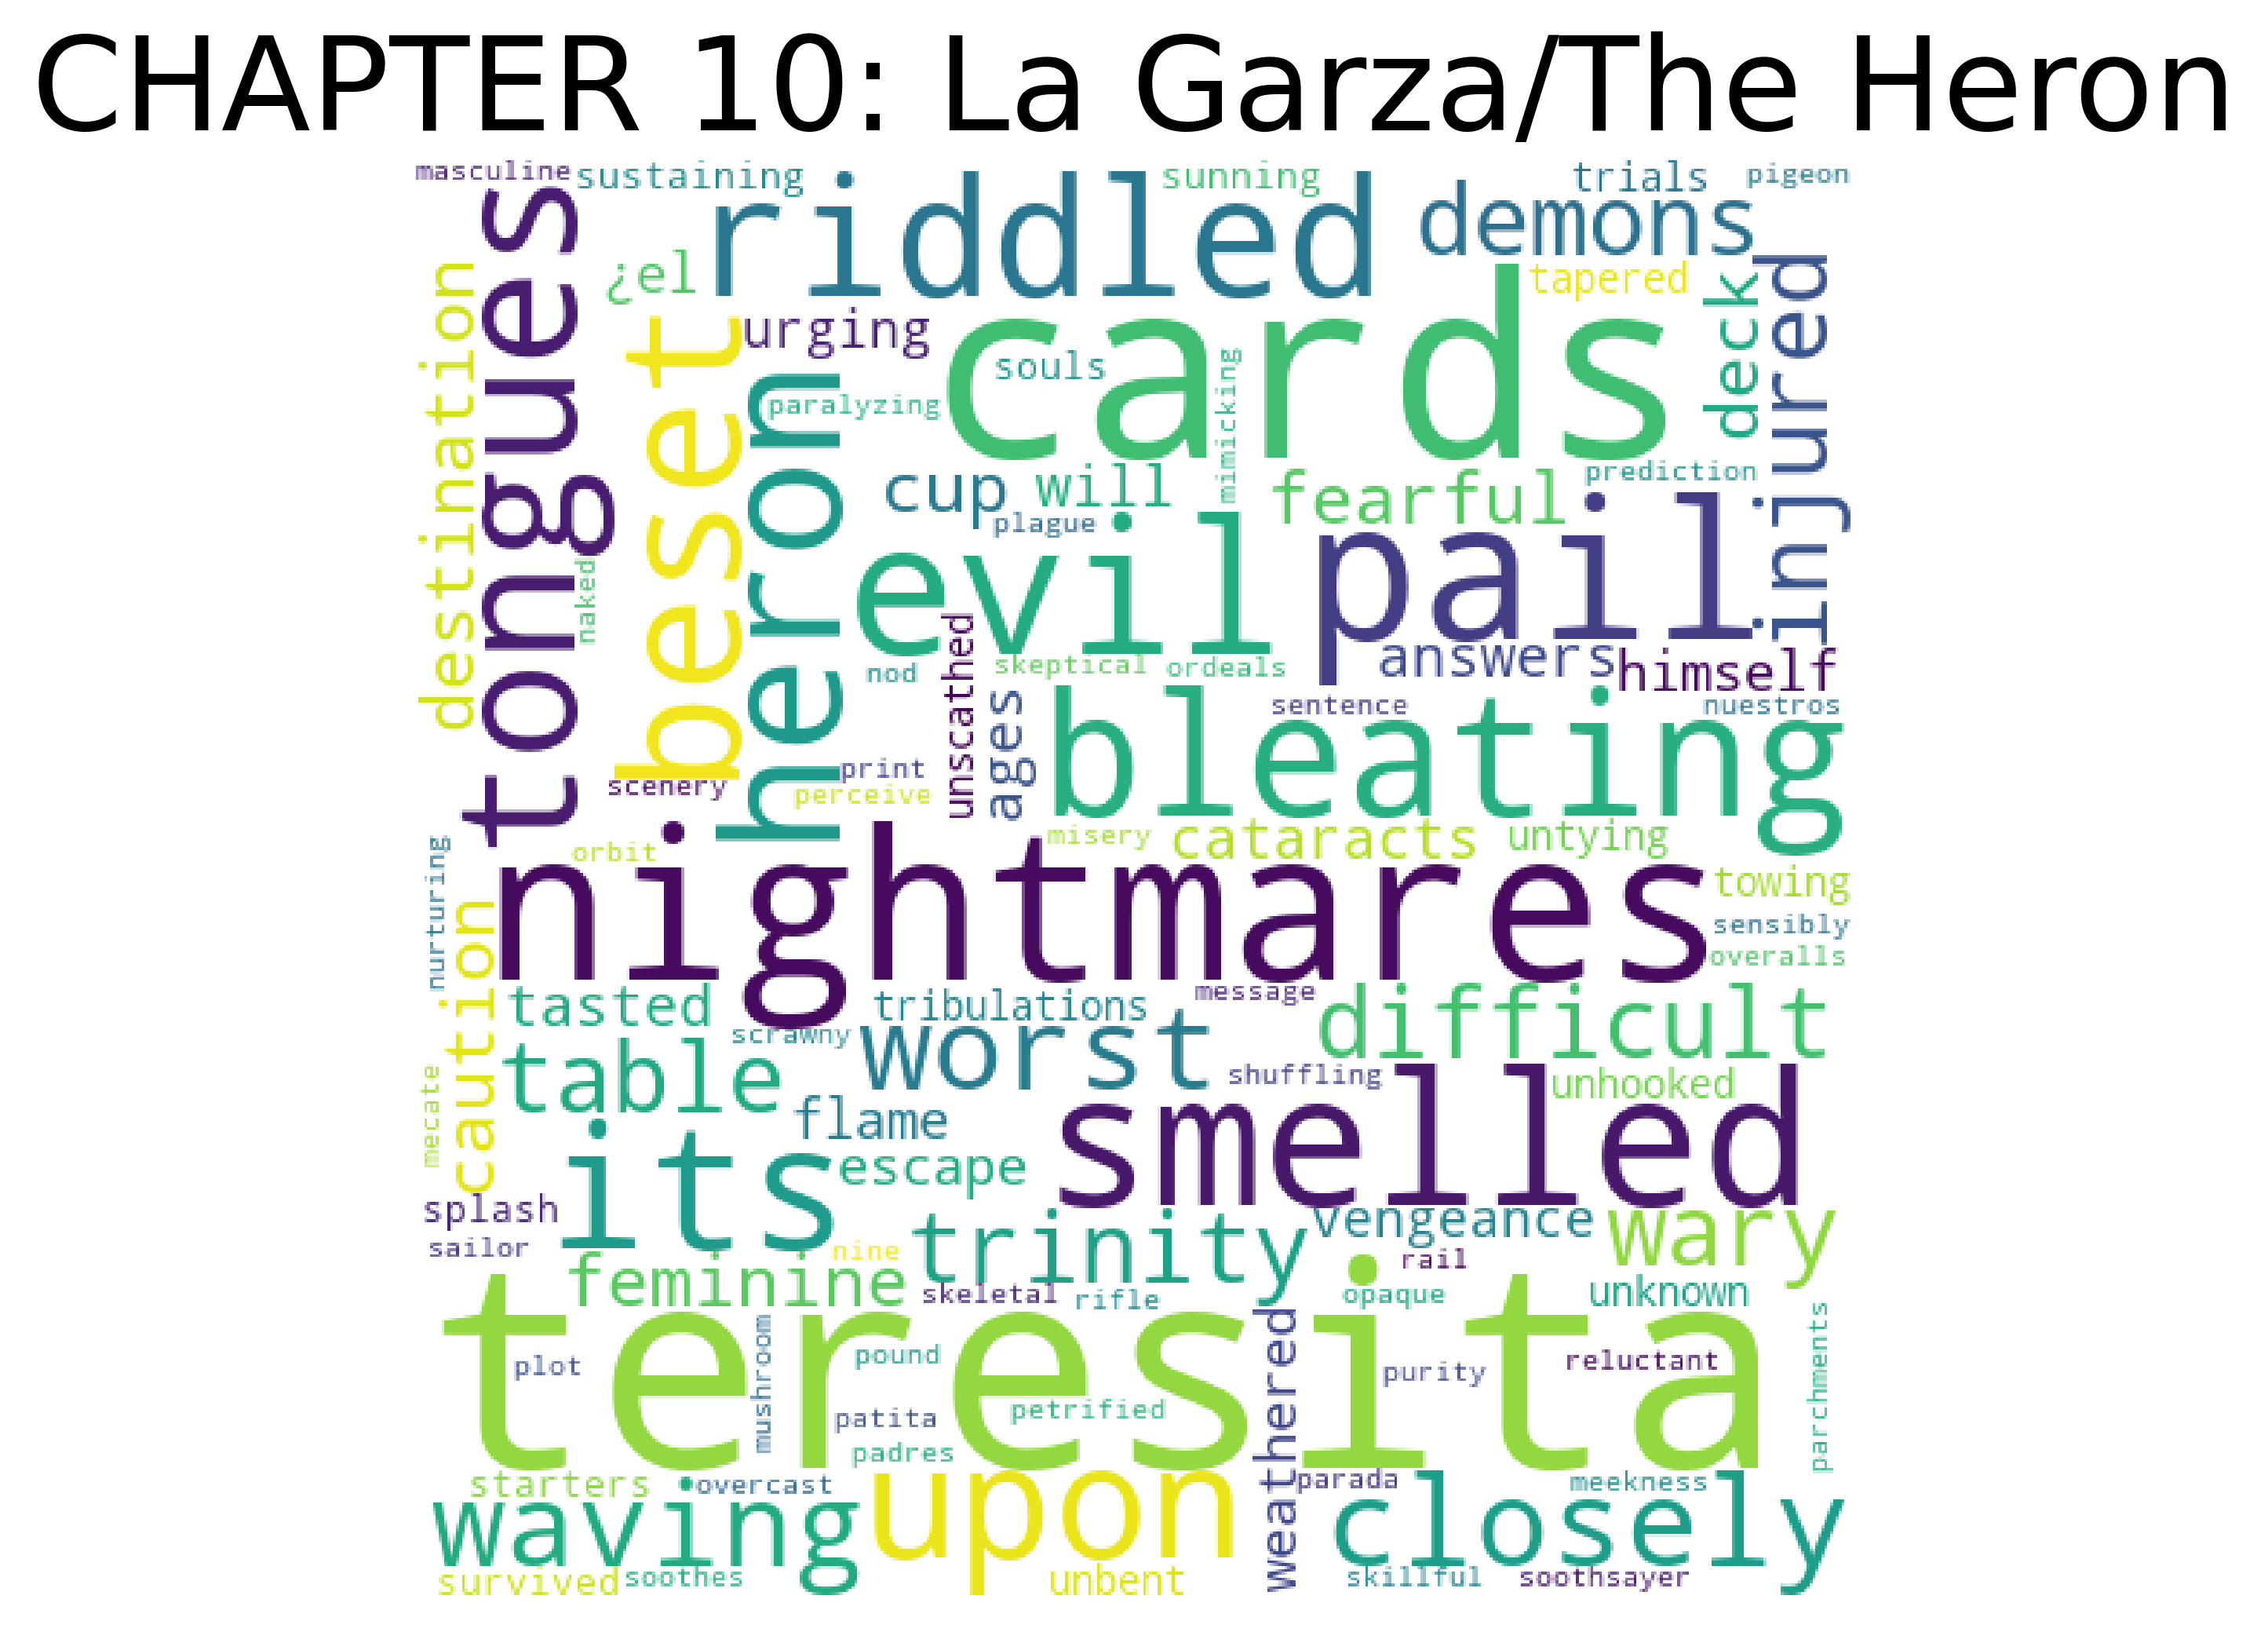

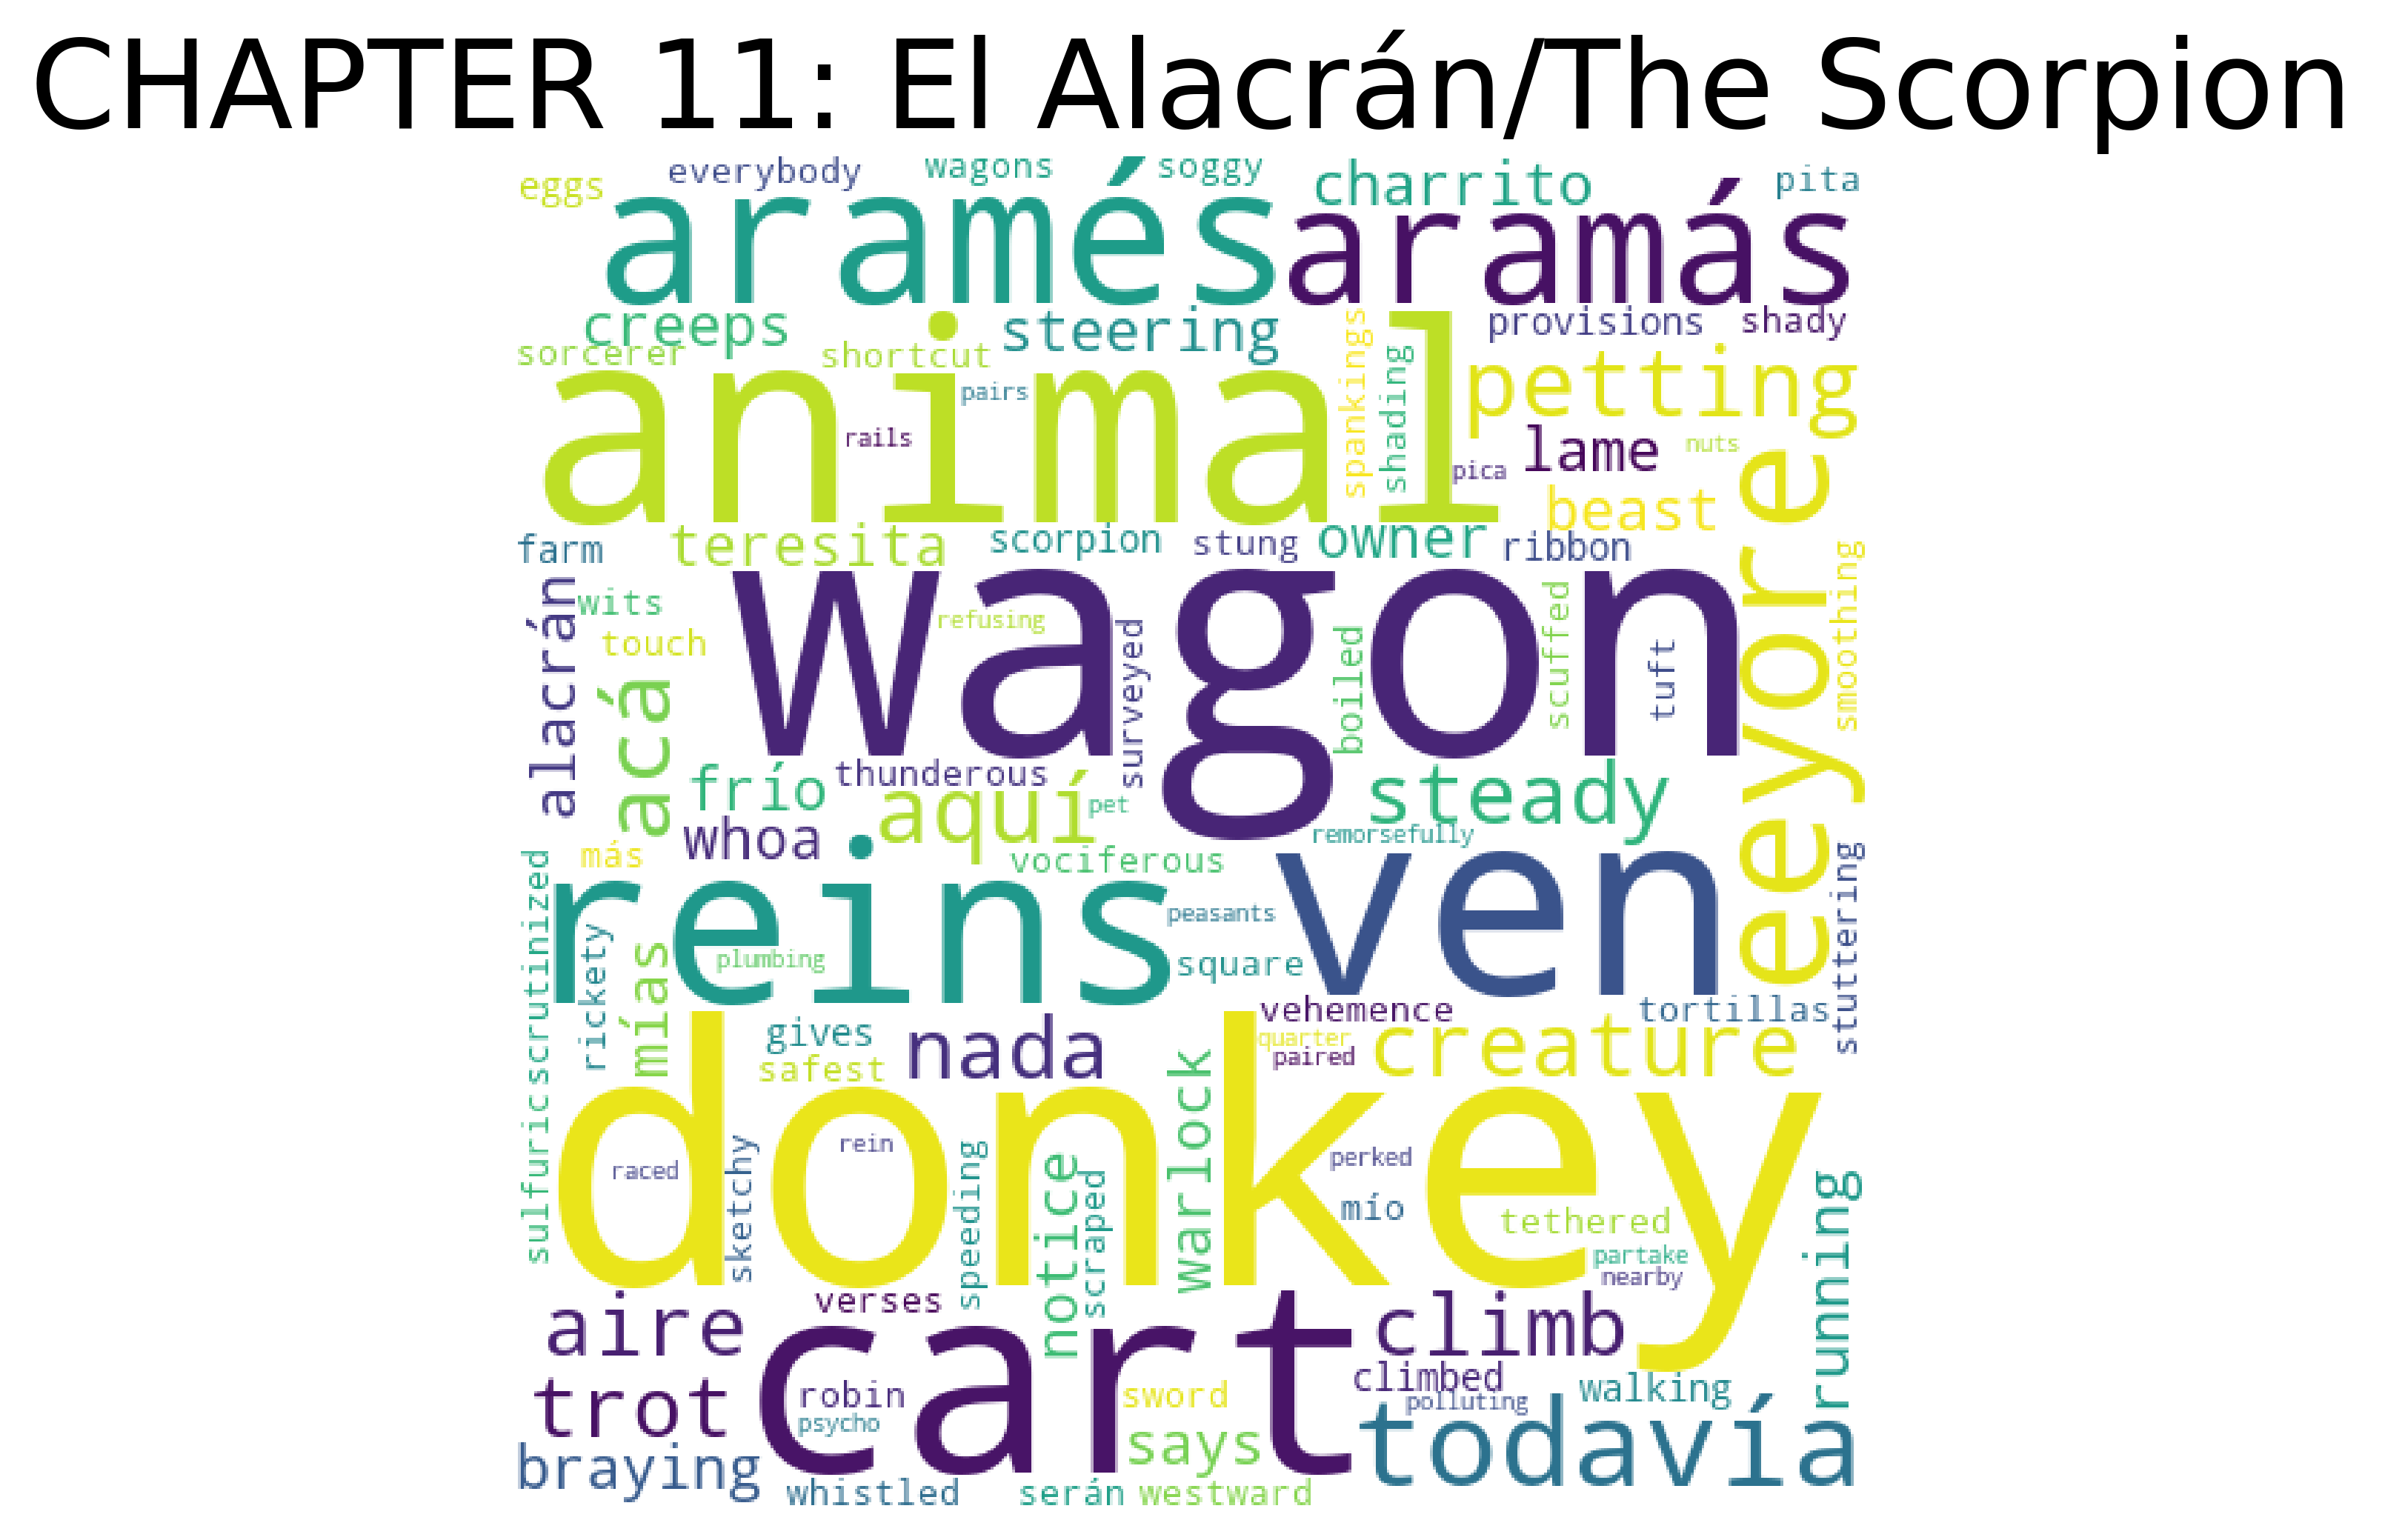

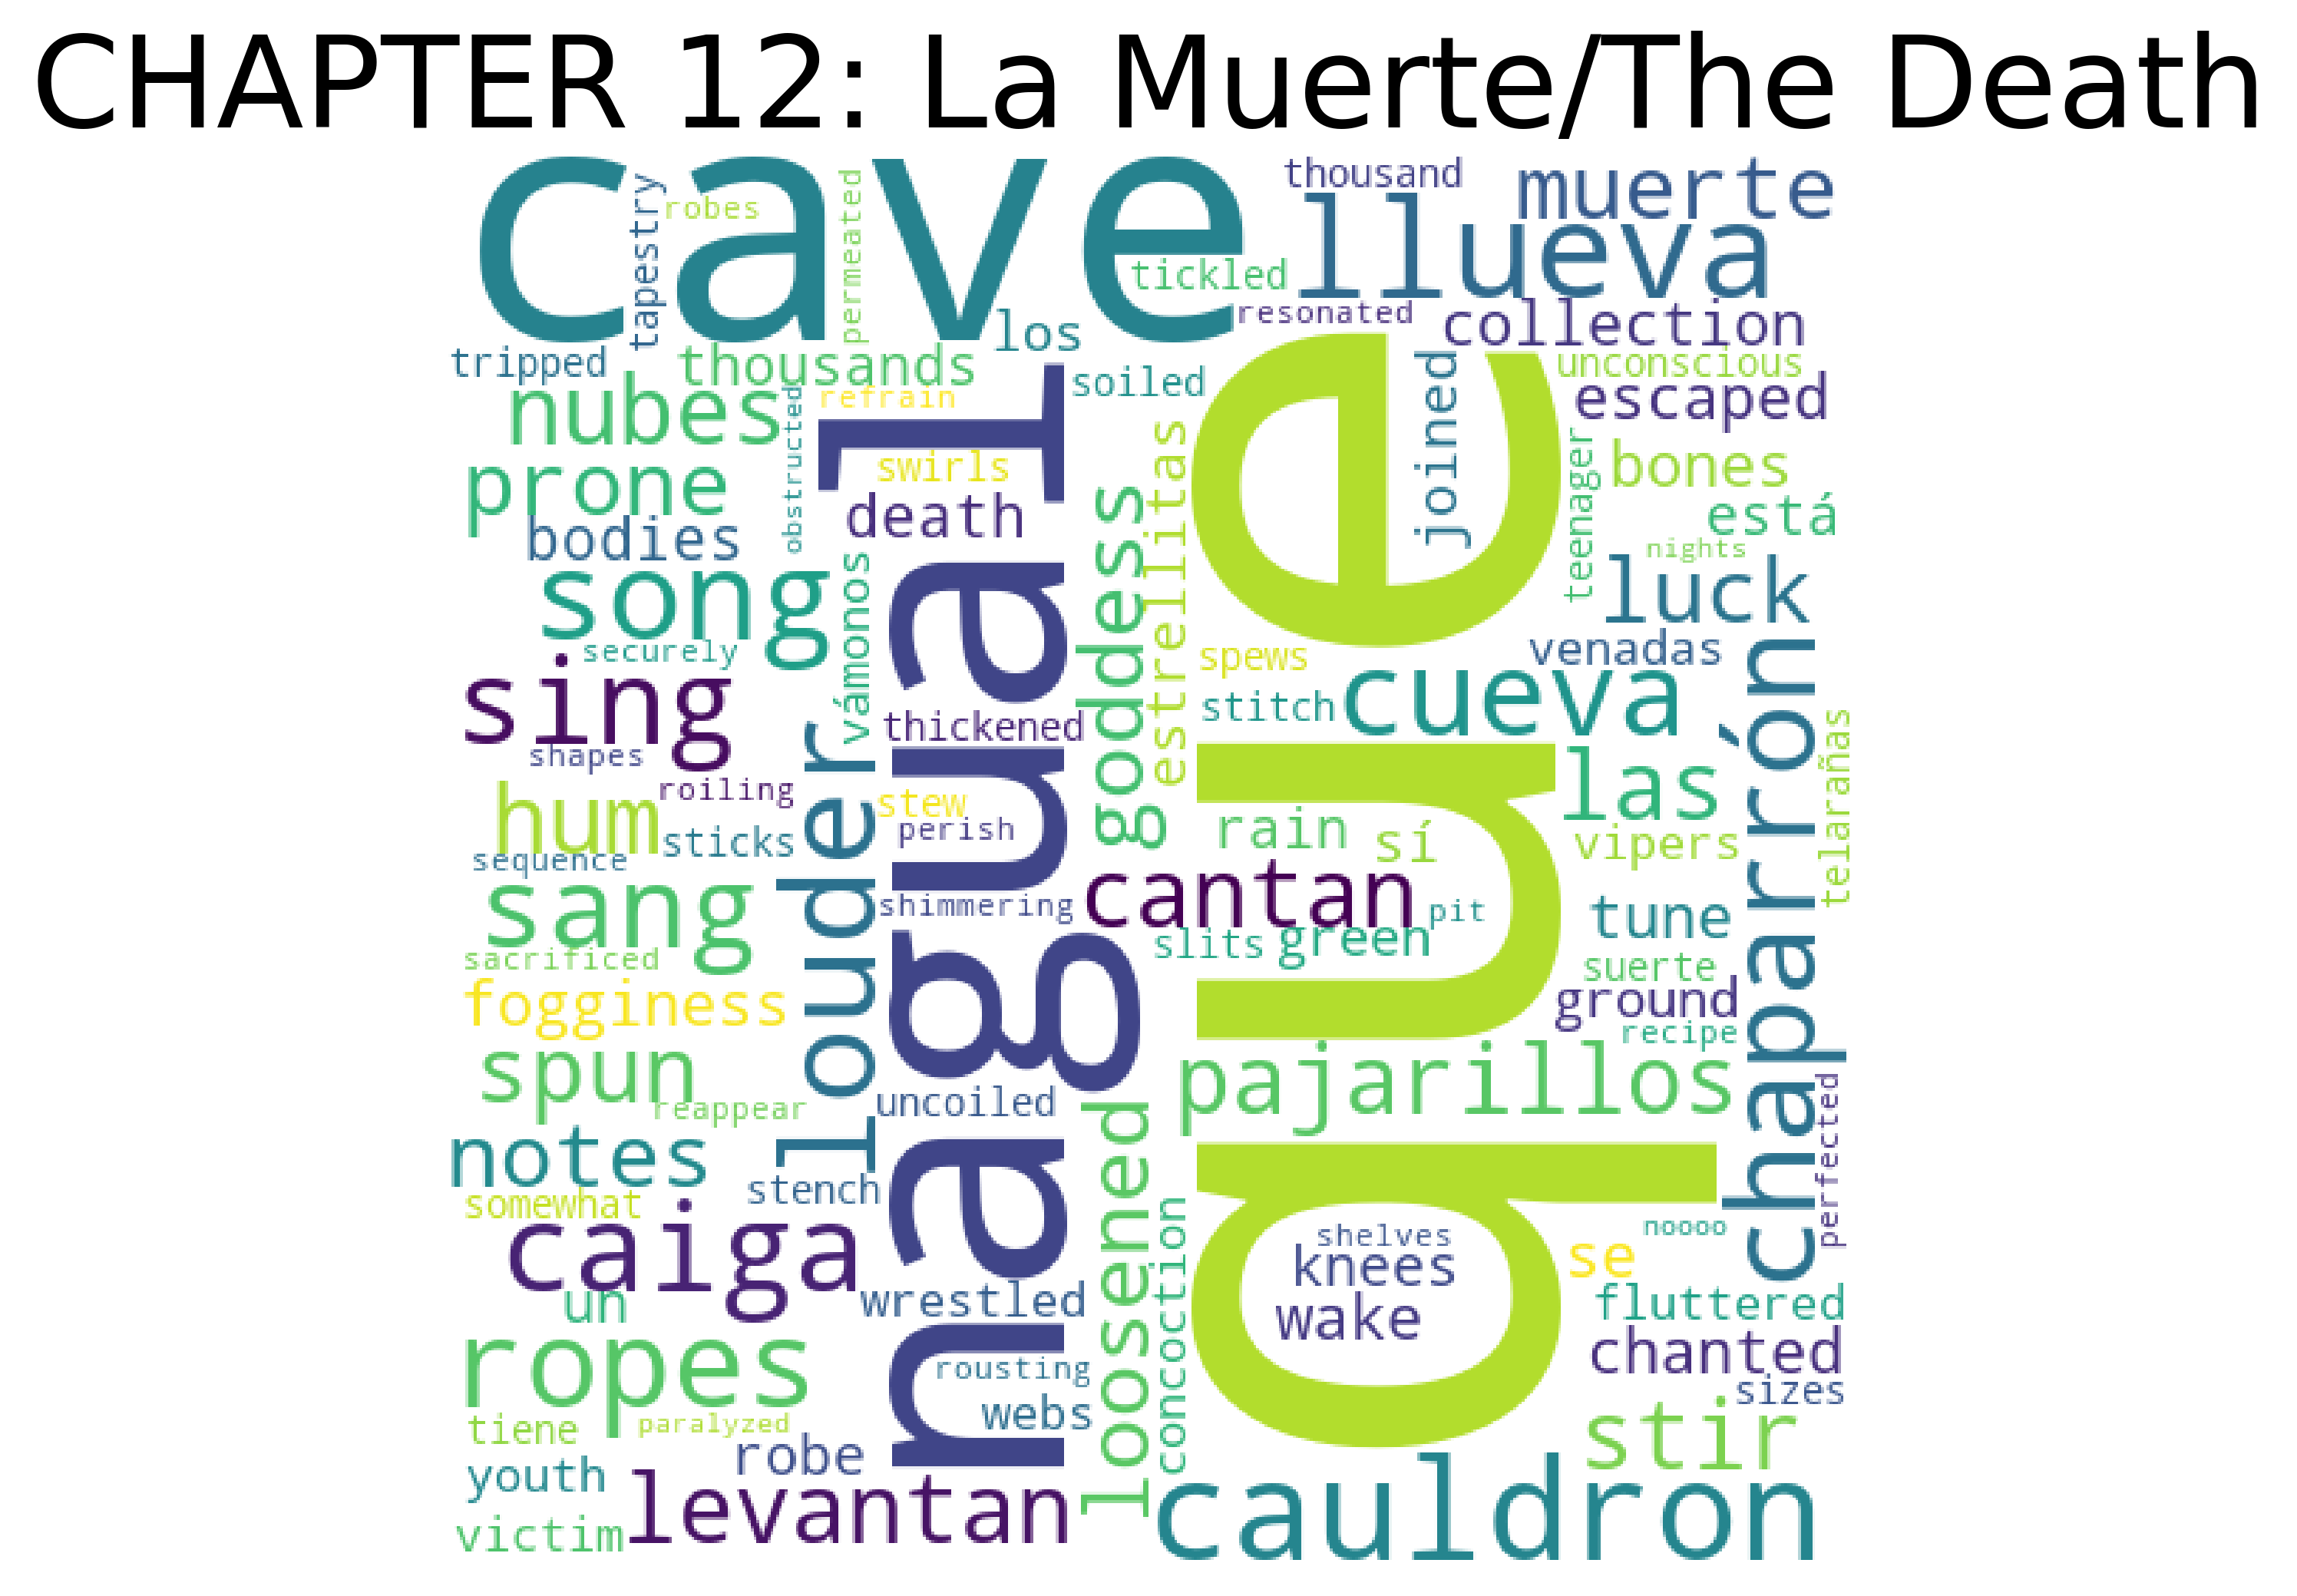

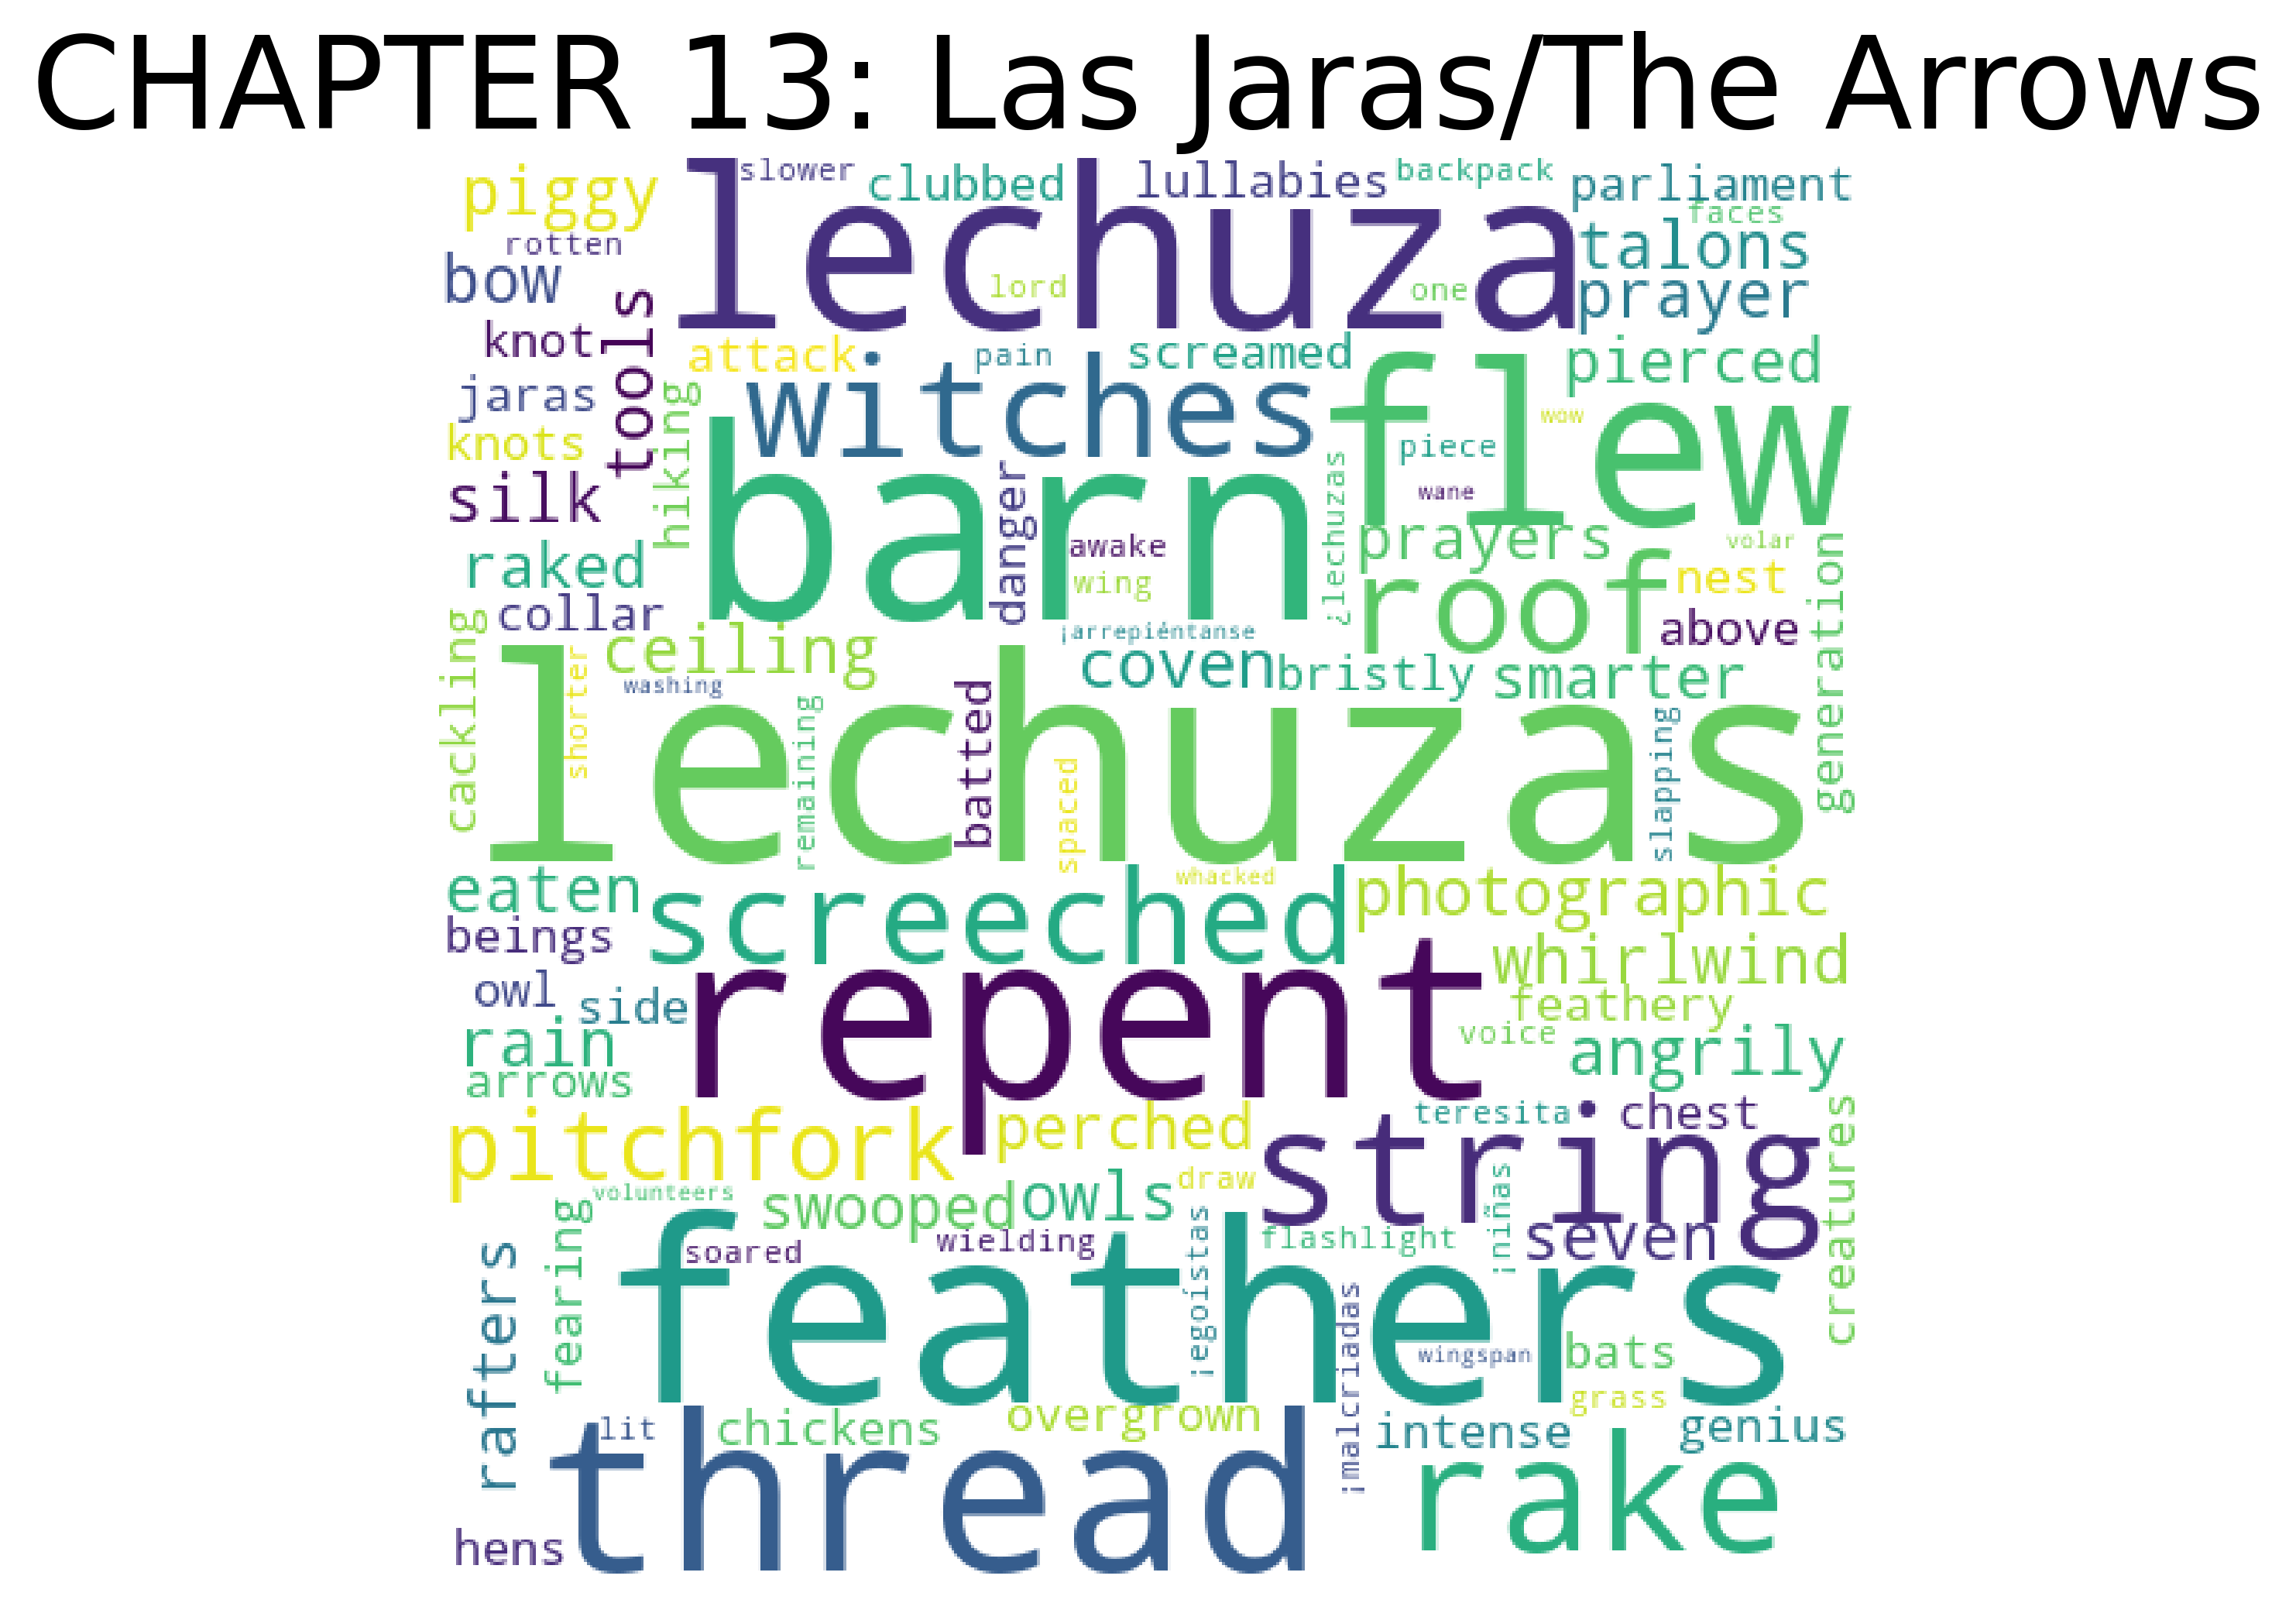

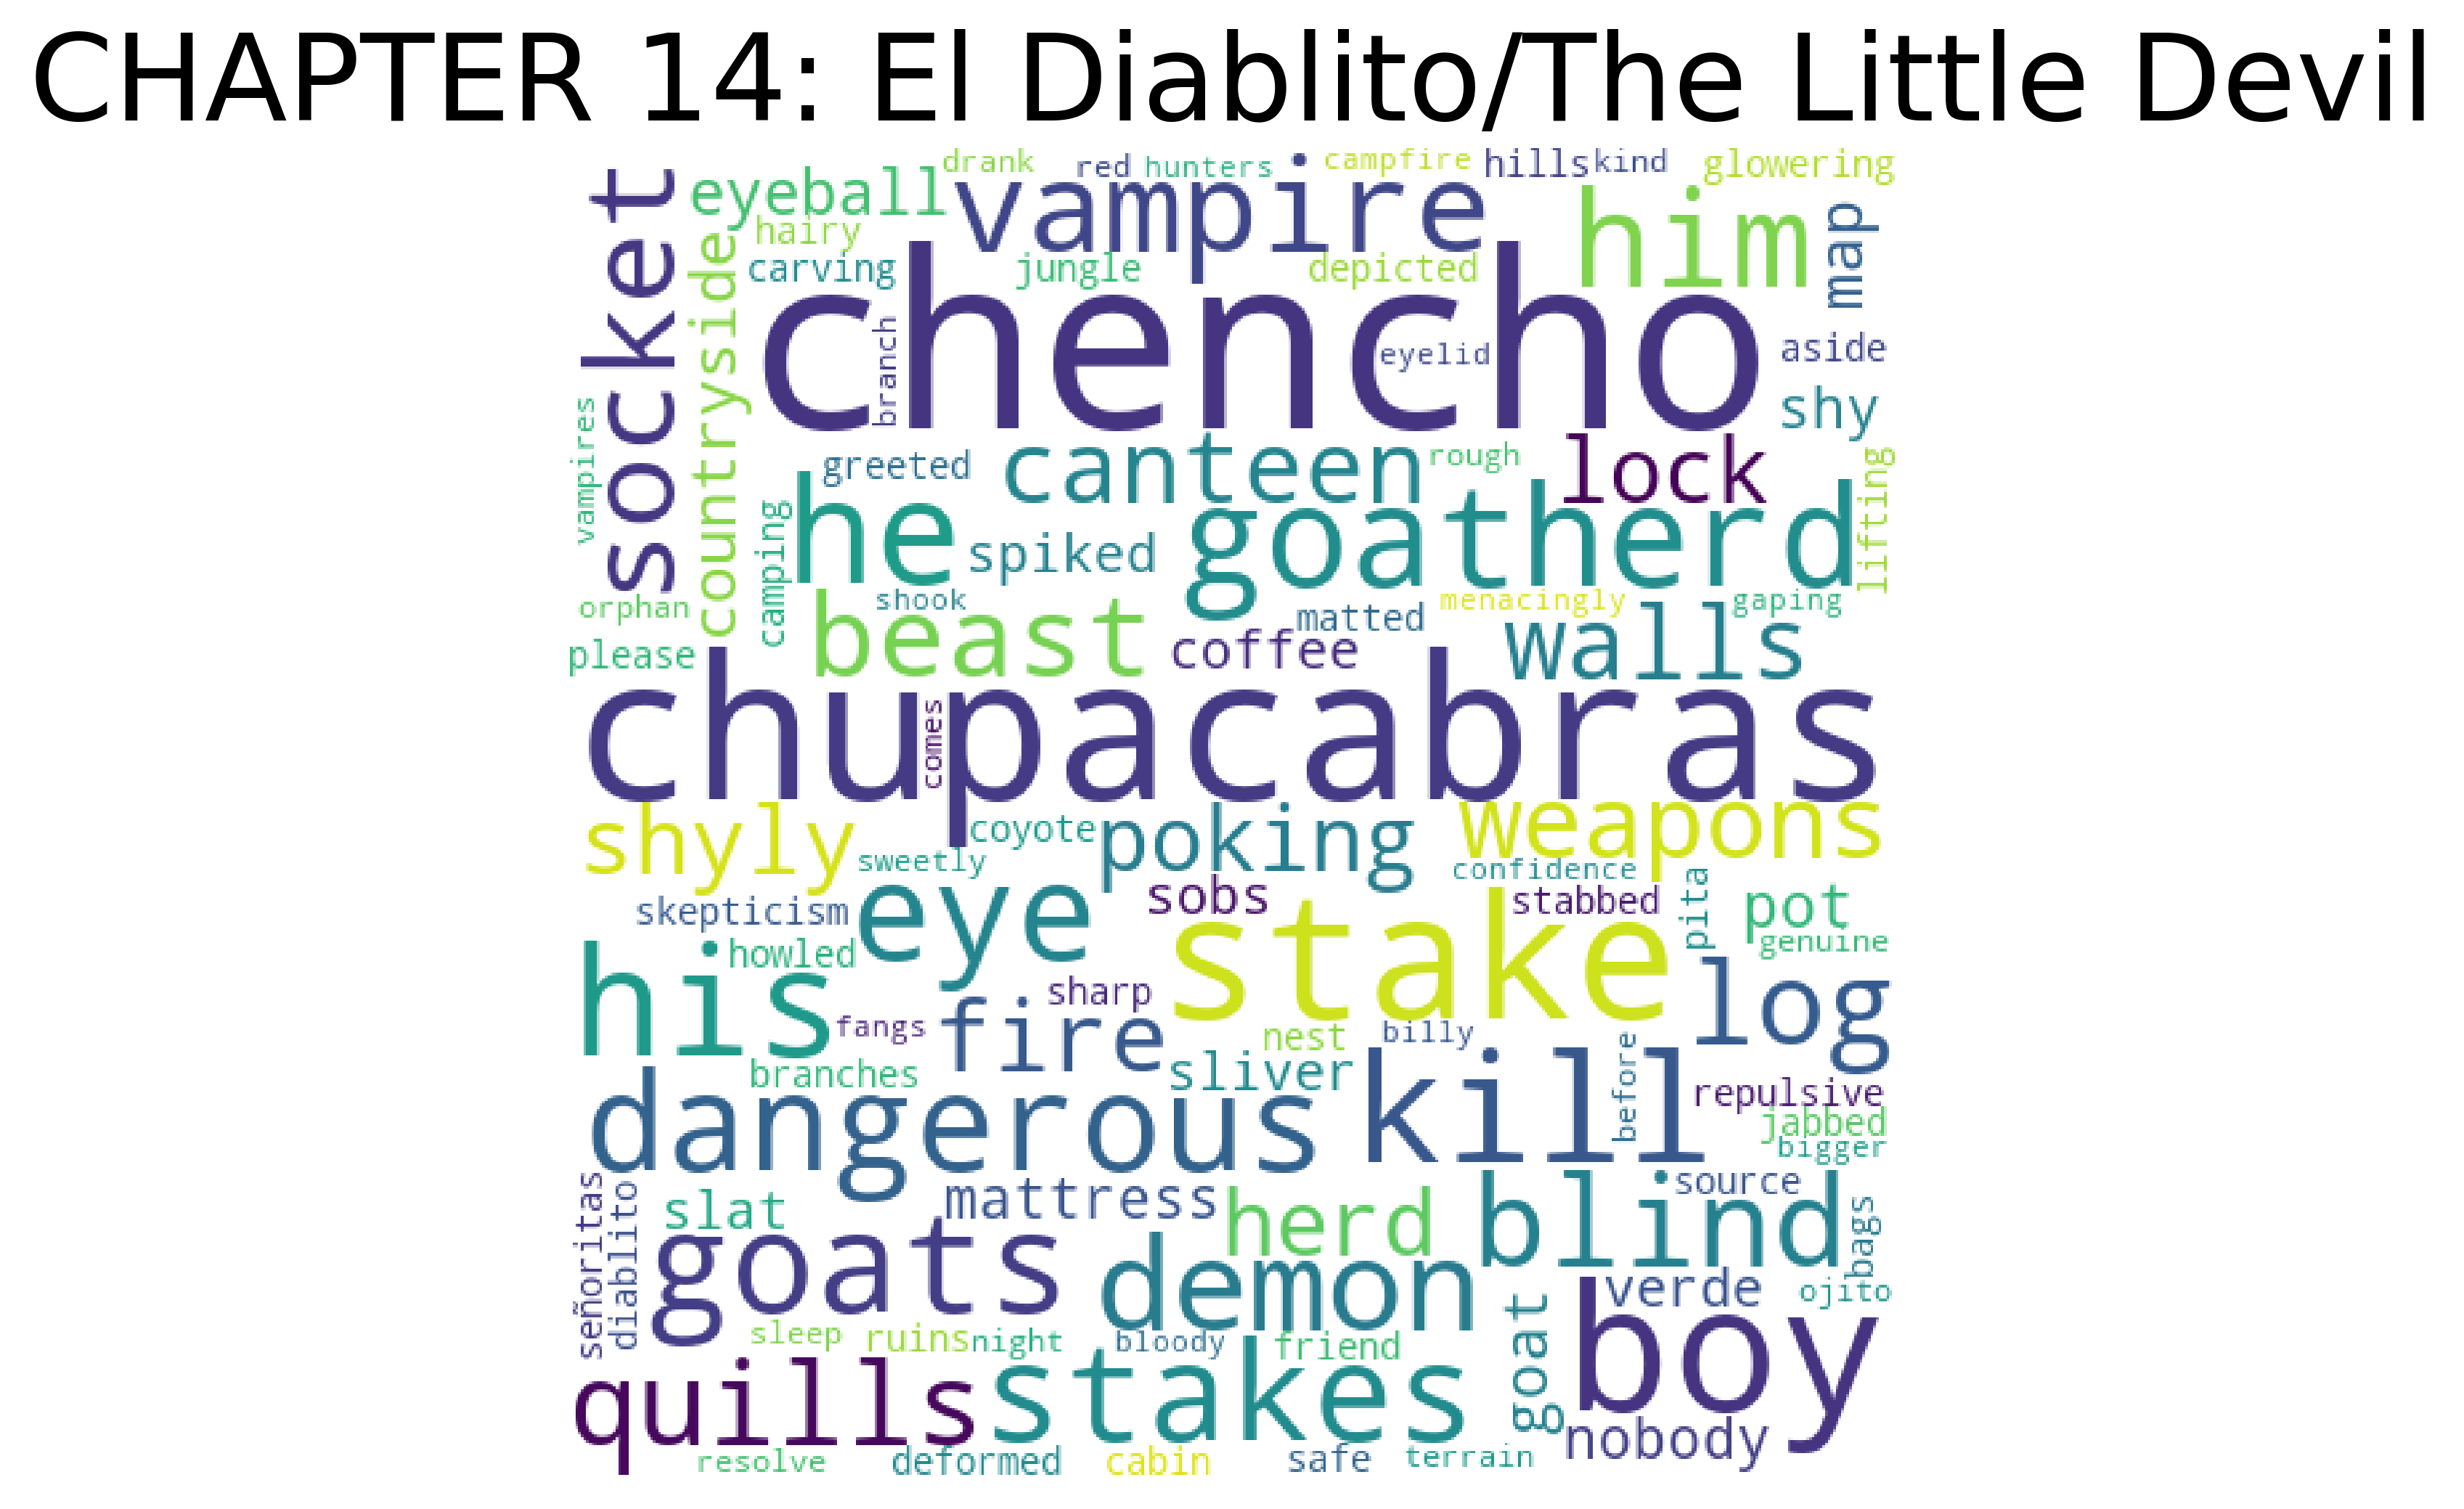

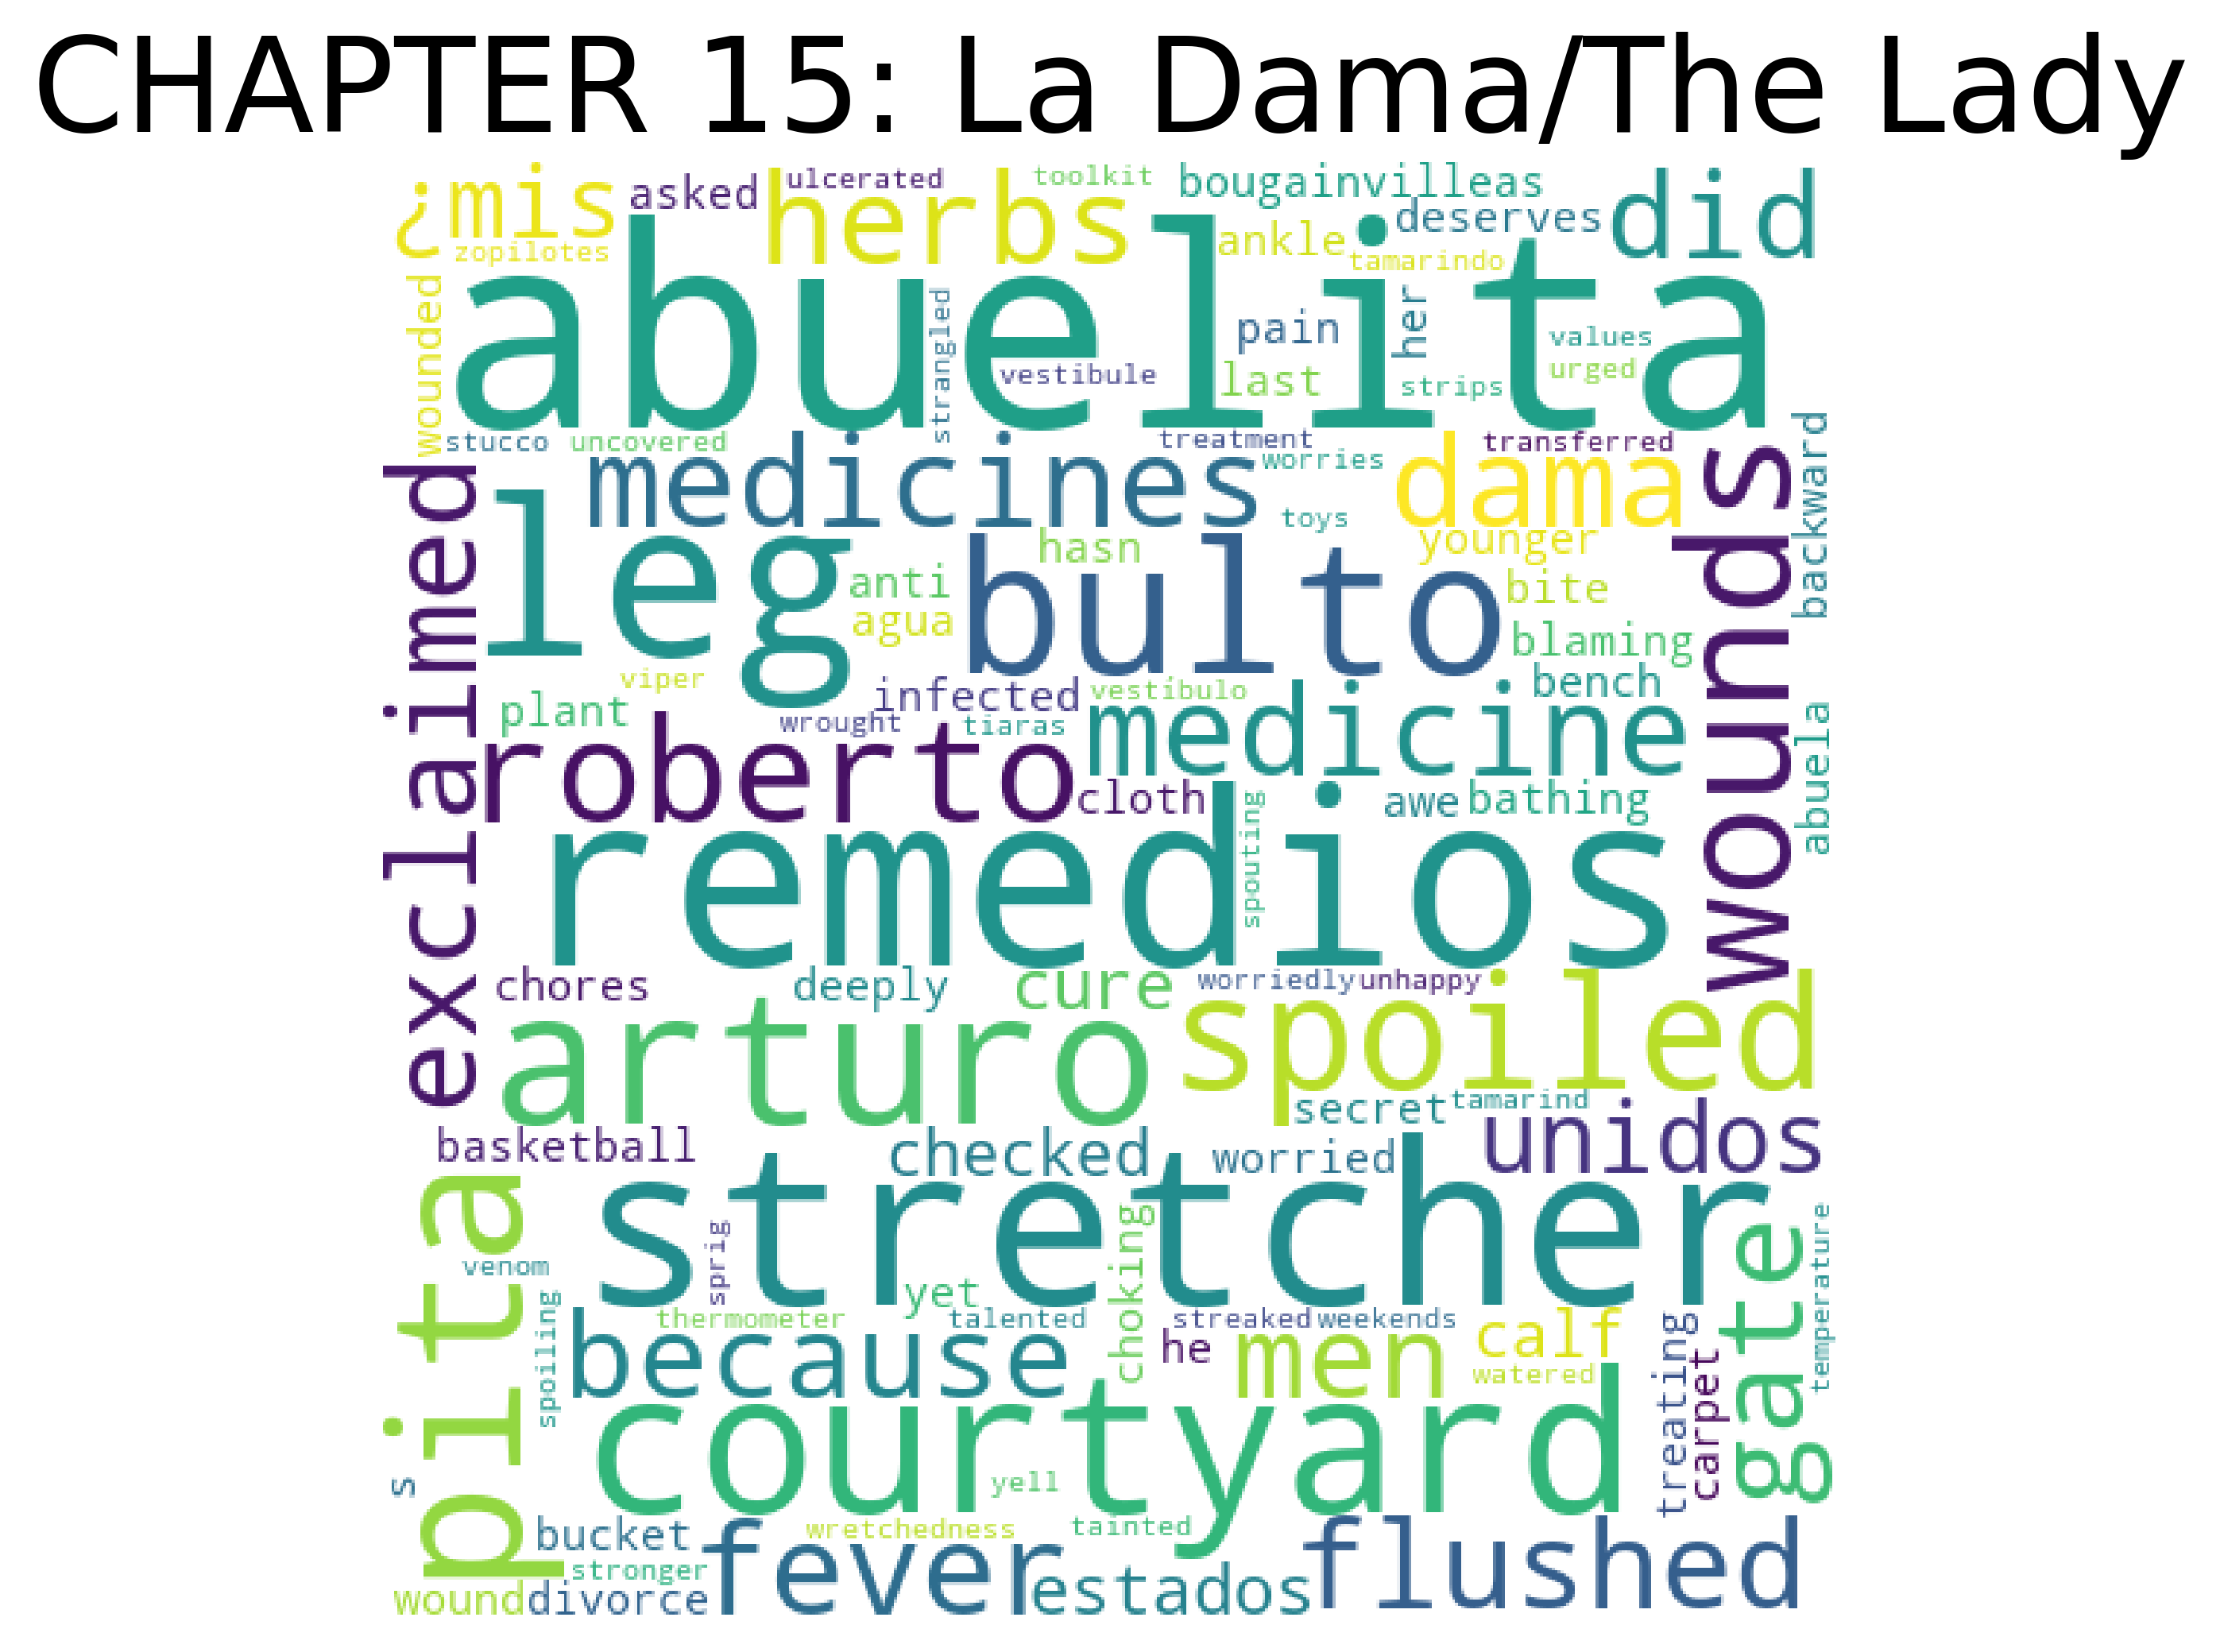

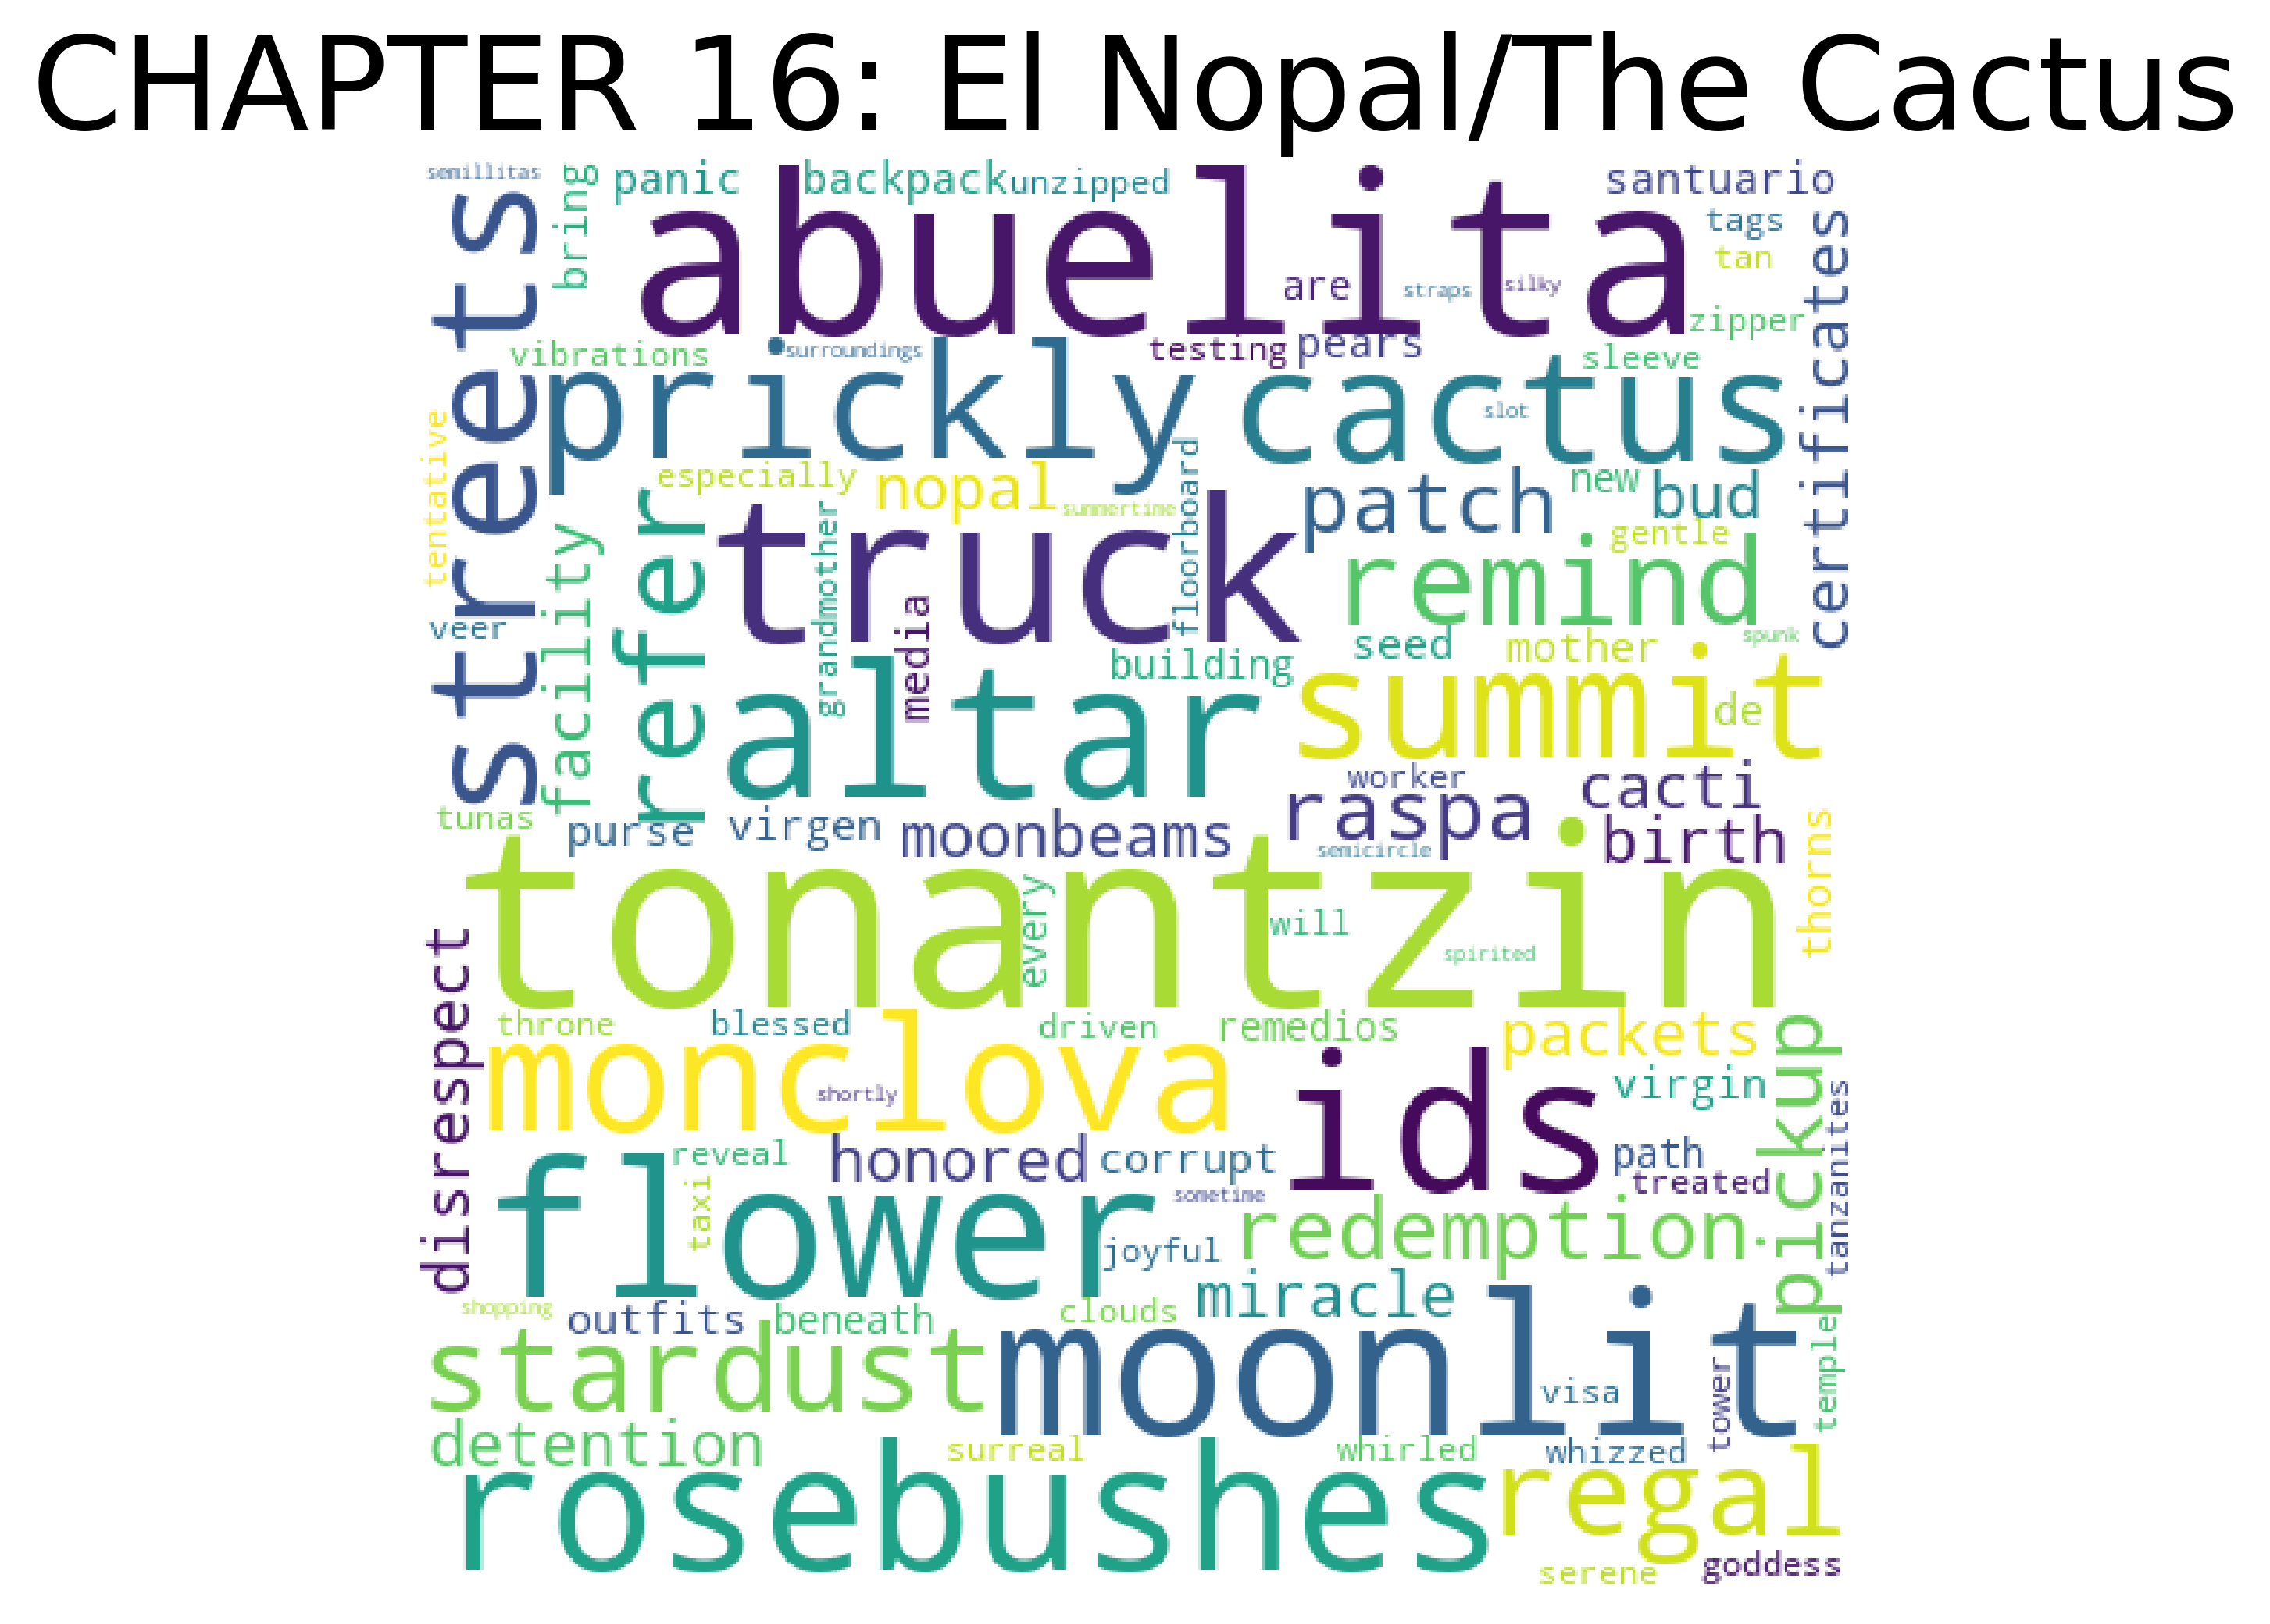

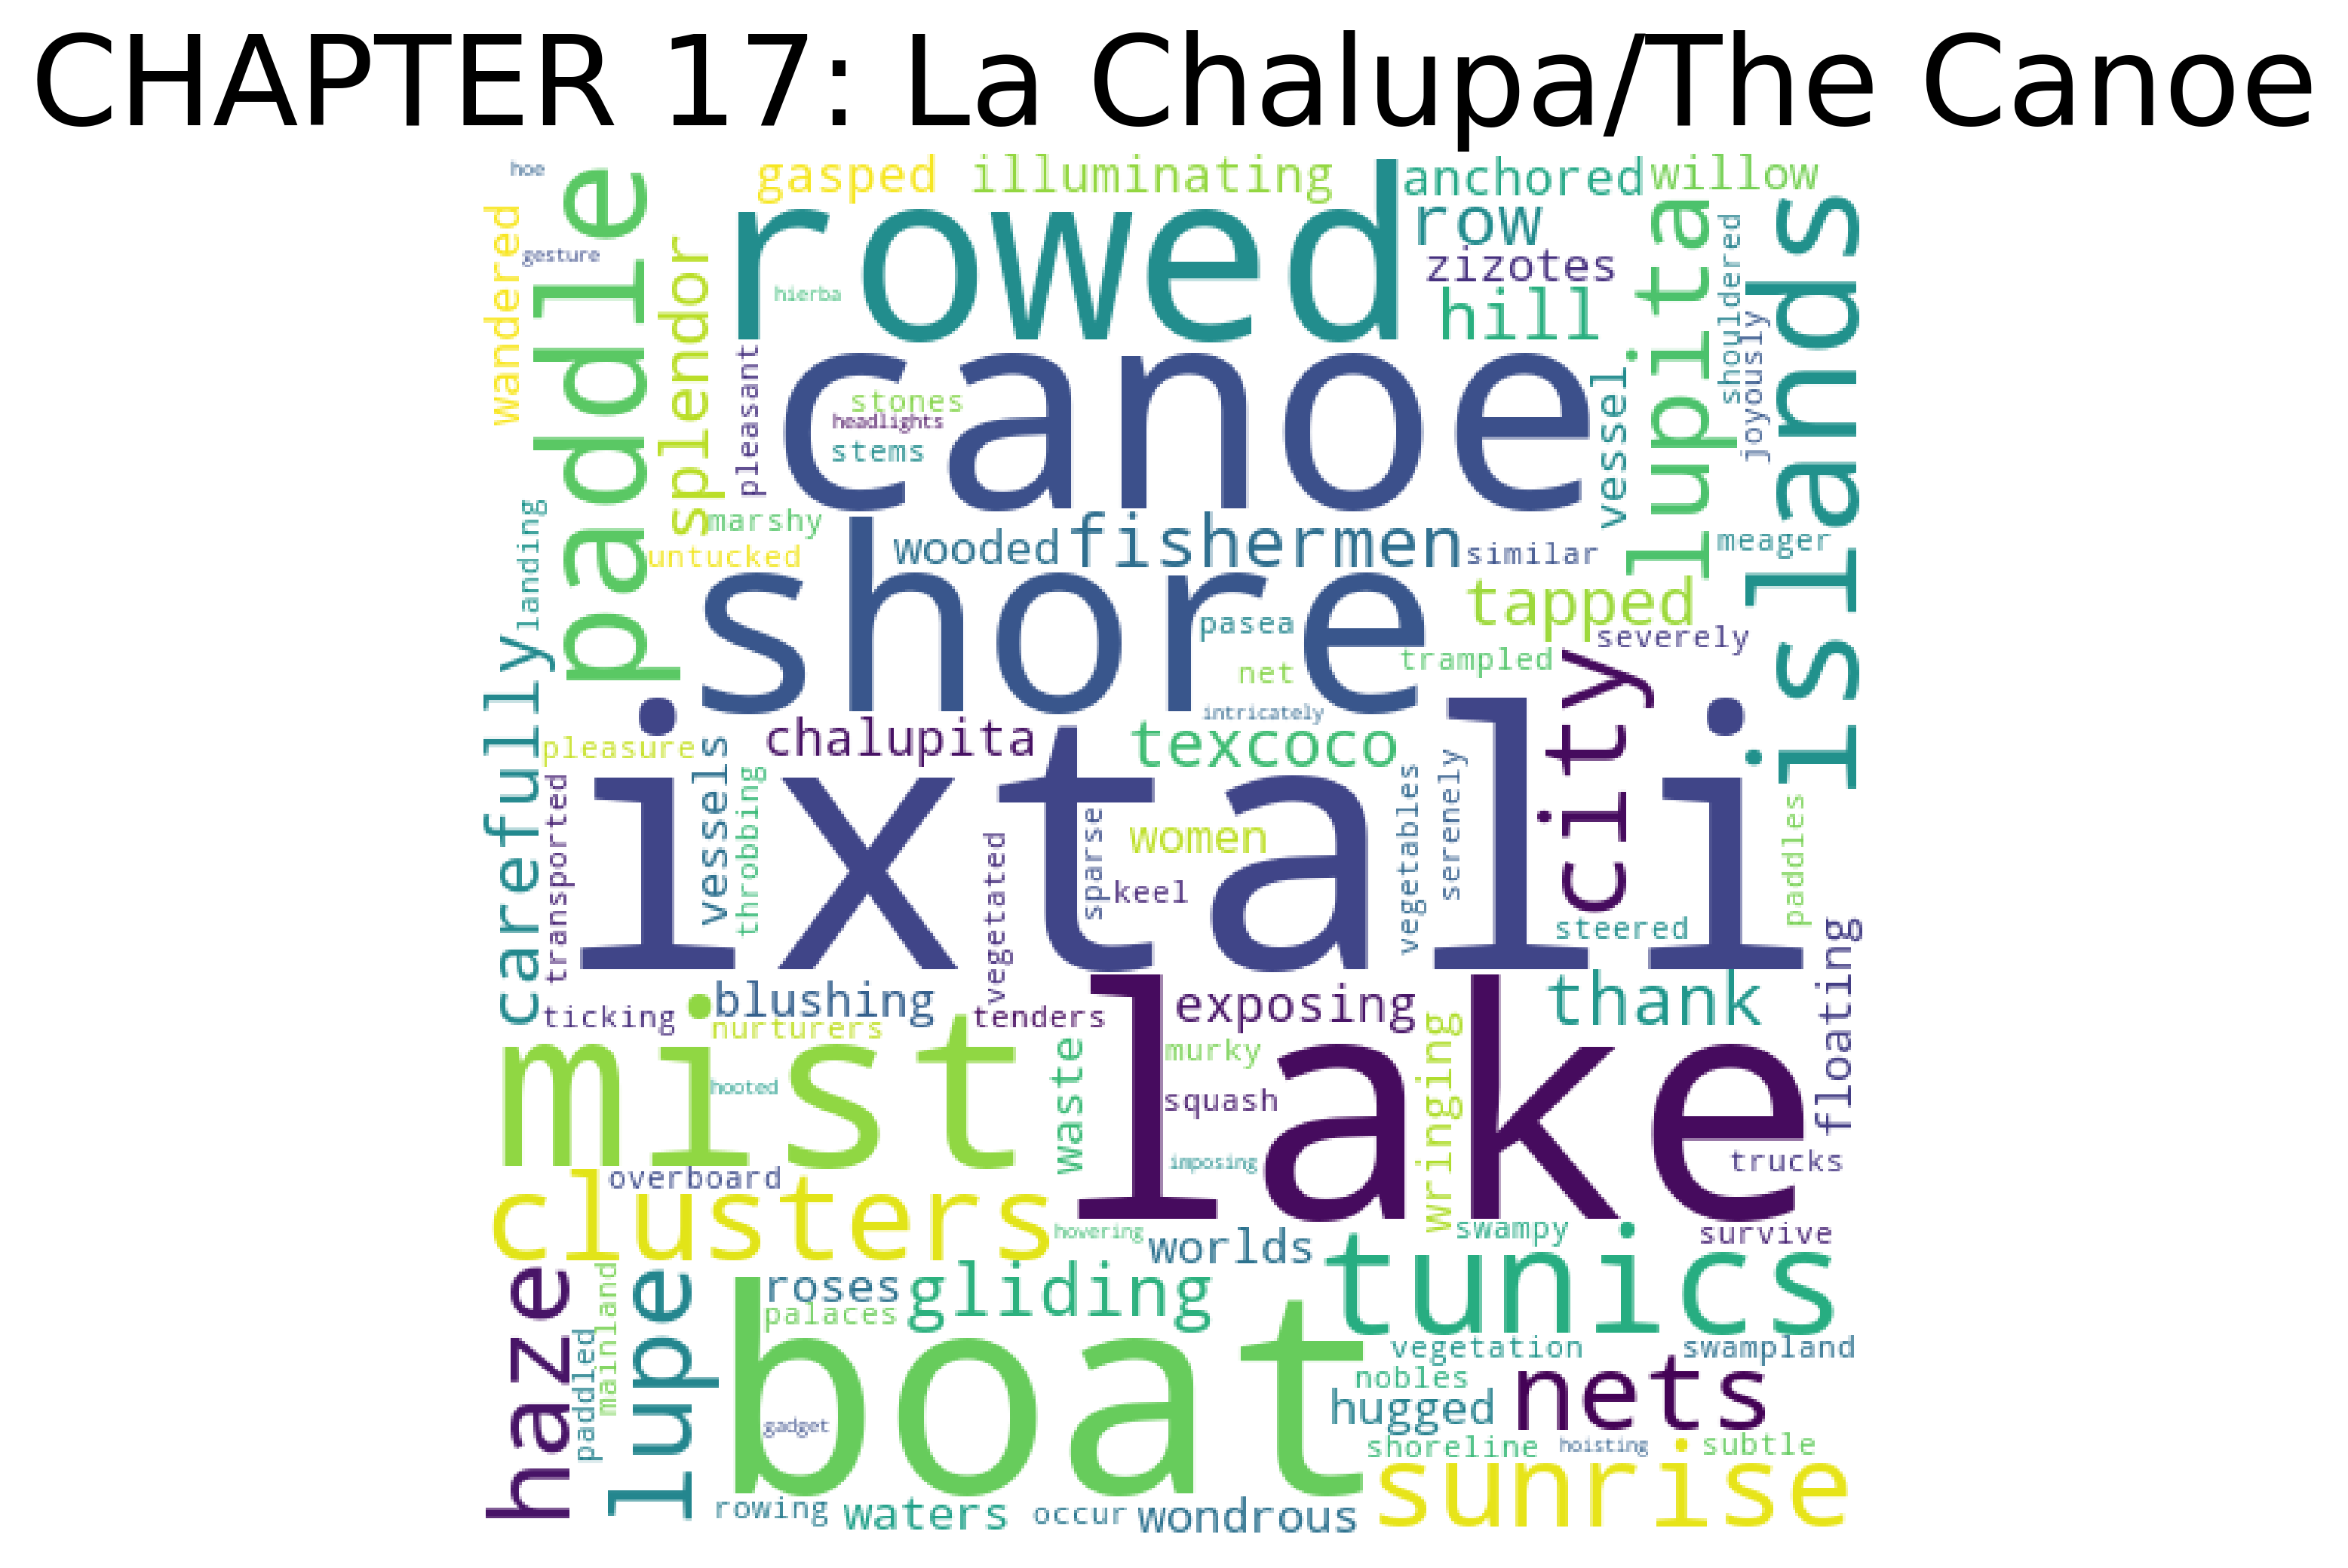

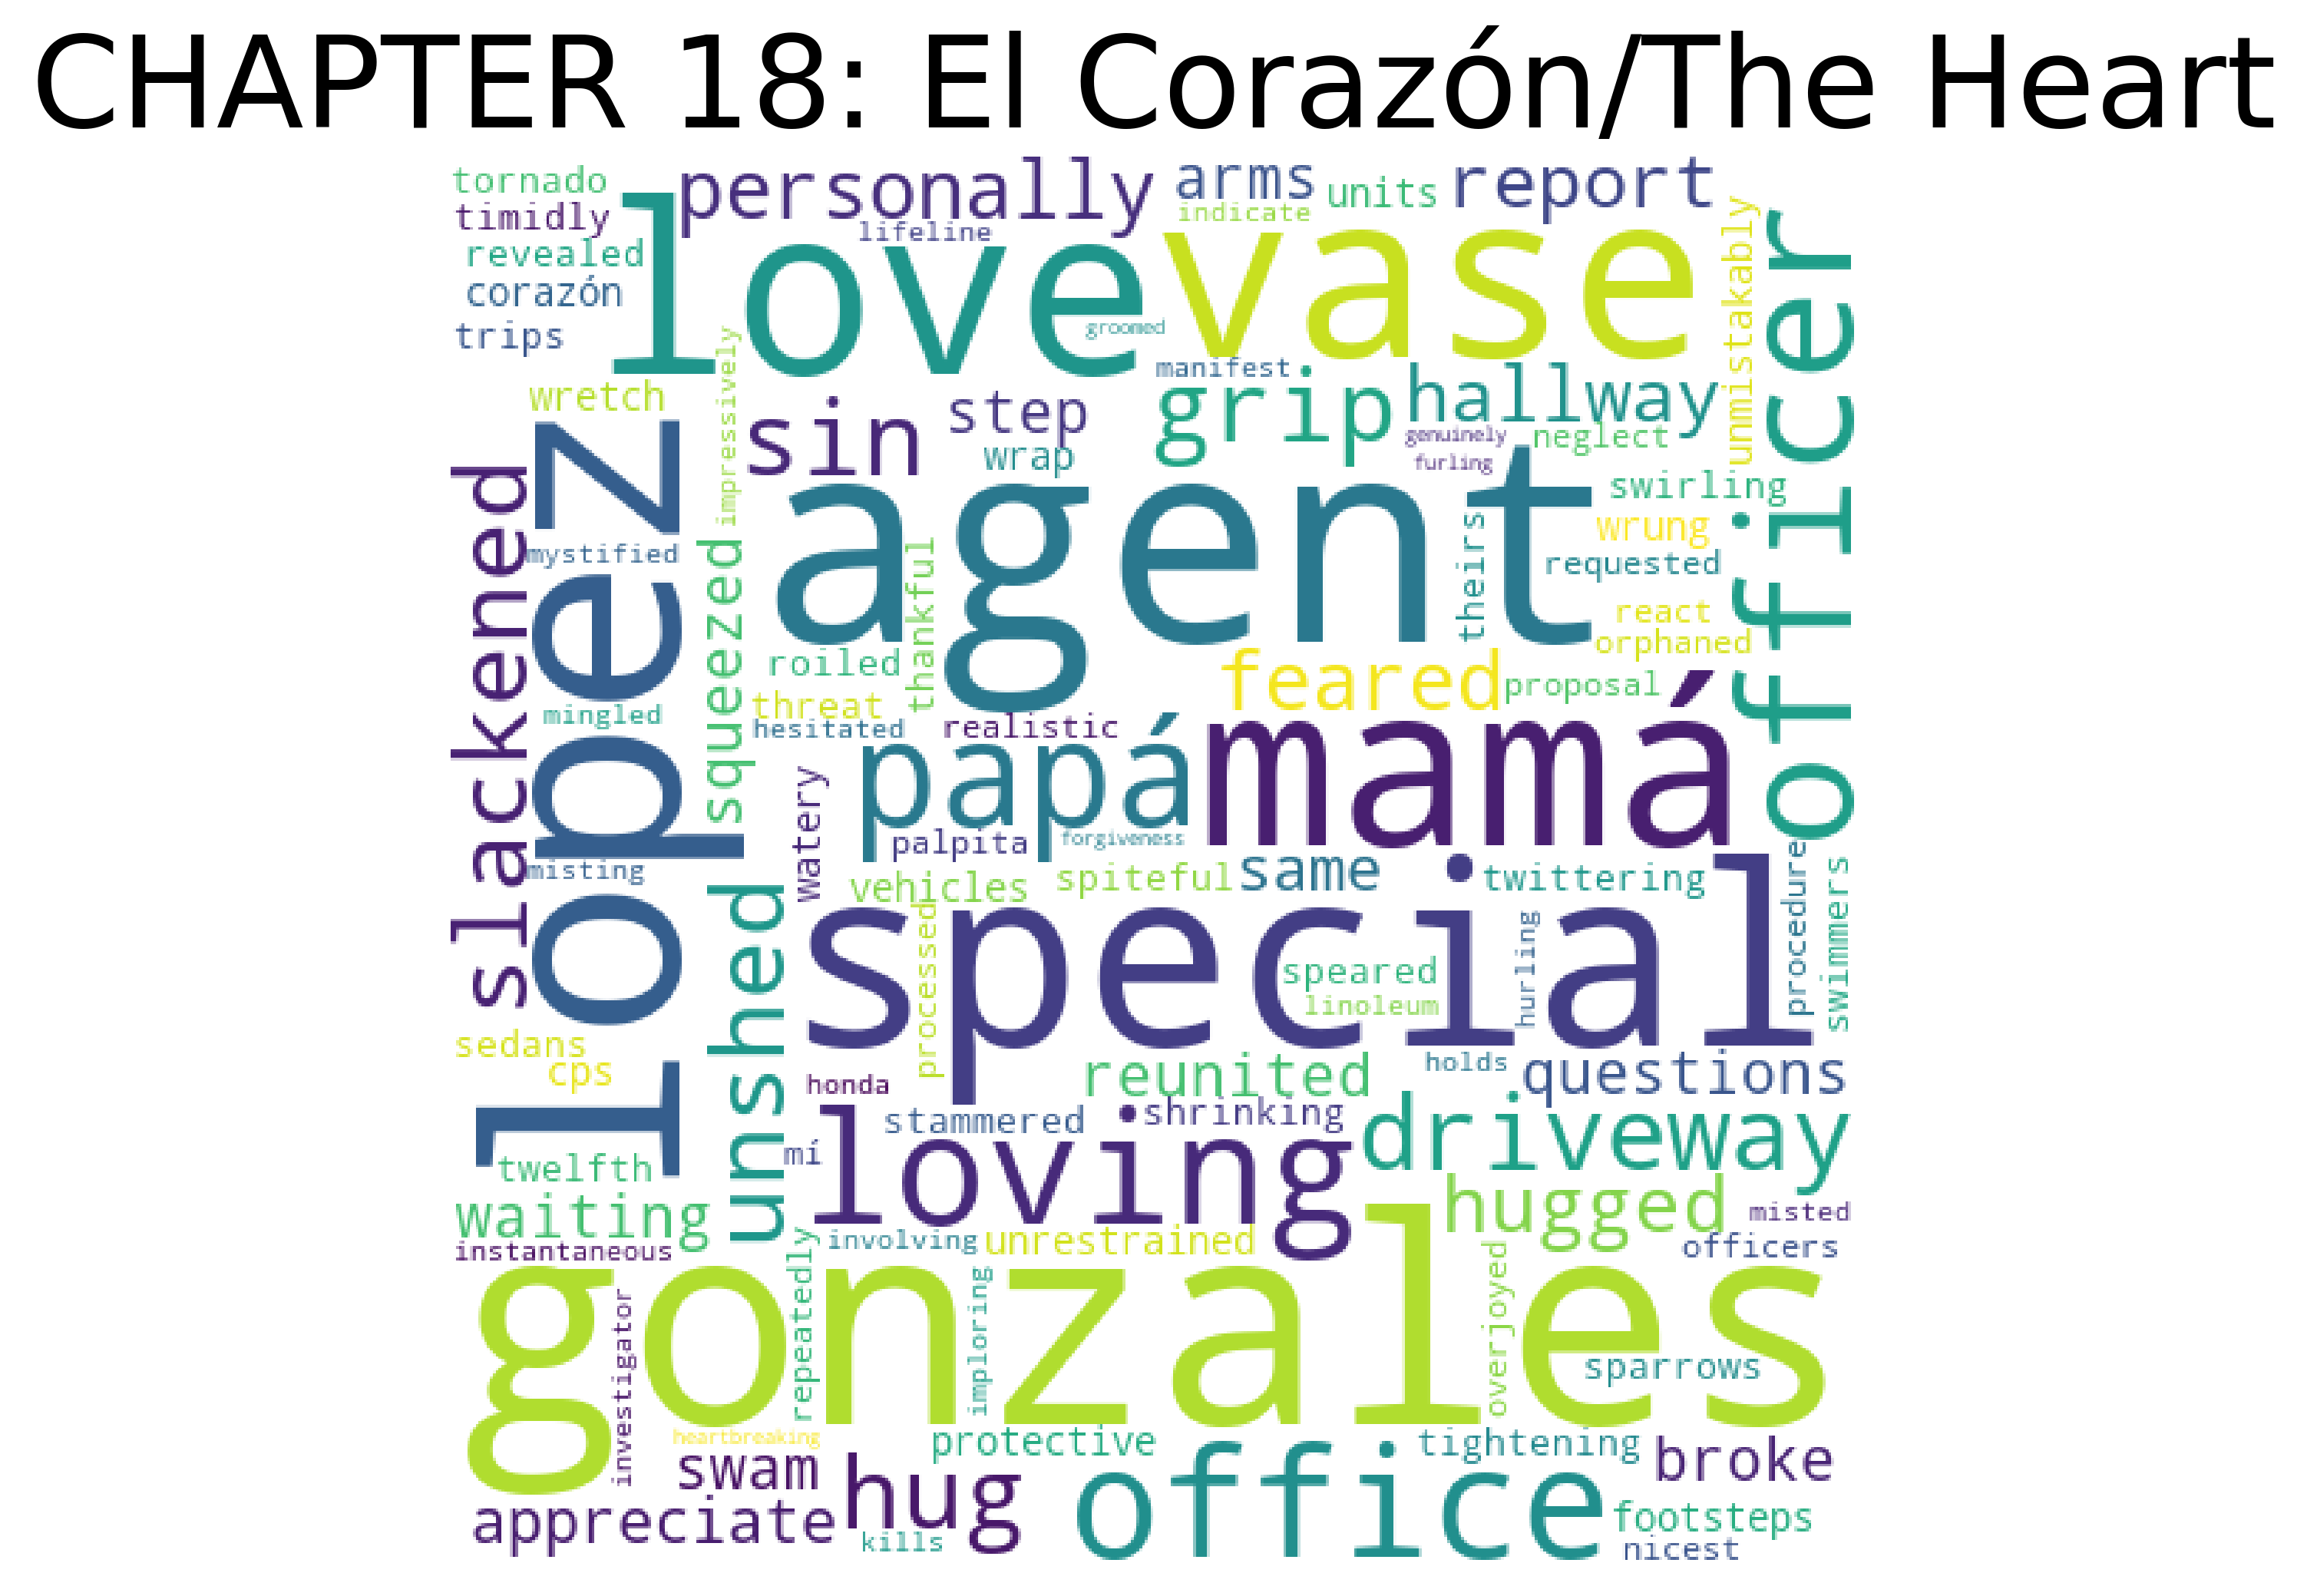

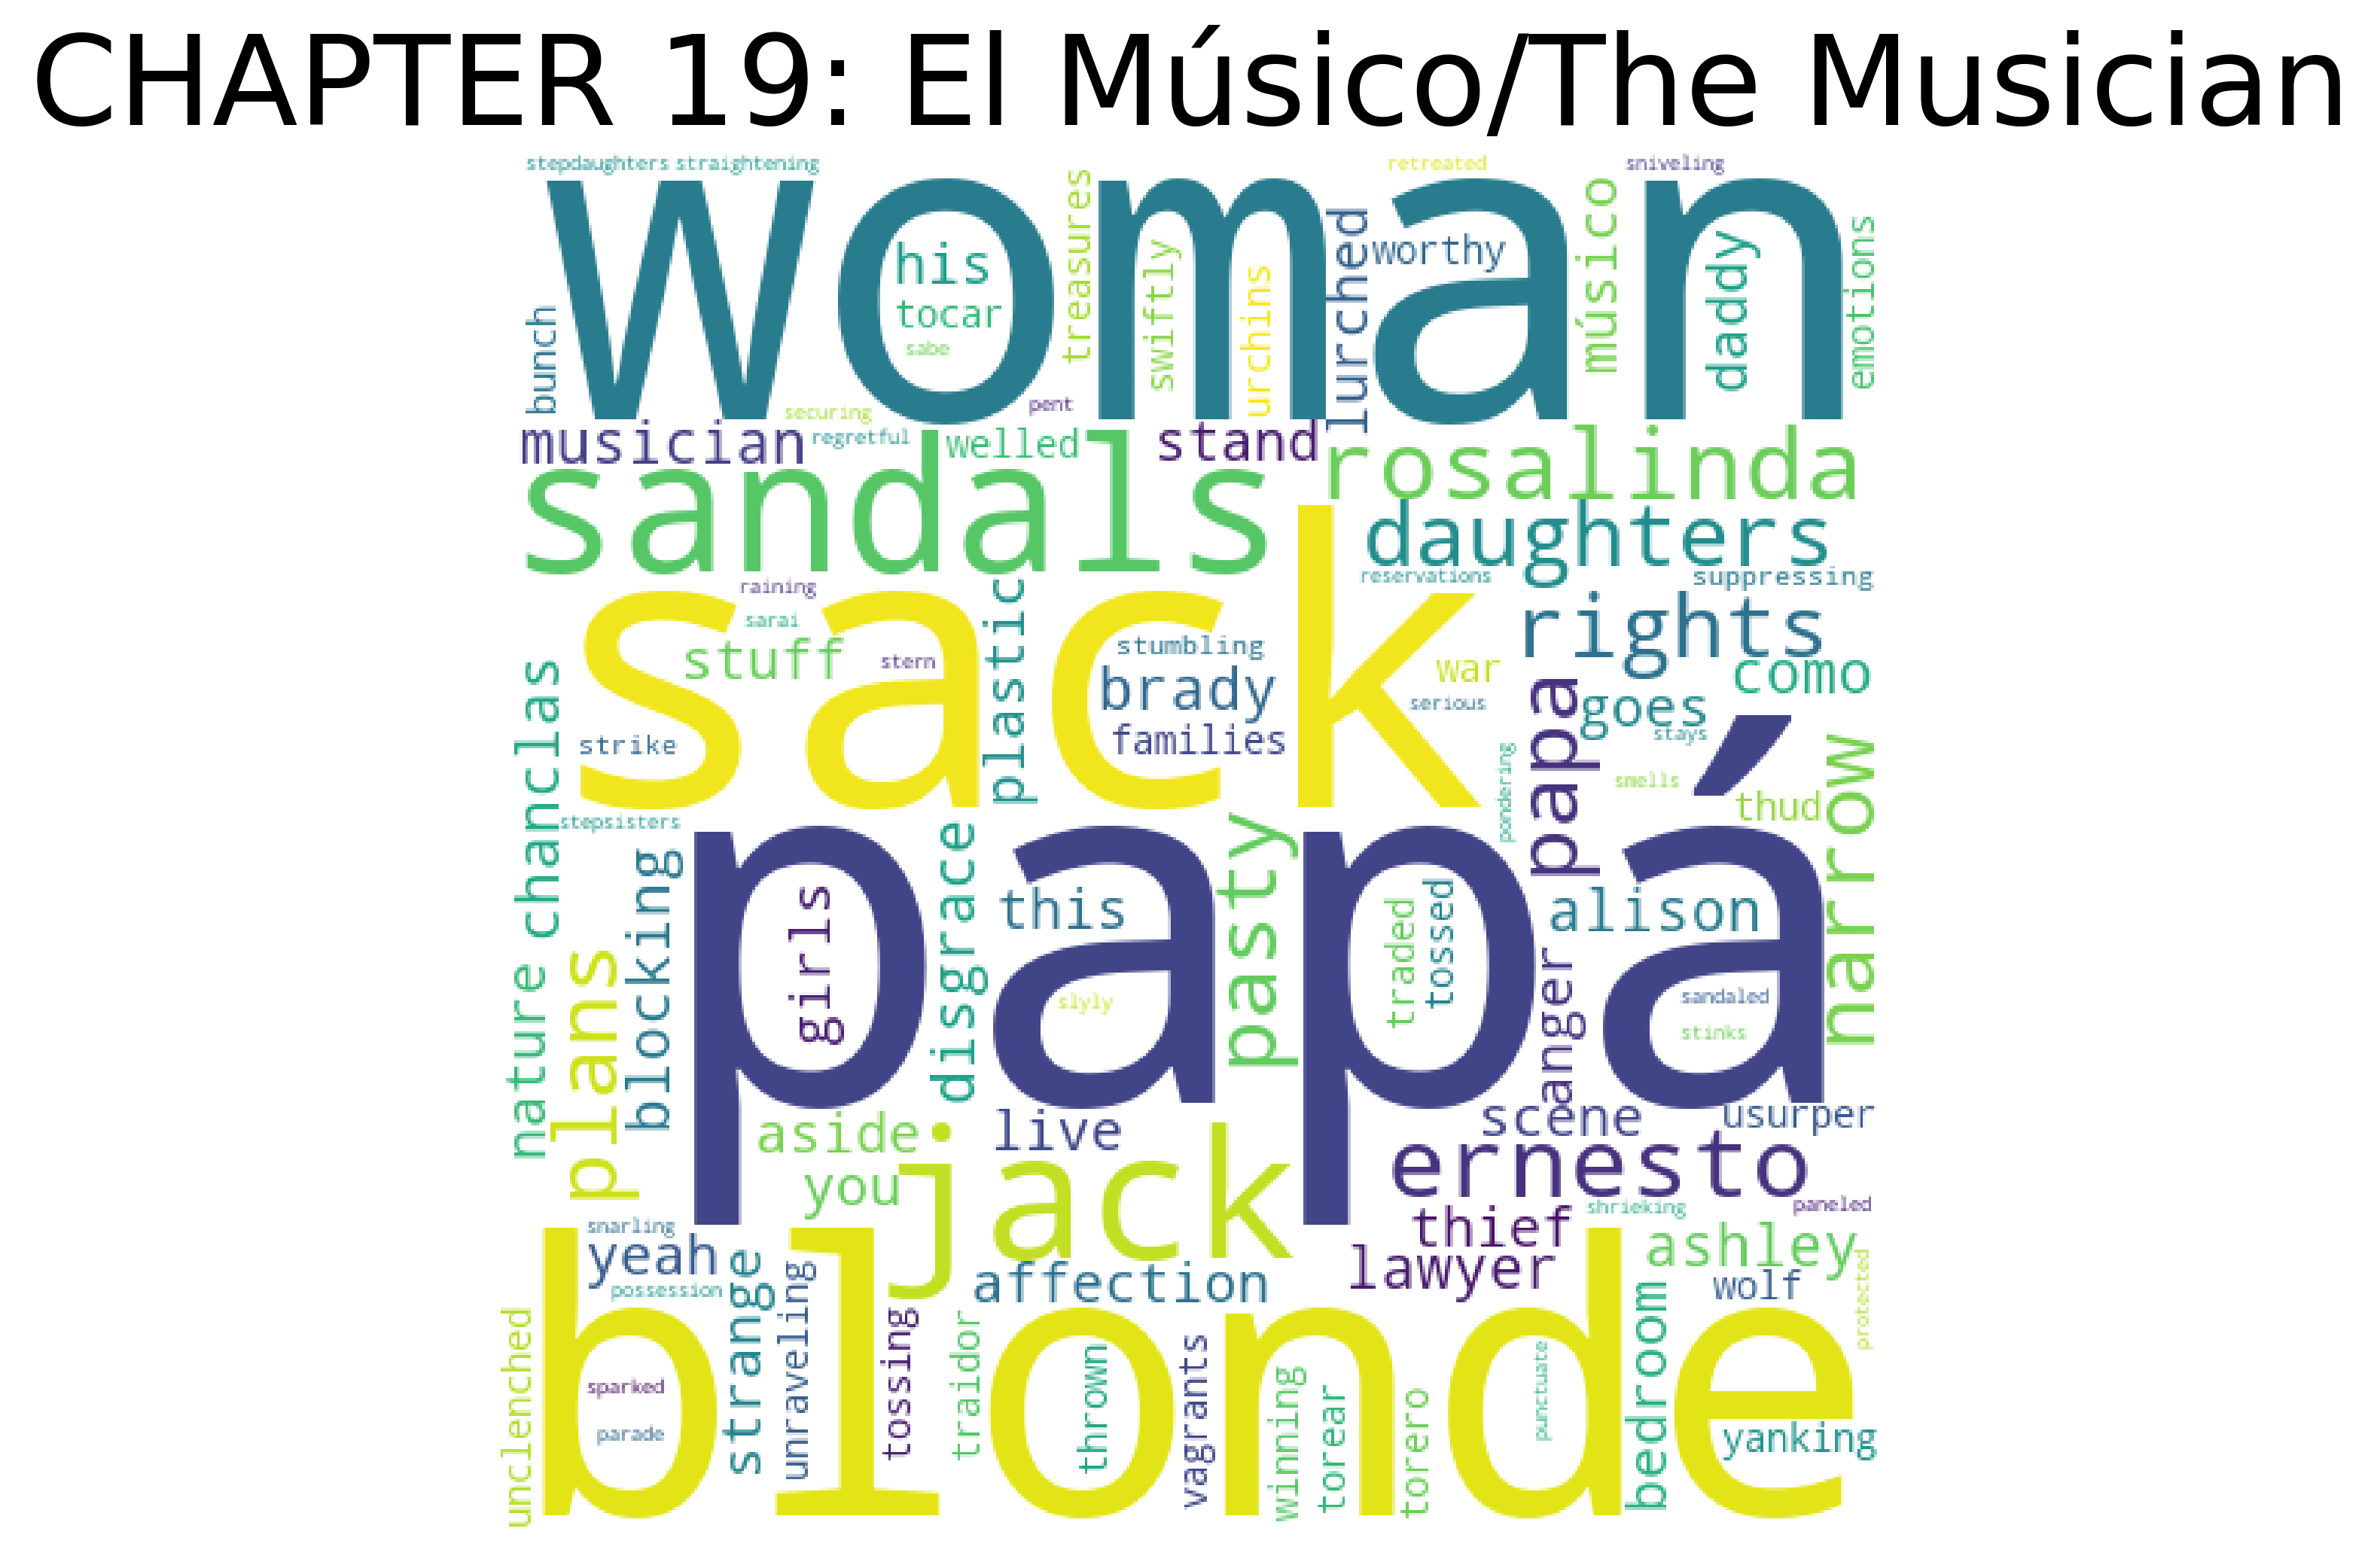

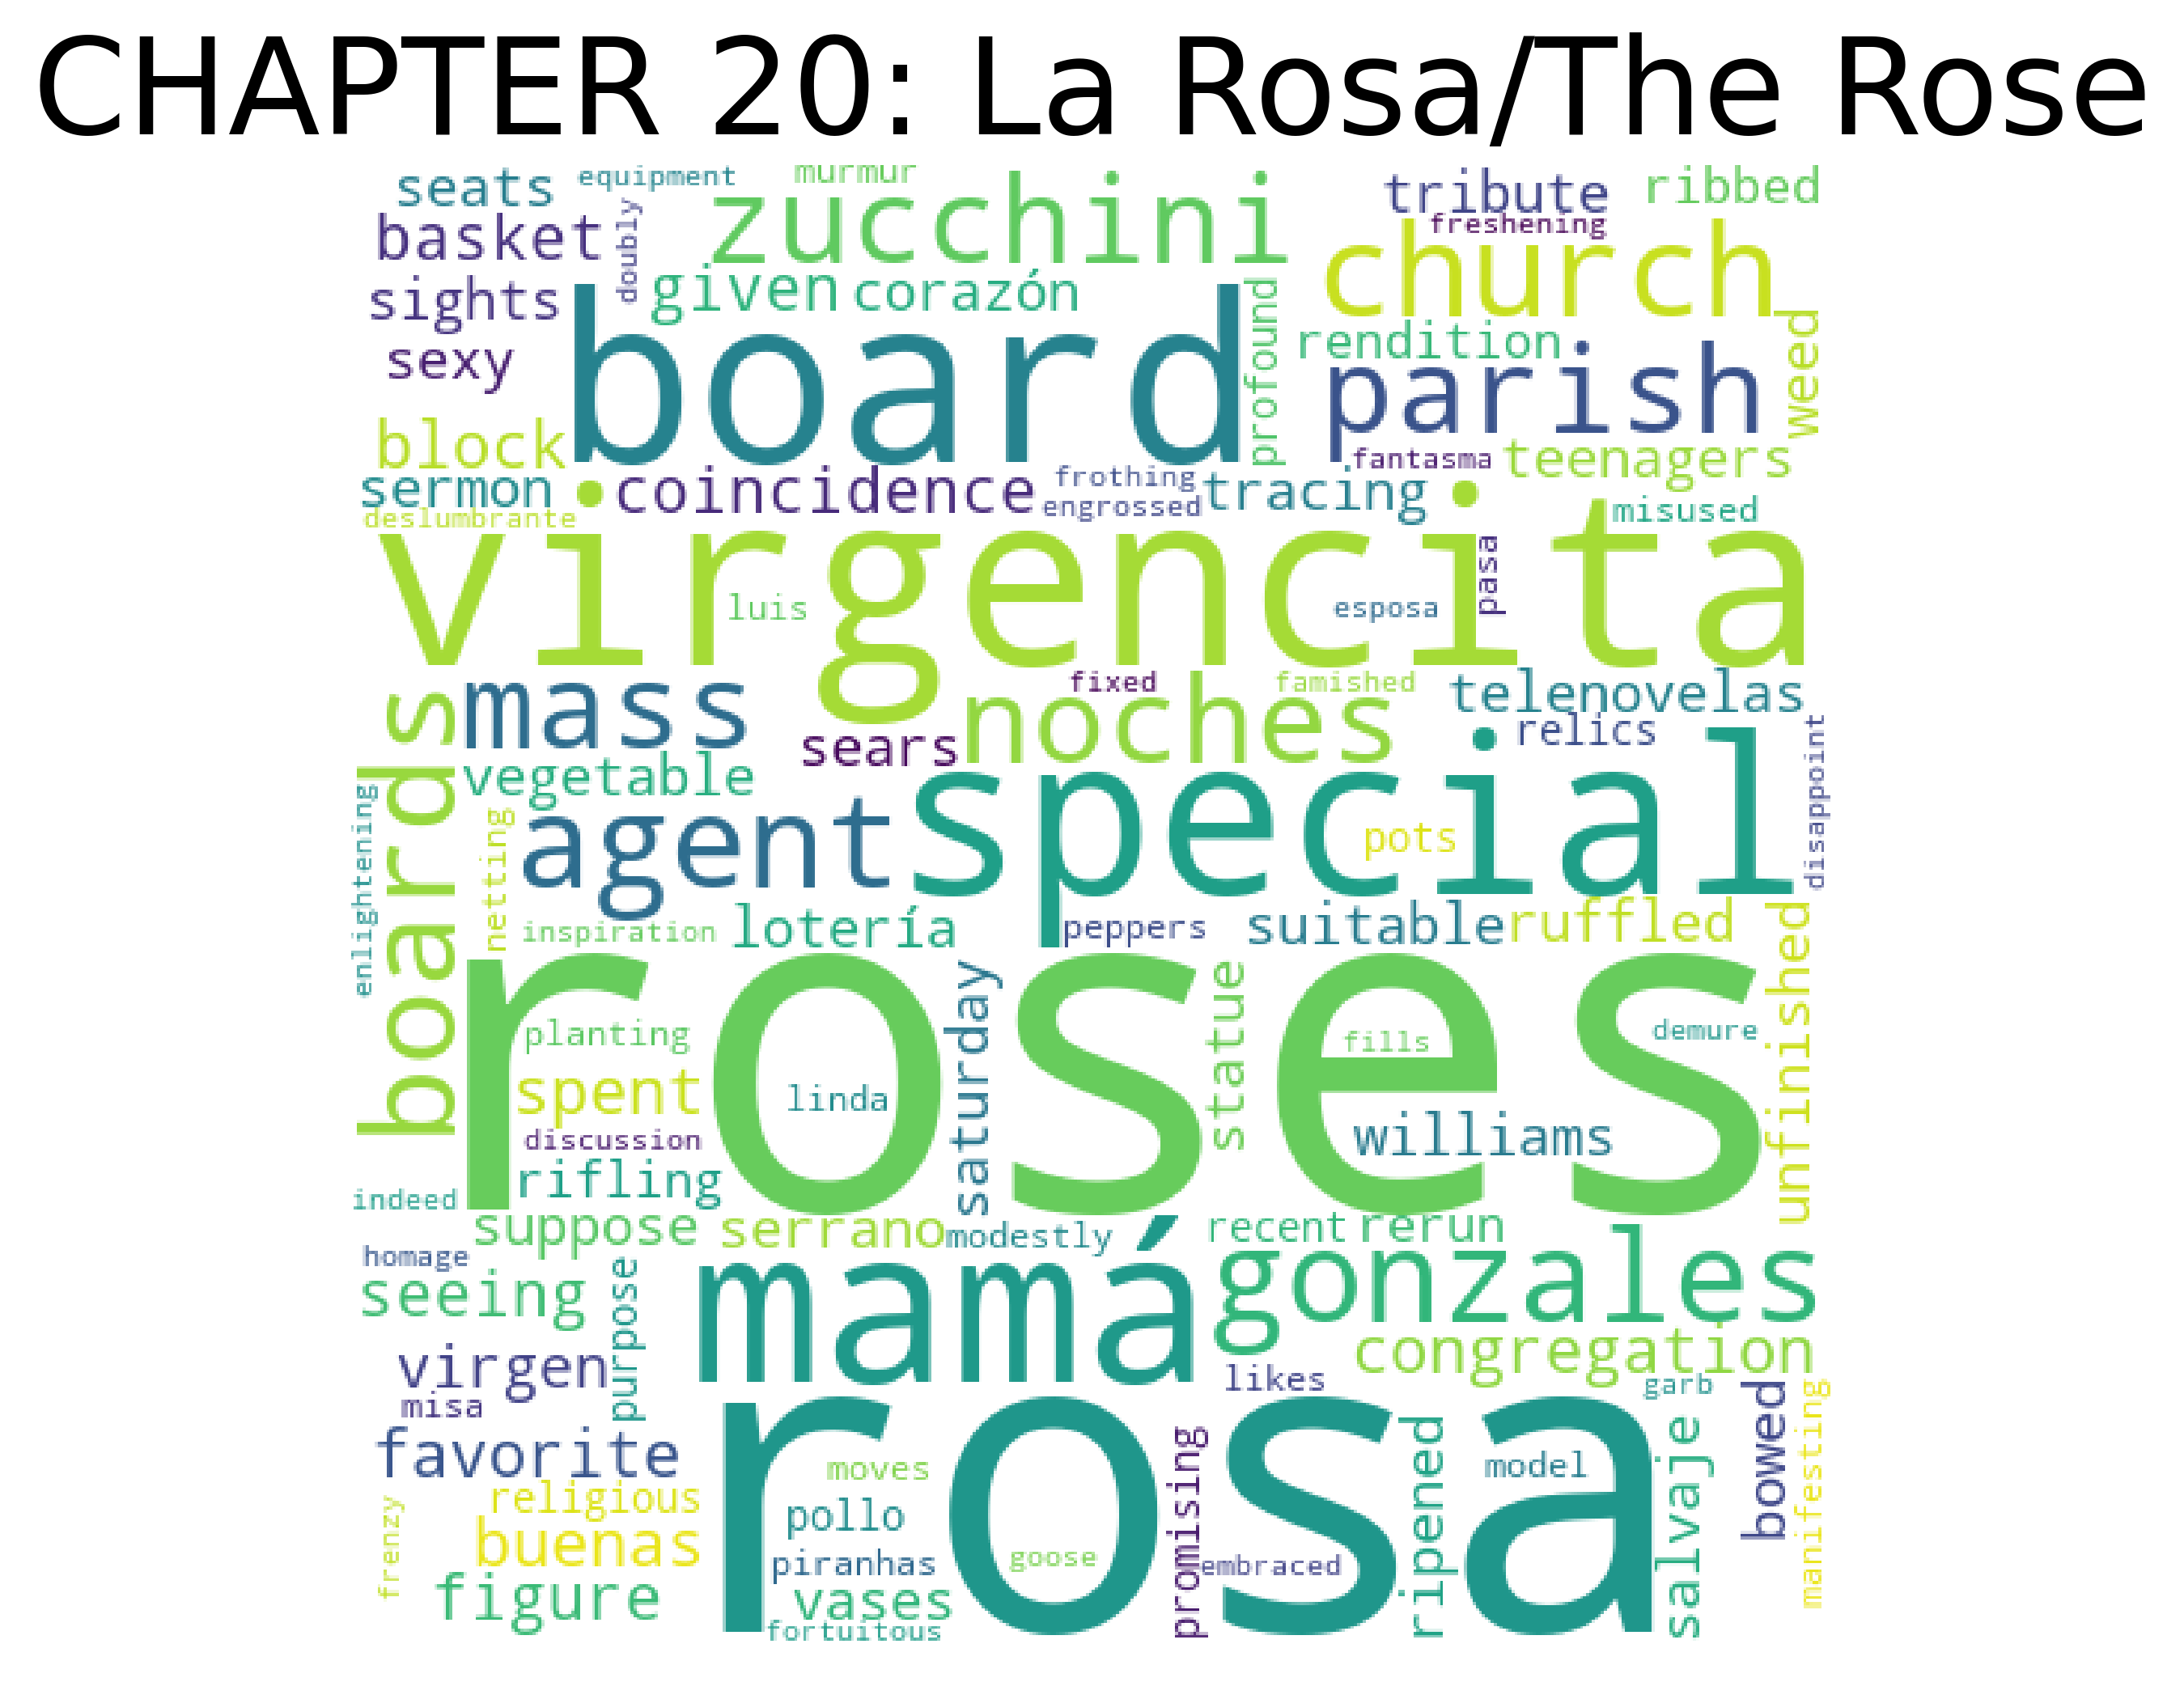

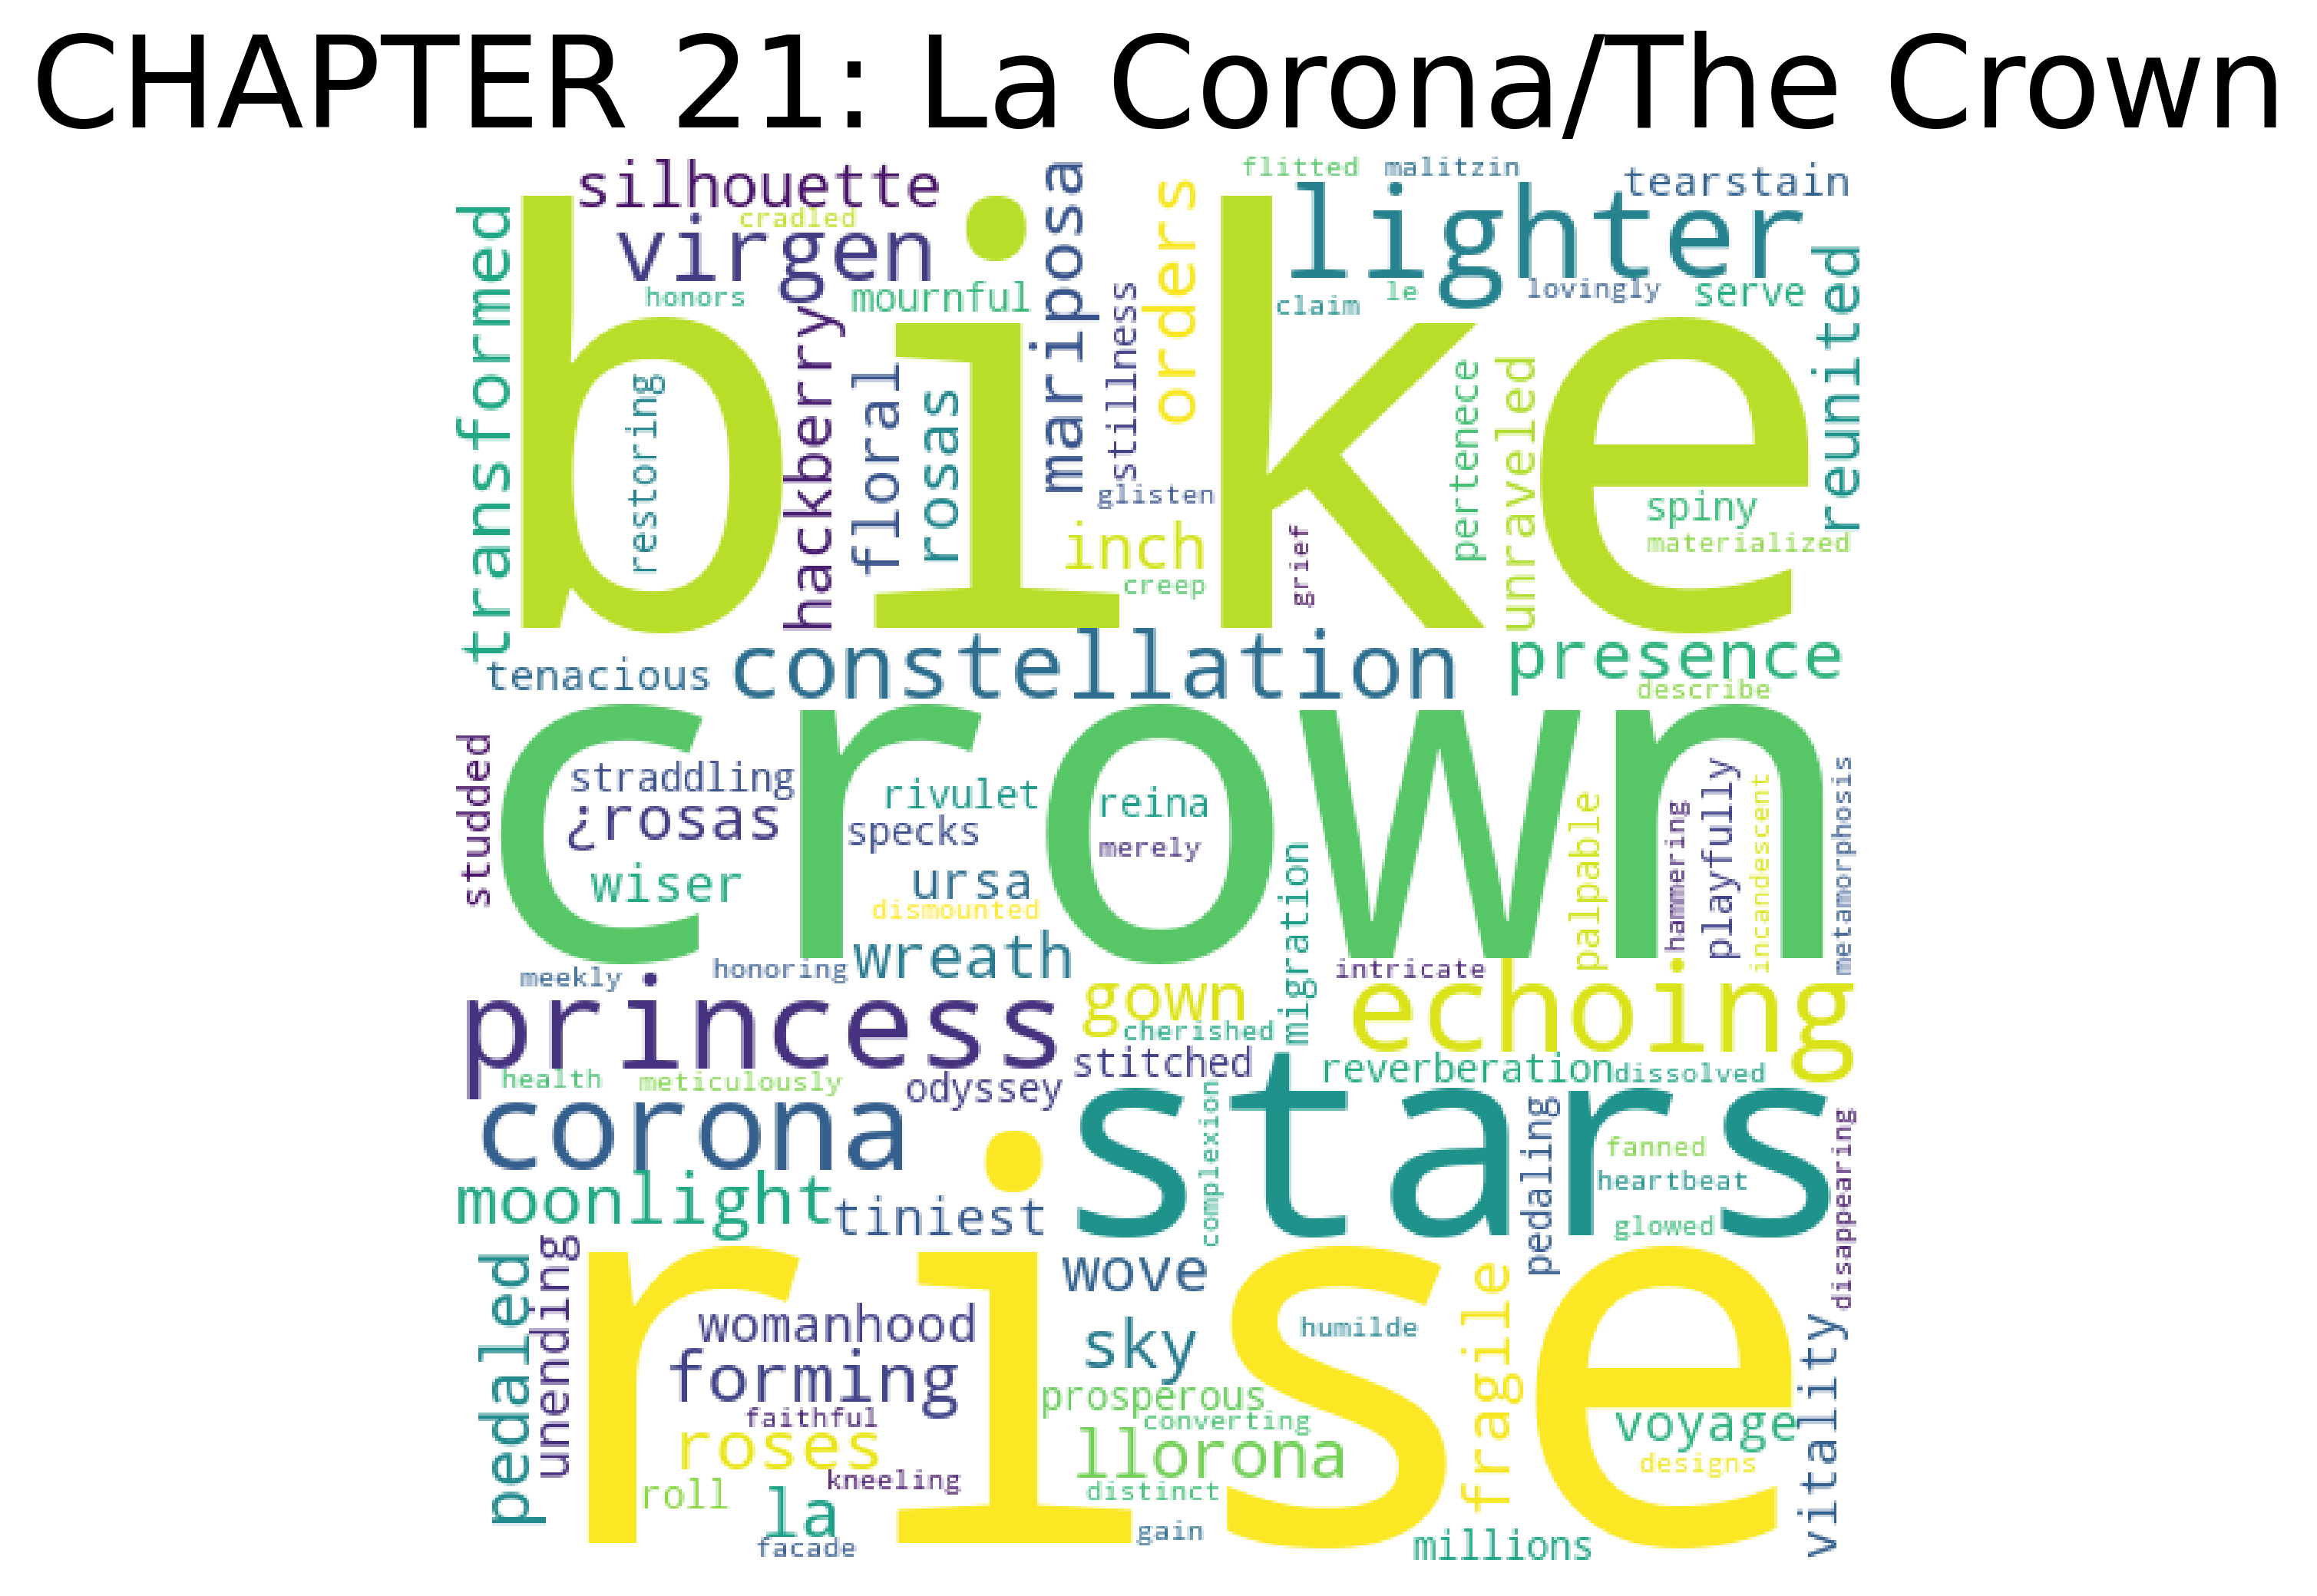

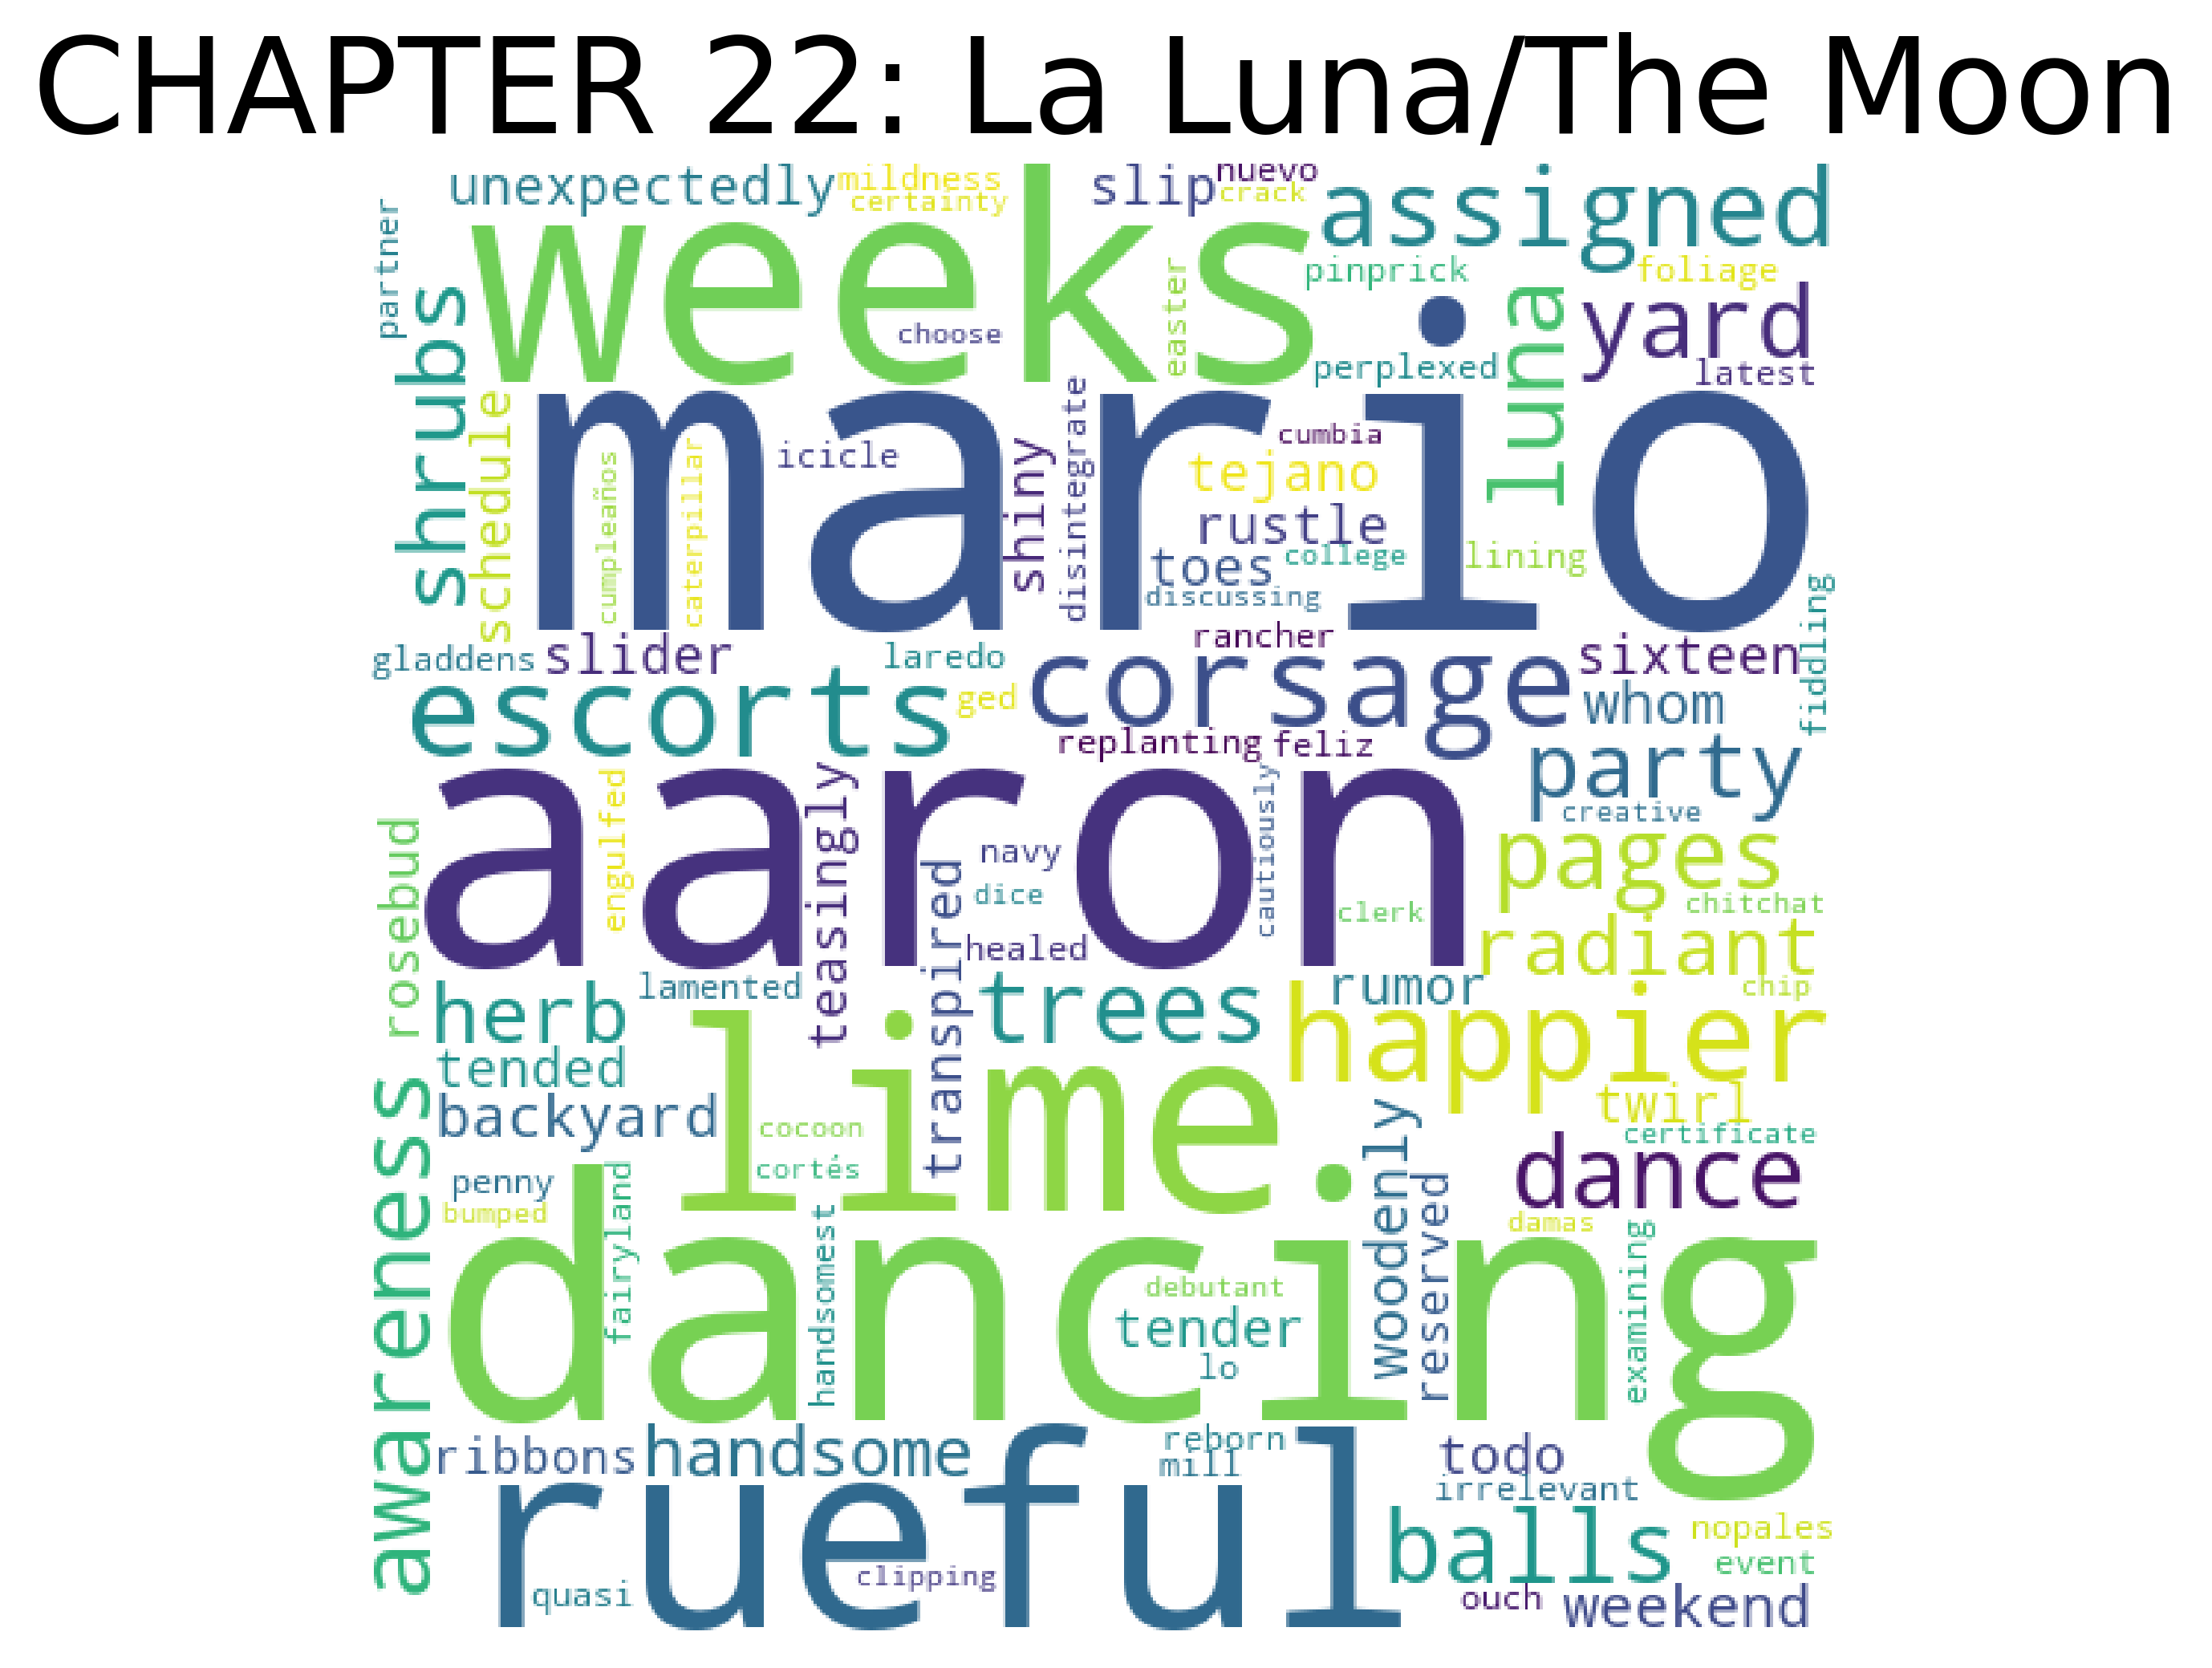

In [14]:
# Create a dictionary with the total count of each word across all chapters
prior_counts = word_df.groupby("word")['count'].sum().to_dict()

# Iterate over the chapter numbers in 'chapters'
for i in chapters:
    # Get a dictionary of the word counts for the current chapter
    chap_counts = word_df[word_df['chapter'] == i].set_index('word')['count'].to_dict()
    # Get a dictionary of the word counts for all other chapters
    other_counts = word_df[word_df['chapter'] != i].groupby("word")['count'].sum().to_dict()
    # Calculate the log odds ratio of the word counts in the current chapter to the counts in all other chapters
    delta = log_odds(chap_counts, other_counts, prior_counts, True)
    # Sort the words by their log odds ratio
    delta_sorted = sorted(delta.items(), key=operator.itemgetter(1))
    chap_words = []
    # Create a list of words with a log odds ratio greater than or equal to 1.5, along with their log odds ratio
    for k, v in reversed(delta_sorted):
        if v >= 1.5:
            chap_words.append("%s (%.3f)" % (k, v))
    # Create a dictionary of words with a positive log odds ratio, to plot in the word cloud
    to_plot = {k: v for k, v in reversed(delta_sorted) if v > 0}
    # Generate a word cloud from the 'to_plot' dictionary
    wordcloud = WordCloud(width=500, height=500, background_color='white',
                         max_words=100).generate_from_frequencies(to_plot)
    # Set up the plot
    plt.figure(figsize=(5, 5), dpi=400, facecolor=None)
    plt.title("CHAPTER %d: %s" % (i, orig_chapter_names[i]), size=30)
    # Display the word cloud
    plt.imshow(wordcloud)
    # Remove the axis
    plt.axis("off")
    # Remove padding and margin
    plt.tight_layout(pad=0)
    # Show the plot
    plt.show()

    
# This code block is creating a word cloud for each chapter in a book, where the words are chosen based on their log odds 
# ratio. The log odds ratio measures how much more common a word is in the current chapter compared to all other chapters. 
# Words are included in the word cloud if they have a positive log odds ratio, and words with a log odds ratio of 1.5 or 
# higher are printed out along with their log odds ratio. The word cloud is displayed with the chapter number and title 
# as the title of the plot.
